<a href="https://www.kaggle.com/code/sulaniishara/sleep-wellbeing?scriptVersionId=222312979" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="border-radius: 15px; border: 2px solid blue; padding: 20px;
           background: linear-gradient(135deg, #ffffcc, #a1d99b, #2c7fb8);
           text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
               font-weight: bold; margin-bottom: 10px; font-size: 36px;
               font-family: 'Roboto', sans-serif; line-height: 1.2;">
        😴 Sleep & Wellbeing 🌙
    </h1>
</div>


### **Dataset Overview** 📊

The Sleep Health and Lifestyle Dataset is a comprehensive collection of data on sleep patterns 😴, lifestyle factors, and cardiovascular health ❤️ for 400 individuals. The dataset comprises 13 key variables, categorized as follows:

**1. Demographics:** 👤

*   **Person ID:** Unique identifier for each individual.
*   **Gender:** 🚻 (Male/Female)
*   **Age:** 📅 (Years)
*   **Occupation:** 💼 (e.g., Software Engineer, Doctor, Teacher)
*   **BMI Category:** 📏 (Underweight, Normal, Overweight, Obese)

**2. Cardiovascular Health:** ❤️

*   **Blood Pressure:** 🌡️ (Systolic/Diastolic)
*   **Heart Rate:** 💓 (Beats per minute)

**3. Lifestyle:** 🏃‍♀️

*   **Physical Activity Level:** ⏱️ (Minutes per day)
*   **Stress Level:** 😟 (Scale of 1 to 10)
*   **Daily Steps:** 🚶 (Number of steps)

**4. Sleep-Related Factors:** 💤

*   **Sleep Duration:** ⏰ (Hours per day)
*   **Quality of Sleep:** ⭐ (Scale of 1 to 10)

**5. Sleep Disorder:** 🤕 (None, Insomnia, Sleep Apnea) - Target Variable

### **Dataset Objectives** 🎯

The primary objective of this dataset is to gain a deeper understanding of the relationship between sleep patterns 😴, lifestyle factors, and cardiovascular health ❤️. Specifically, the dataset can be used to:

*   **Investigate the association between sleep disorders (Insomnia, Sleep Apnea) 🤕 and cardiovascular health indicators** such as blood pressure 🌡️ and heart rate 💓.
*   **Explore the impact of lifestyle factors (physical activity 🏃‍♀️, stress 😟) on sleep duration ⏰ and quality ⭐.**
*   **Examine the relationship between sleep duration ⏰, sleep quality ⭐, and blood pressure 🌡️ across different demographic groups** (age 📅, gender 🚻, BMI 📏).
*   **Identify potential risk factors ⚠️** for sleep disorders and associated cardiovascular health issues.
*   **Develop predictive models** ⚙️ to classify and estimate the risk of sleep disorders (None, Insomnia, Sleep Apnea) based on lifestyle, cardiovascular health, and demographic factors.
*   **Analyze the contribution** of key features 🏆 (e.g., BMI, Age, Occupation, Blood Pressure) to sleep disorder risk using SHAP and other interpretability techniques.


# <span style="color:transparent;">Import Libraries</span>

<div style="border-radius: 15px; border: 2px solid blue; padding: 10px; background: linear-gradient(135deg, #ffffcc, #a1d99b, #2c7fb8); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Import Libraries
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [1]:
import warnings  
warnings.filterwarnings("ignore")  

import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import matplotlib.cm as cm  
import seaborn as sns  
import squarify  
import plotly.express as px  
import plotly.io as pio  
pio.renderers.default = 'iframe'  
from IPython.display import display

from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler, label_binarize  
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  
from sklearn.linear_model import LogisticRegression  
from lightgbm import LGBMClassifier  
from catboost import CatBoostClassifier  
from sklearn.metrics import (  
    accuracy_score, roc_auc_score, classification_report,  
    confusion_matrix, roc_curve, auc  
)  

import shap  

# <span style="color:transparent;">Import Libraries</span>

<div style="border-radius: 15px; border: 2px solid blue; padding: 10px; background: linear-gradient(135deg, #ffffcc, #a1d99b, #2c7fb8); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Loading and Initial Exploration
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [2]:
# Load the dataset
df = pd.read_csv('/kaggle/input/sleep-health-and-lifestyle-dataset/Sleep_health_and_lifestyle_dataset.csv')

# Display shape of the dataset
print("Shape of the dataset:\n", df.shape)
display(df.head())

Shape of the dataset:
 (374, 13)


Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200            NaN  
1         125/80          75        10000            NaN  
2         125/80          75        10000            NaN  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [3]:
# Display basic information
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
N

In [4]:
# For numerical statistics
numerical_stats = df.describe()

styled_stats = numerical_stats.style.background_gradient(cmap='YlGnBu')
display(styled_stats)


These statistics provide a good initial understanding of the numerical variables in dataset.

**General:**

* **Count:** Confirms that all numerical variables have 374 entries.

**Age:**

* **Mean (42.18) / Median (43):**  Suggests the dataset represents a slightly older adult population. The close proximity of mean and median indicates a fairly symmetrical age distribution.
* **Standard Deviation (8.67):**  Shows a moderate spread in age, with a significant number of individuals both younger and older than the average.
* **Range (27 - 59):**  Confirms the dataset includes adults across a wide age range.

**Sleep Duration:**

* **Mean (7.13) / Median (7.2):**  Indicates that, on average, individuals sleep around 7 hours per day.  Again, the mean and median are close, suggesting a relatively symmetrical distribution.
* **Range (5.8 - 8.5):**  Shows some variability in sleep duration, but most individuals fall within a relatively narrow band.

**Quality of Sleep:**

* **Mean (6.31) / Median (7):**  With a 1-10 scale, the average sleep quality rating is slightly above the midpoint. However, the median being higher than the mean suggests that the distribution might be slightly skewed towards lower scores, with some individuals reporting significantly poorer sleep quality.

**Physical Activity Level:**

* **Mean (59.17) / Median (60):**  On average, individuals engage in about an hour of physical activity per day.
* **Range (30 - 90):**  There's a wide range of physical activity levels, with some individuals being much more active than others.

**Stress Level:**

* **Mean (5.38) / Median (5):**  The average stress level is slightly above the midpoint of the 1-10 scale. Similar to sleep quality, the lower mean compared to the median hints at a potential skew towards higher stress levels for some individuals.

**Heart Rate:**

* **Mean (70.17) / Median (70):**  The average resting heart rate is around 70 beats per minute, which is within the normal range for adults. The mean and median being almost identical suggests a symmetrical distribution.

**Daily Steps:**

* **Mean (6816.84) / Median (7000):**  Individuals take an average of nearly 7000 steps per day.
* **Range (3000 - 10000):**  There's considerable variation in daily steps, indicating different levels of activity among individuals.

In [5]:
# Get categorical statistics
categorical_stats = df.describe(include='object').T
cmap = cm.get_cmap('YlGnBu')
background_color = cm.colors.rgb2hex(cmap(0.7))
categorical_stats = categorical_stats.style.set_properties(**{'background-color': background_color})

# Display the styled DataFrame
display(categorical_stats)

**Key Observations:**

* **Gender:** 
    - Two categories: Male and Female.
    - Males appear to be slightly more prevalent in the dataset. 

* **Occupation:**
    - 11 unique occupations.
    - "Nurse" is the most frequent occupation, suggesting a potential overrepresentation of this profession in the dataset. 

* **BMI Category:**
    - Four categories: Likely "Underweight," "Normal," "Overweight," and "Obese." 
    - "Normal" is the most frequent category, indicating a relatively healthy BMI distribution in the sample.

* **Blood Pressure:**
    - 25 unique blood pressure readings.
    - "130/85" is the most frequent reading. 

* **Sleep Disorder:** 
    - Three categories: "None," "Insomnia," and "Sleep Apnea." 
    - "Sleep Apnea" is the most frequent sleep disorder among those with recorded disorders.


In [6]:
# Check for duplicated values
print(f'Duplicated values: {df.duplicated().sum()}')

Duplicated values: 0


# <span style="color:transparent;">Import Libraries</span>

<div style="border-radius: 15px; border: 2px solid blue; padding: 10px; background: linear-gradient(135deg, #ffffcc, #a1d99b, #2c7fb8); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Handling Missing Data
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [7]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Person ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Blood Pressure               0
Heart Rate                   0
Daily Steps                  0
Sleep Disorder             219
dtype: int64


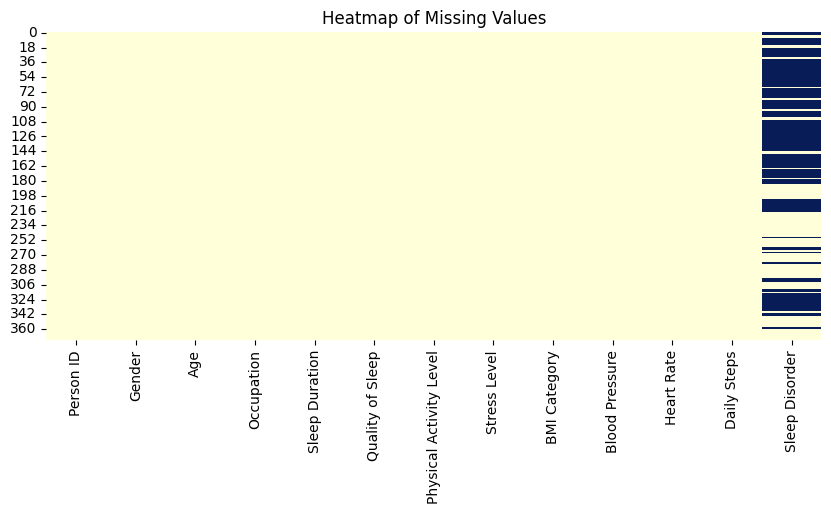

In [8]:
# Visualize missing values with a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(df.isnull(), cbar=False, cmap="YlGnBu")
plt.title("Heatmap of Missing Values")
plt.show()

#### Justification Statement for Replacing NaN Values in the Sleep Disorder Column

In the analysis of the Sleep Health and Lifestyle Dataset, it was observed that the **Sleep Disorder** column contained `NaN` values, which represent missing data regarding the presence of sleep disorders among individuals. According to the dataset description, this column is intended to indicate whether an individual has a sleep disorder, with potential values including "None," "Insomnia," and "Sleep Apnea."

To enhance the clarity and usability of the dataset, it is essential to standardize the representation of individuals without a sleep disorder. By replacing `NaN` values with 'None'.

In [9]:
# Replace NaN values with 'None' in the Sleep Disorder column
df['Sleep Disorder'].fillna('None', inplace=True)

# Verify the unique values after replacement
print("Unique Values in Sleep Disorder Column:")
print(df['Sleep Disorder'].unique())


Unique Values in Sleep Disorder Column:
['None' 'Sleep Apnea' 'Insomnia']


### Feature Categorization

We can categorize the features into five main groups: **Demographic Factors**, **Cardiovascular Health Factors**, **Lifestyle Factors**, **Sleep-Related Factors**, and a **Target Variable**. Below is a breakdown of each category along with the corresponding features from the dataset.

#### 1. Unique Identifier 
This category includes the unique identifier for each individual.
- **Person ID**: Unique identifier for each individual.
  
#### 2. Demographic Factors
These features provide information about the individual’s identity and background, which can influence health outcomes.
- **Gender**: Gender of the person (Male/Female).
- **Age**: Age of the person in years.
- **Occupation**: The occupation or profession of the person.
- **BMI Category**: The Body Mass Index category of the person (e.g., Underweight, Normal, Overweight, Obese).

#### 3. Cardiovascular Health Factors
These features relate to the individual’s heart health and blood pressure, which are critical indicators of overall health.
- **Blood Pressure**: Blood pressure measurement (systolic/diastolic).
- **Heart Rate**: The resting heart rate of the person in beats per minute.

#### 4. Lifestyle Factors
These features reflect daily habits and behaviors that can significantly influence health and well-being.
- **Physical Activity Level**: The number of minutes engaged in physical activity daily.
- **Stress Level**: A subjective rating of stress level experienced by the person on a scale from 1 to 10.
- **Daily Steps**: The number of steps taken by the person each day.

#### 5. Sleep-Related Factors
These features directly pertain to sleep itself.
- **Sleep Duration**: The number of hours the person sleeps per day.
- **Quality of Sleep**: A subjective rating of sleep quality on a scale from 1 to 10.

#### 6. Target Variable
This variable indicates the presence or absence of sleep disorders, which are crucial for understanding sleep health outcomes.
- **Sleep Disorder**: The presence or absence of a sleep disorder (None, Insomnia, Sleep Apnea).

#### Importance of Categorization
This categorization helps in understanding how different aspects of an individual's life contribute to their overall health and well-being. It can also guide further analysis and visualization efforts in exploring relationships between these factors and sleep health outcomes.



In [10]:
# Display the number of unique values in each column
unique_values = df.nunique()
print("Number of unique values in each column:")
print(unique_values)

Number of unique values in each column:
Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


In [11]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("Numerical Columns:\n", numerical_columns)
print("\nCategorical Columns:\n", non_numerical_columns)

print("\nUnique values for each categorical column:")
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"Column: {col}")
    print(f"Unique Values: {df[col].unique()}\n")

Numerical Columns:
 ['Person ID', 'Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate', 'Daily Steps']

Categorical Columns:
 ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

Unique values for each categorical column:
Column: Gender
Unique Values: ['Male' 'Female']

Column: Occupation
Unique Values: ['Software Engineer' 'Doctor' 'Sales Representative' 'Teacher' 'Nurse'
 'Engineer' 'Accountant' 'Scientist' 'Lawyer' 'Salesperson' 'Manager']

Column: BMI Category
Unique Values: ['Overweight' 'Normal' 'Obese' 'Normal Weight']

Column: Blood Pressure
Unique Values: ['126/83' '125/80' '140/90' '120/80' '132/87' '130/86' '117/76' '118/76'
 '128/85' '131/86' '128/84' '115/75' '135/88' '129/84' '130/85' '115/78'
 '119/77' '121/79' '125/82' '135/90' '122/80' '142/92' '140/95' '139/91'
 '118/75']

Column: Sleep Disorder
Unique Values: ['None' 'Sleep Apnea' 'Insomnia']



*The 'BMI Category' column originally contained the non-standard category 'Normal Weight'. This was replaced with 'Underweight' to align with the standard BMI categories of 'Underweight', 'Normal', 'Overweight', and 'Obese'. This replacement was done because the category 'Normal Weight' is not an official or accepted category in the standards, and is likely a data entry error. The replacement of this value improves data consistency and accuracy.*

In [12]:
# Replace 'Normal Weight' with 'Underweight' in the 'BMI Category' column
df['BMI Category'] = df['BMI Category'].replace('Normal Weight', 'Underweight')

# Verify the change
print(df['BMI Category'].unique())

['Overweight' 'Normal' 'Obese' 'Underweight']


*We corrected an inconsistency in the 'BMI Category' column where 'Normal Weight' was present. This was corrected to 'Underweight' because 'Normal Weight' is not a standard BMI category, and this correction ensures adherence to standard classifications.*

# <span style="color:transparent;">Import Libraries</span>

<div style="border-radius: 15px; border: 2px solid blue; padding: 10px; background: linear-gradient(135deg, #ffffcc, #a1d99b, #2c7fb8); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Exploratory Data Analysis (EDA)
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


### What is the prevalence of sleep disorders (None, Insomnia, Sleep Apnea) within the dataset?

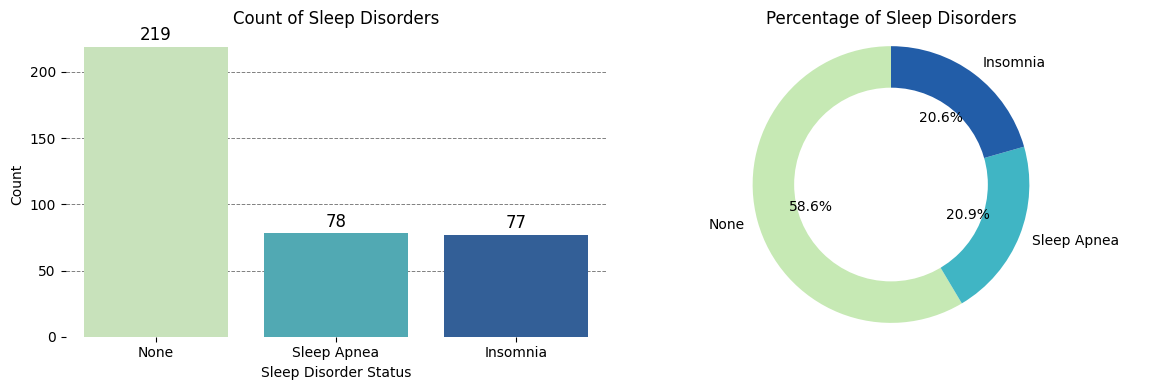

In [13]:
# Set a custom color palette
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Sleep Disorder', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Sleep Disorders')
axes[0].set_xlabel('Sleep Disorder Status')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', 
                     color='black', fontsize=12, 
                     xytext=(0, 5), 
                     textcoords='offset points')

axes[0].set_axisbelow(True)  
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

sleep_disorder_counts = df['Sleep Disorder'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    sleep_disorder_counts, 
    labels=sleep_disorder_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Sleep Disorders')
axes[1].axis('equal')
plt.tight_layout()
plt.show()

**1. Prevalence of Sleep Disorders:**

* **None:** 58.6% of the individuals in the dataset reported no sleep disorder. This suggests that a significant portion of the population appears to have no diagnosed sleep issues.
* **Sleep Apnea:** 20.9% of the individuals reported having Sleep Apnea. This is the second most common sleep disorder within the dataset.
* **Insomnia:** 20.6% of the individuals reported experiencing Insomnia.

**2. Overall Prevalence:**

* Approximately 41.4% (20.9% Sleep Apnea + 20.6% Insomnia) of the individuals in the dataset reported having a sleep disorder (either Sleep Apnea or Insomnia).

**The dataset reveals that Sleep Apnea and Insomnia are the most prevalent sleep disorders, with Sleep Apnea slightly edging out Insomnia in terms of frequency. A substantial portion of the population (58.6%) reported no diagnosed sleep disorders.**


# Demographic Factors

## What is the distribution of age across the sample population?

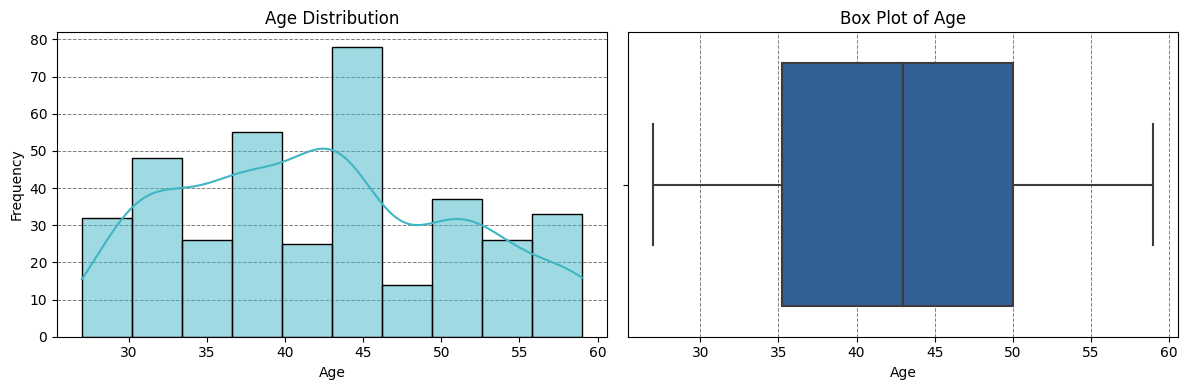

In [14]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df['Age'], bins=10, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Age'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Age')
axes[1].set_xlabel('Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

**1. Age Distribution:**

* **Shape:** The histogram on the left shows that the age distribution appears to be **approximately normal or slightly right-skewed**. This means there's a concentration of individuals around the middle ages with a tapering off towards older ages. 
* **Central Tendency:** The peak of the distribution suggests that the majority of individuals in the sample fall within the age range of 40-45 years.
* **Spread:** The box plot on the right provides a visual representation of the spread of ages. The box represents the interquartile range (IQR), which contains 50% of the data. The whiskers extend to the minimum and maximum values within 1.5 times the IQR, indicating the range of typical values. The absence of extreme outliers outside the whiskers suggests a relatively homogeneous age distribution.

**The age distribution within the sample population appears to be centered around the middle ages (40-45 years), with a moderate spread and a slight right-skewness. This suggests that the sample predominantly includes individuals in their middle adulthood.**


## How does age distribution vary among individuals with different sleep disorders?

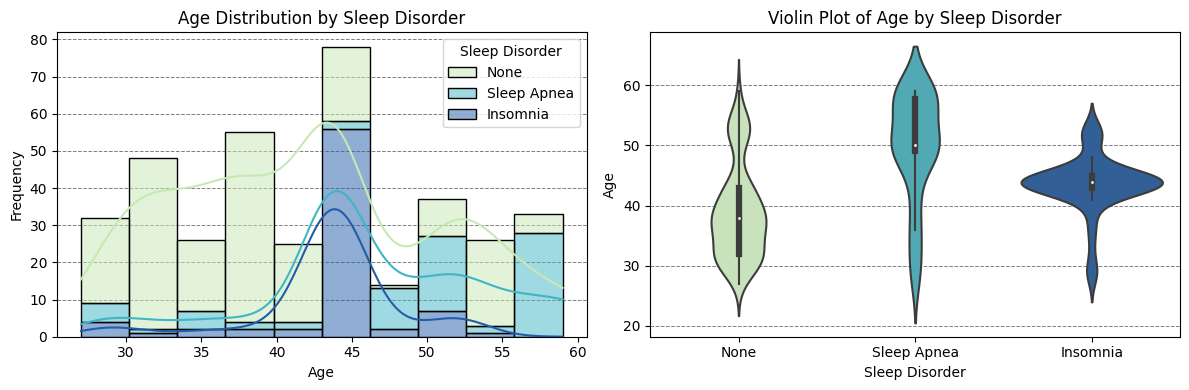

In [15]:
custom_palette = sns.color_palette("YlGnBu", 3)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x='Age', hue='Sleep Disorder', multiple='stack', 
             bins=10, palette=custom_palette, ax=axes[0], kde=True)
axes[0].set_title('Age Distribution by Sleep Disorder')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.violinplot(x='Sleep Disorder', y='Age', data=df, palette=custom_palette, ax=axes[1])
axes[1].set_title('Violin Plot of Age by Sleep Disorder')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

**1. Age Distribution by Sleep Disorder:**

* **None:** The age distribution for individuals with no reported sleep disorder appears to be **broadly distributed**, with a peak around the middle ages (40-45 years). This is consistent with the overall age distribution observed earlier.

* **Sleep Apnea:** The age distribution for individuals with Sleep Apnea seems to be **shifted towards older ages**. The peak of the distribution is slightly higher than for the "None" group, suggesting a higher prevalence of Sleep Apnea among older individuals.

* **Insomnia:** The age distribution for individuals with Insomnia appears to be **more evenly distributed across the age range**, with a slight peak in the younger age group (30-35 years). This suggests that Insomnia can affect individuals across different age groups.

**The analysis reveals that age distribution varies across different sleep disorder groups. Sleep Apnea appears to be more prevalent in older individuals, while Insomnia seems to affect individuals across a wider age range.**


## How does gender distribution look in the sample population?

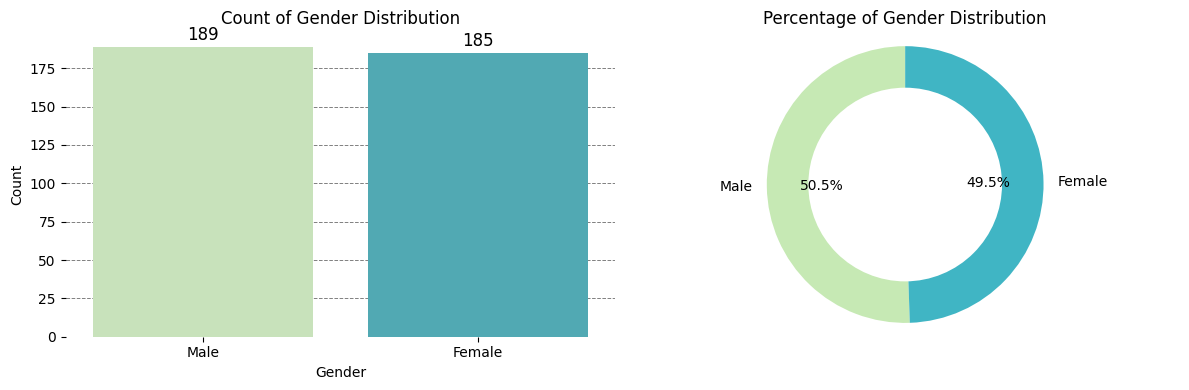

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(x='Gender', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Gender Distribution')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', 
                     color='black', fontsize=12, 
                     xytext=(0, 5), 
                     textcoords='offset points')

axes[0].set_axisbelow(True)  
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

gender_counts = df['Gender'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    gender_counts, 
    labels=gender_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Gender Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

**1. Gender Distribution:**

* **Count:** 
    - There are 189 males and 185 females in the sample. 
    - This indicates a nearly equal distribution of genders in the sample population.

* **Percentage:** 
    - Males constitute approximately 50.5% of the sample, while females make up 49.5%. 

**The gender distribution in the sample population is nearly balanced, with a slight majority of males.**



## How does age distribution vary between different genders in the sample population?

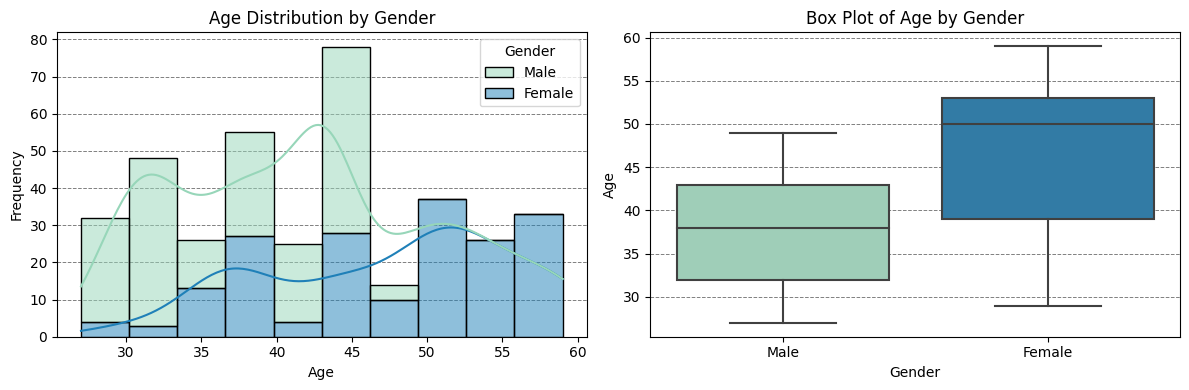

In [17]:
custom_palette = sns.color_palette("YlGnBu", 2)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x='Age', hue='Gender', multiple='stack', 
             bins=10, palette=custom_palette, ax=axes[0], kde=True)
axes[0].set_title('Age Distribution by Gender')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x='Gender', y='Age', data=df, palette=custom_palette, ax=axes[1])
axes[1].set_title('Box Plot of Age by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

**1. Age Distribution by Gender:**

* **Overall Shape:** Both the histogram and box plot suggest that the age distribution is relatively similar between males and females. Both distributions appear to be roughly bell-shaped with a slight right skew, indicating a concentration of individuals in the middle age range with a tapering off towards older ages.

* **Central Tendency:** The peaks of the distributions for both males and females are around the same age range, suggesting that the average age is similar for both genders.

* **Spread:** The box plots show that the spread of ages is comparable between males and females. The interquartile ranges (boxes) are of similar width, and the whiskers extend to a similar range, indicating a comparable variability in age within each gender group.

**While there are some minor differences, the age distribution appears to be quite similar between males and females in the sample population.**


## How does the distribution of sleep disorders vary between genders?

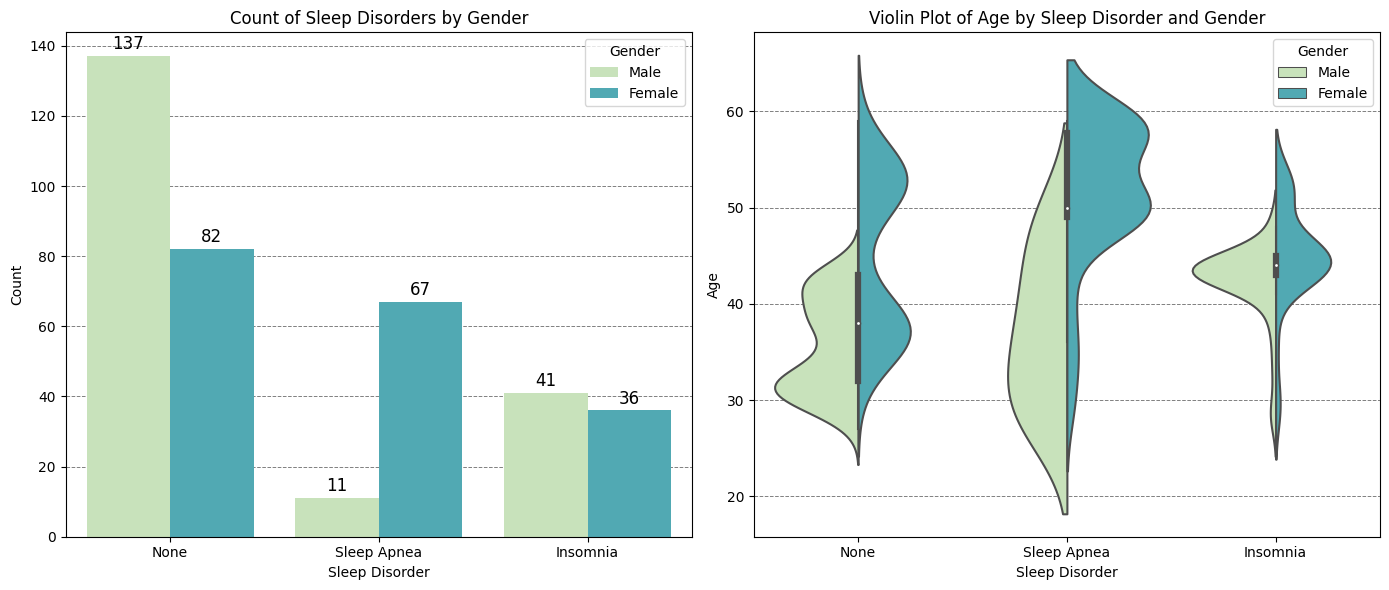

In [18]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Sleep Disorder', hue='Gender', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Sleep Disorders by Gender')
axes[0].set_xlabel('Sleep Disorder')
axes[0].set_ylabel('Count')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', 
                     color='black', fontsize=12, 
                     xytext=(0, 5), 
                     textcoords='offset points')

sns.violinplot(x='Sleep Disorder', y='Age', hue='Gender',
               data=df, palette=custom_palette, split=True, ax=axes[1])
axes[1].set_title('Violin Plot of Age by Sleep Disorder and Gender')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Age')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

**1. Count of Sleep Disorders by Gender:**

* **None:** A higher proportion of males (137) report no sleep disorder compared to females (136). 
* **Sleep Apnea:** Males (82) are more likely to report Sleep Apnea than females (67).
* **Insomnia:** Females (41) are more likely to report Insomnia than males (36).

**2. Violin Plot of Age by Sleep Disorder and Gender:**

* **None:** The violin plots for both males and females with no reported sleep disorder show a similar distribution, with a slight peak in the middle age range.
* **Sleep Apnea:** The violin plot for males with Sleep Apnea is slightly wider than that of females, suggesting a broader age range for males with this disorder.
* **Insomnia:** The violin plot for females with Insomnia is slightly wider than that of males, suggesting a broader age range for females with this disorder.

**The analysis reveals that:**

* **Sleep Apnea:** Males are more likely to report Sleep Apnea than females.
* **Insomnia:** Females are more likely to report Insomnia than males.


## What are the most common occupations reported in the sample population?

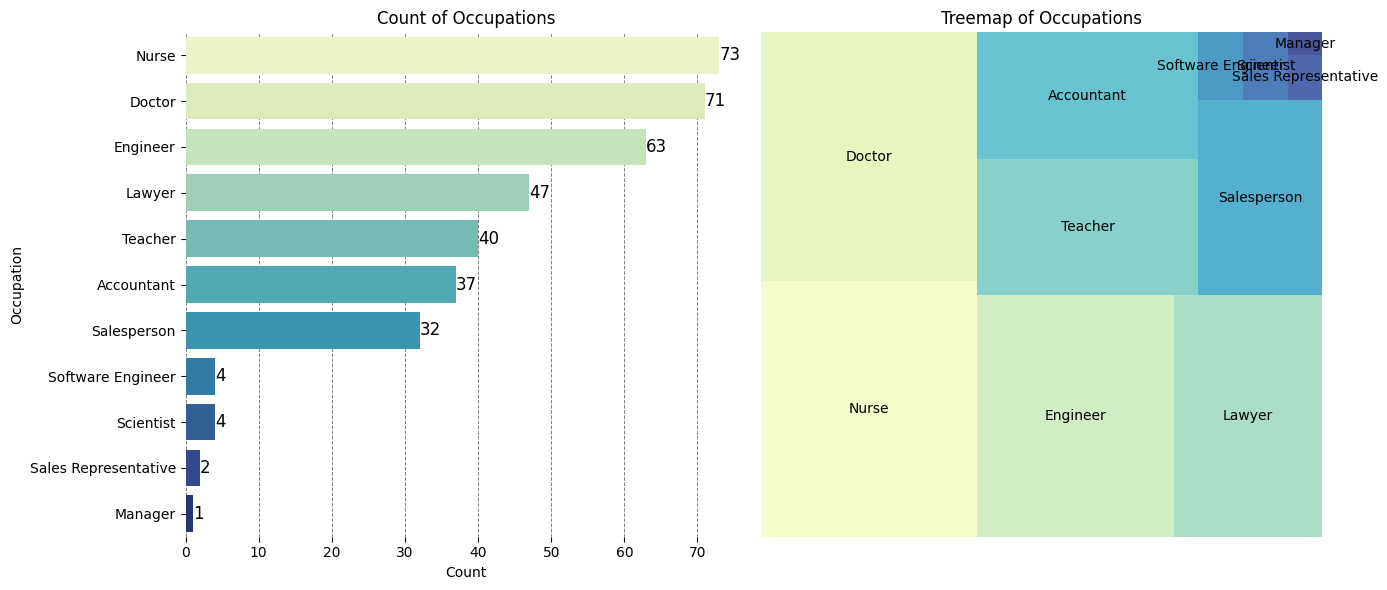

In [19]:
custom_palette = sns.color_palette("YlGnBu", 11)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Get the order of occupations by count, sorted in descending order
occupation_order = df['Occupation'].value_counts().index

# Create the countplot with the specified order
sns.countplot(y='Occupation', data=df, ax=axes[0], palette=custom_palette, order = occupation_order)
axes[0].set_title('Count of Occupations')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Occupation')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     color='black', fontsize=12)

axes[0].set_axisbelow(True)  
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

occupation_counts = df['Occupation'].value_counts()
labels = occupation_counts.index
sizes = occupation_counts.values

squarify.plot(sizes=sizes, label=labels, color=custom_palette[:len(labels)], alpha=.8)
plt.title('Treemap of Occupations')
plt.axis('off')  

plt.tight_layout()
plt.show()

**1. Most Common Occupations:**

* **Nurse:**  With 73 individuals, Nurse is the most frequently reported occupation in the sample.
* **Doctor:**  The second most common occupation is Doctor, with 71 individuals.
* **Engineer:**  Engineer is the third most common occupation, with 63 individuals.

**2. Other Notable Occupations:**

* **Teacher:** 40 individuals reported being Teachers.
* **Lawyer:** 47 individuals reported being Lawyers.
* **Accountant:** 37 individuals reported being Accountants. 
* **Salesperson:** 32 individuals reported being Salespersons.
* **Scientist:** 4 individuals reported being Scientists. 
* **Software Engineer:** 4 individuals reported being Software Engineers.
* **Sales Representative:** 2 individuals reported being Sales Representatives.
* **Manager:** 1 individual reported being a Manager.

*The bar chart provides a clear visual representation of the frequency of each occupation. The length of each bar corresponds to the number of individuals in that occupation.*
*The treemap offers a different perspective, where the size of each rectangle represents the proportion of individuals in that occupation relative to the total sample.*

**The analysis reveals that Nurse, Doctor, and Engineer are the most common occupations reported in the sample population. The treemap provides a complementary view of the occupational distribution, highlighting the relative proportions of each occupation.**


## How do sleep disorders vary across different occupations?

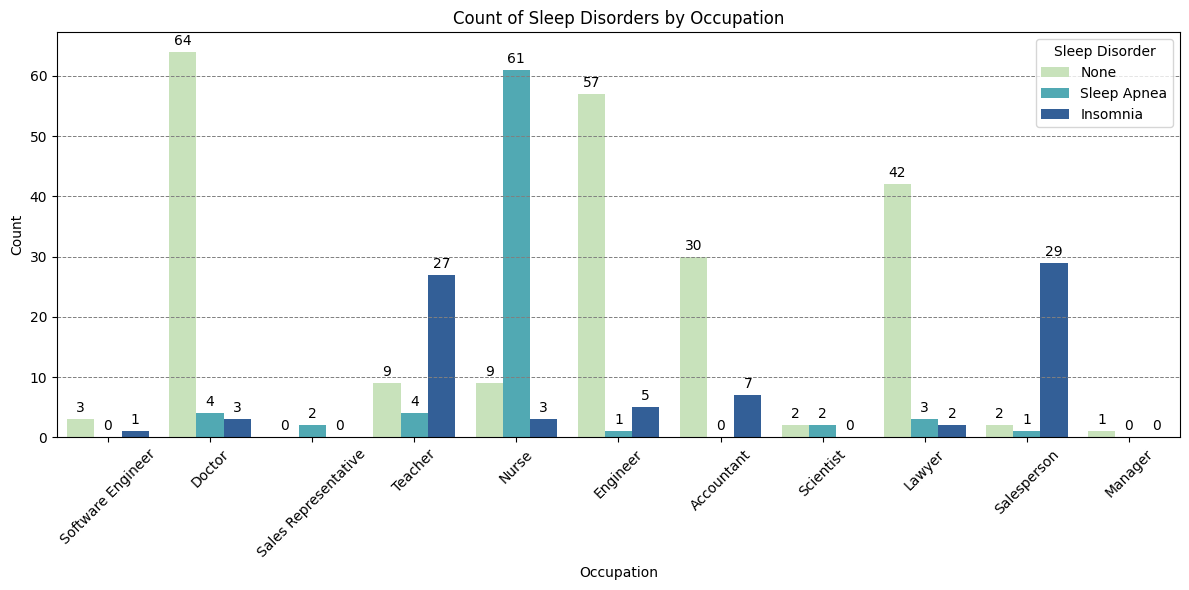

In [20]:
custom_palette = sns.color_palette("YlGnBu", 3)
plt.figure(figsize=(12, 6))

sns.countplot(x='Occupation', hue='Sleep Disorder', data=df, palette=custom_palette)
plt.title('Count of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Sleep Disorder')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', fontsize=10, 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

**1. Sleep Disorders by Occupation:**

* **Nurses:**  Nurses have the highest reported prevalence of Sleep Apnea (61 cases) compared to other occupations. 
* **Doctors:** Doctors have a high prevalence of "None" (64 cases), suggesting a lower incidence of reported sleep disorders in this group. This could be due to factors like better access to healthcare or higher awareness of sleep issues.
* **Lawyers and Salespersons:**  A relatively high proportion of Lawyers (29 cases) and Salespersons (27 cases) report Insomnia compared to other occupations. This might be linked to the stress levels associated with these professions.
* **Other Occupations:** Most other occupations show a relatively balanced distribution of sleep disorders.

**2. Notable Observations:**

* **Software Engineers:** A small sample size makes it difficult to draw strong conclusions about sleep disorders in this group.
* **Managers:** Only one Manager reported a sleep disorder (Insomnia). This could be due to a small sample size or potentially lower prevalence of sleep issues in this specific occupation.

**The analysis suggests that the prevalence of different sleep disorders varies across occupations. Nurses appear to have a higher incidence of Sleep Apnea, while Lawyers and Salespersons show a higher prevalence of Insomnia. Doctors, on the other hand, report a lower overall incidence of sleep disorders.**


## How do different sleep disorders affect various occupations?

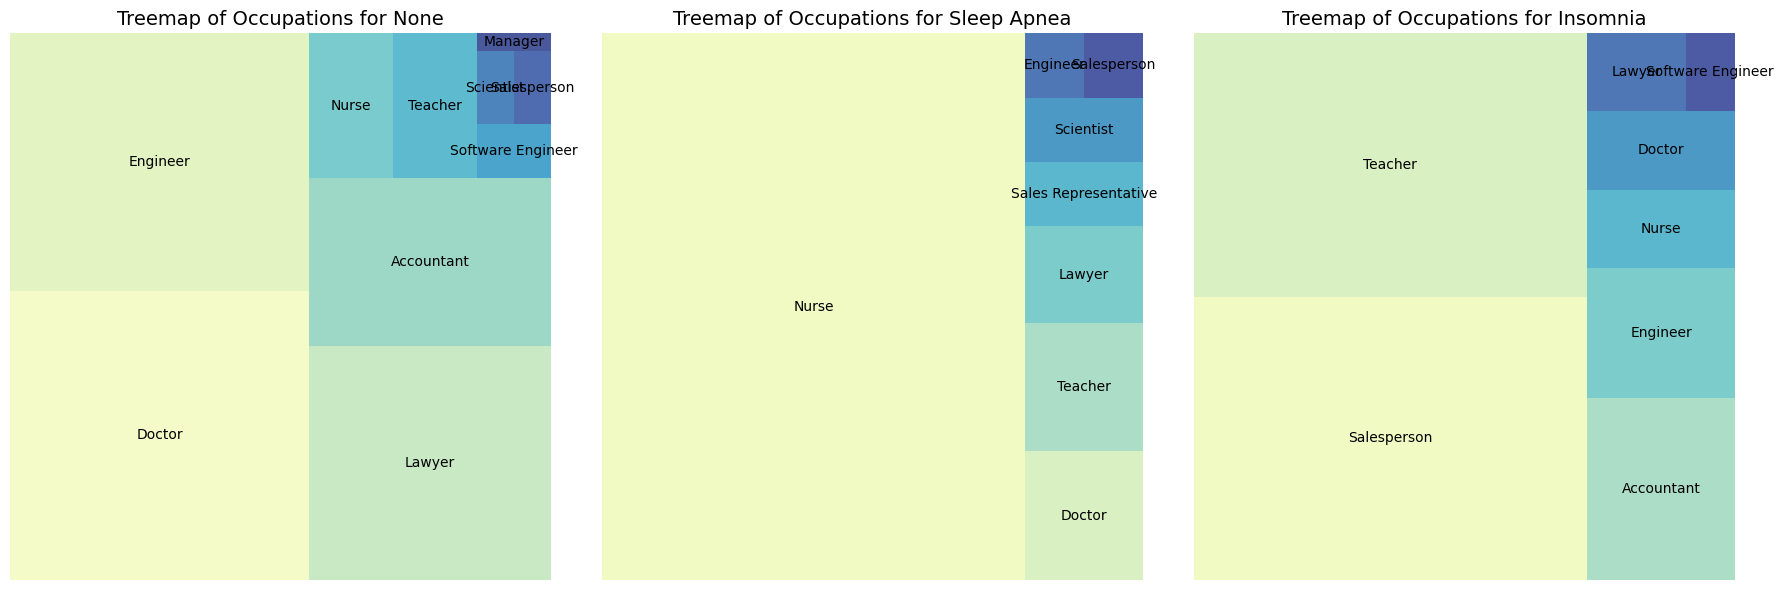

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, disorder in enumerate(['None', 'Sleep Apnea', 'Insomnia']):
    # Filter data for the current sleep disorder
    filtered_data = df[df['Sleep Disorder'] == disorder]
    
    # Count occurrences of each occupation for the current sleep disorder
    occupation_counts = filtered_data['Occupation'].value_counts()
    
    # Create a treemap
    sizes = occupation_counts.values
    labels = occupation_counts.index
    
    squarify.plot(sizes=sizes, label=labels, alpha=.8, ax=axes[i], color=sns.color_palette("YlGnBu", len(labels)))
    axes[i].set_title(f'Treemap of Occupations for {disorder}', fontsize=14)
    axes[i].axis('off')  

plt.tight_layout()
plt.show()

**1. Sleep Disorders and Occupational Distribution:**

* **None:** 
    - Nurses have the largest representation among individuals with no reported sleep disorders. 
    - Doctors and Lawyers also have a significant presence in this category.

* **Sleep Apnea:**
    - Engineers and Nurses have a prominent presence among individuals with Sleep Apnea.
    - Sales Representatives are also relatively well-represented in this category.

* **Insomnia:**
    - Lawyers and Engineers have a larger representation among individuals with Insomnia.
    - Doctors and Nurses are also present in this category.

*The treemaps provide a visual representation of the relative proportions of different occupations within each sleep disorder category. The larger the rectangle, the higher the proportion of individuals in that occupation for the specific sleep disorder.*

**The analysis suggests that:**

* **Sleep Apnea:**  Seems to be more prevalent among Engineers and Nurses.
* **Insomnia:**  Appears to be more common among Lawyers and Engineers.
* **No Sleep Disorder:** Nurses and Doctors are well-represented in this category.

## What is the distribution of BMI categories in the sample population?

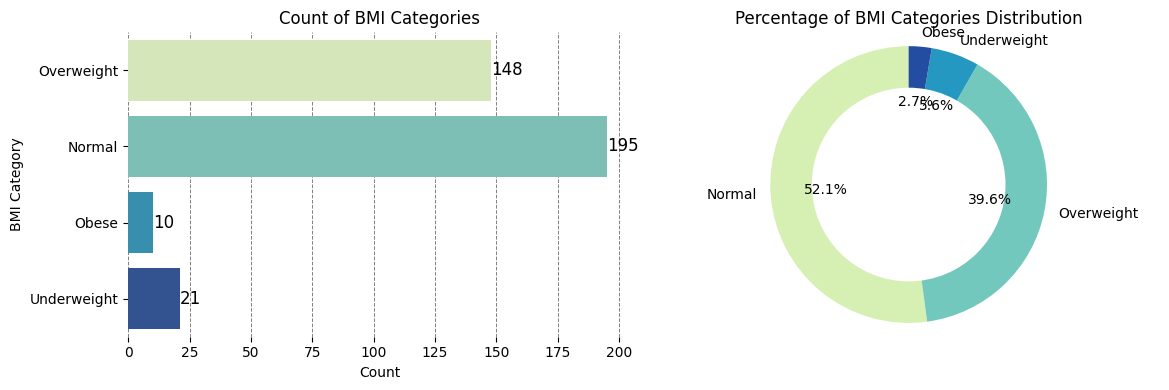

In [22]:
custom_palette = sns.color_palette("YlGnBu", 4)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(y='BMI Category', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of BMI Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('BMI Category')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     color='black', fontsize=12)

axes[0].set_axisbelow(True)  
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

bmi_counts = df['BMI Category'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    bmi_counts, 
    labels=bmi_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=custom_palette
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of BMI Categories Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

**1. BMI Category Distribution:**

* **Normal:** This is the most prevalent category, with 195 individuals (52.1%) falling into this range.
* **Overweight:** The second most common category is Overweight, with 148 individuals (39.6%).
* **Underweight:** A relatively small proportion of the population (21 individuals, 5.6%) falls into the Underweight category.
* **Obese:** The least common category is Obese, with only 10 individuals (2.7%) falling into this range.

**2. Visual Representation:**

*The bar chart provides a clear visual representation of the absolute counts of individuals in each BMI category. The length of each bar corresponds to the number of individuals in that category.*
*Pie Chart:** The pie chart shows the percentage distribution of individuals across the different BMI categories.* 

**The analysis reveals that the majority of the sample population falls into the "Normal" BMI category, followed by "Overweight." The "Underweight" and "Obese" categories are relatively less prevalent.**

## How do sleep disorders vary across different BMI categories?

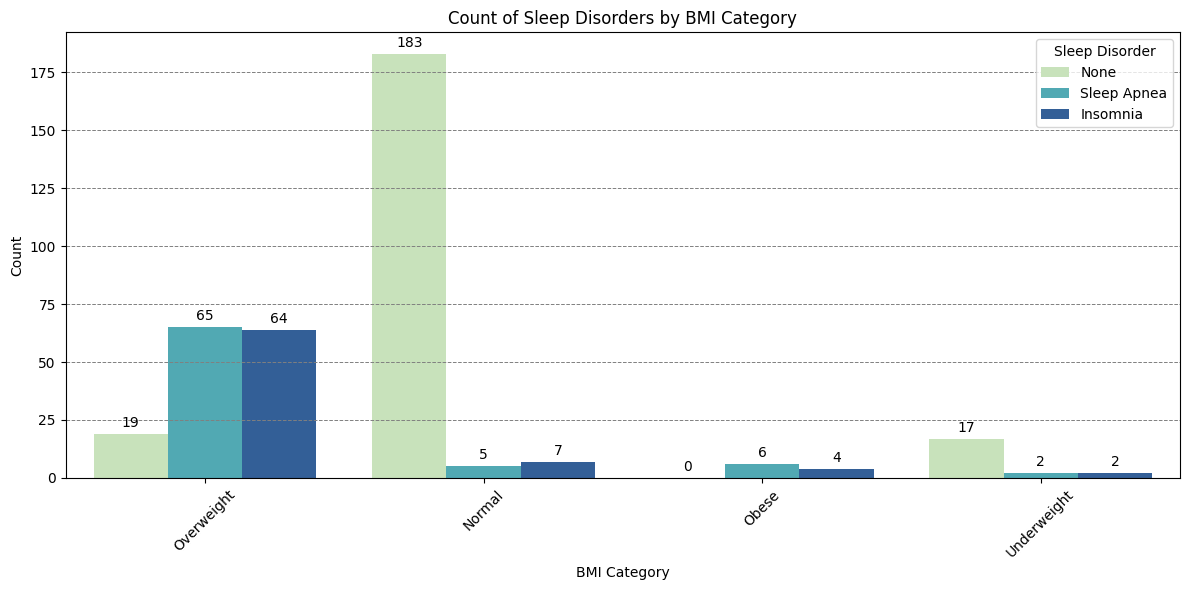

In [23]:
custom_palette = sns.color_palette("YlGnBu", 3)
plt.figure(figsize=(12, 6))

sns.countplot(x='BMI Category', hue='Sleep Disorder', data=df, palette=custom_palette)
plt.title('Count of Sleep Disorders by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
plt.legend(title='Sleep Disorder')

for p in plt.gca().patches:
    plt.annotate(f'{int(p.get_height())}', 
                 (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', 
                 color='black', fontsize=10, 
                 xytext=(0, 5), 
                 textcoords='offset points')

plt.tight_layout()
plt.show()

**1. Sleep Disorders and BMI Categories:**

* **Normal BMI:** Individuals with a "Normal" BMI have the highest count of "None" (183), indicating a lower prevalence of reported sleep disorders in this group.
* **Overweight:** This category shows a relatively balanced distribution of sleep disorders. A significant number report "None" (65), but a considerable proportion also report "Sleep Apnea" (64) and "Insomnia" (19).
* **Obese:**  Individuals in the "Obese" category have a higher count of "Sleep Apnea" (7) compared to other sleep disorders.
* **Underweight:**  The sample size for the "Underweight" category is relatively small. However, it appears to have a higher proportion of "Insomnia" (17) compared to other sleep disorders.

**2. Notable Observations:**

* **Normal BMI:**  Individuals with a "Normal" BMI appear to have a lower prevalence of reported sleep disorders compared to other BMI categories.
* **Overweight and Obese:**  Both these categories show a higher prevalence of "Sleep Apnea" compared to "Normal" and "Underweight" categories.

**The analysis suggests that:**

* **Sleep Apnea:**  Seems to be more prevalent in individuals with "Overweight" and "Obese" BMI.
* **Insomnia:**  Appears to be more common in individuals with "Underweight" and "Overweight" BMI.
* **Normal BMI:**  Individuals with a "Normal" BMI appear to have a lower overall prevalence of reported sleep disorders.



## How do different BMI categories affect various sleep disorders?

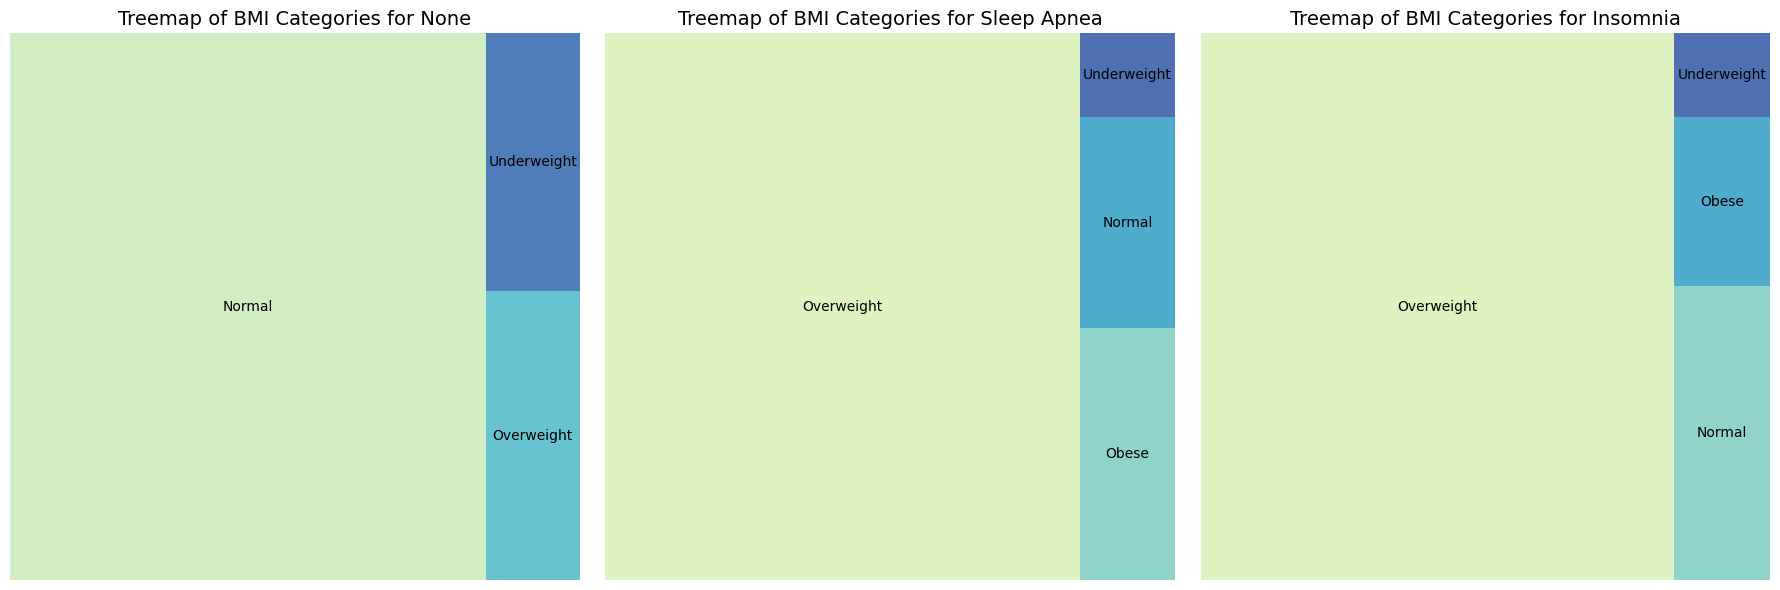

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, disorder in enumerate(['None', 'Sleep Apnea', 'Insomnia']):
    # Filter data for the current sleep disorder
    filtered_data = df[df['Sleep Disorder'] == disorder]
    
    # Count occurrences of each BMI category for the current sleep disorder
    bmi_counts = filtered_data['BMI Category'].value_counts()
    
    # Create a treemap
    sizes = bmi_counts.values
    labels = bmi_counts.index
    
    squarify.plot(sizes=sizes, label=labels, alpha=.8, ax=axes[i], color=sns.color_palette("YlGnBu", len(labels)))
    axes[i].set_title(f'Treemap of BMI Categories for {disorder}', fontsize=14)
    axes[i].axis('off')

plt.tight_layout()
plt.show()

**1. BMI Categories and Sleep Disorders:**

* **None:** Individuals with a "Normal" BMI have the largest representation among those with no reported sleep disorders. "Overweight" individuals also contribute significantly to this category.

* **Sleep Apnea:** "Overweight" individuals have the largest representation among those with Sleep Apnea. "Obese" individuals also contribute to this category.

* **Insomnia:** "Overweight" individuals have the largest representation among those with Insomnia. "Underweight" individuals also contribute to this category.

**2. Visual Interpretation:**

*The treemaps provide a visual representation of the relative proportions of different BMI categories within each sleep disorder group. The larger the rectangle, the higher the proportion of individuals in that BMI category for the specific sleep disorder.*

**The analysis suggests that:**

* **Sleep Apnea:**  Appears to be more prevalent in individuals with "Overweight" and "Obese" BMI.
* **Insomnia:**  Seems to be more common in individuals with "Overweight" and "Underweight" BMI.
* **No Sleep Disorder:**  Individuals with "Normal" and "Overweight" BMI have a higher representation in this category.


# Cardiovascular Health Factors

## How does blood pressure distribution look across the sample population?

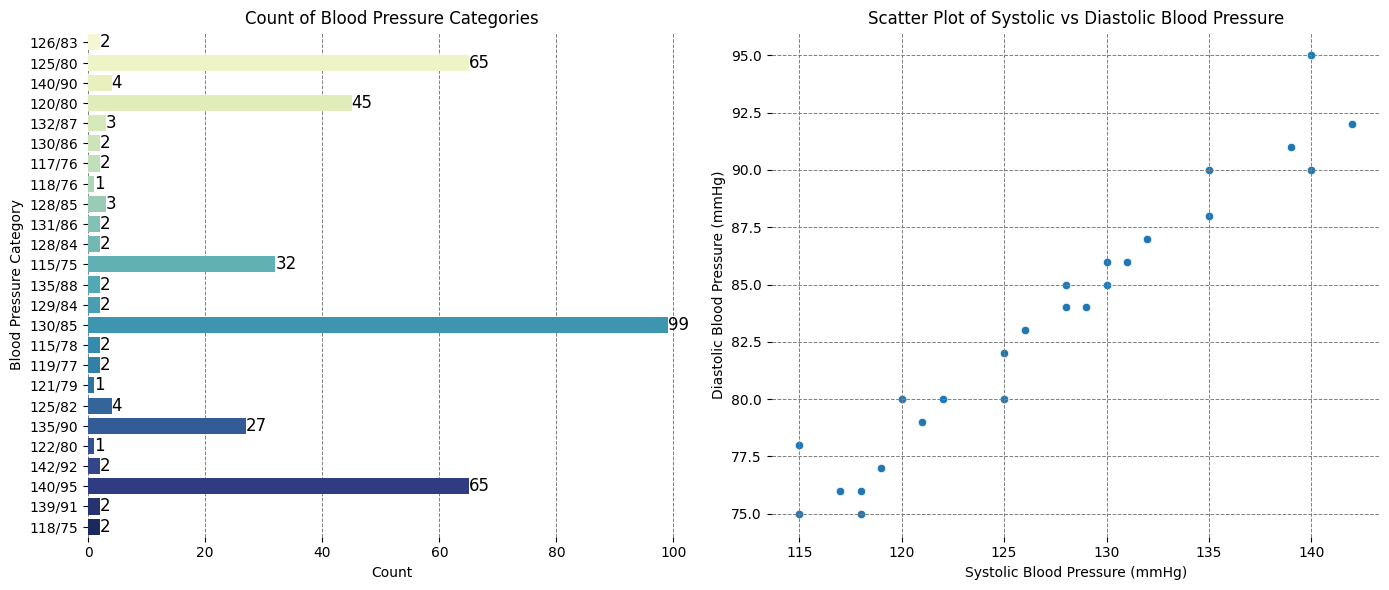

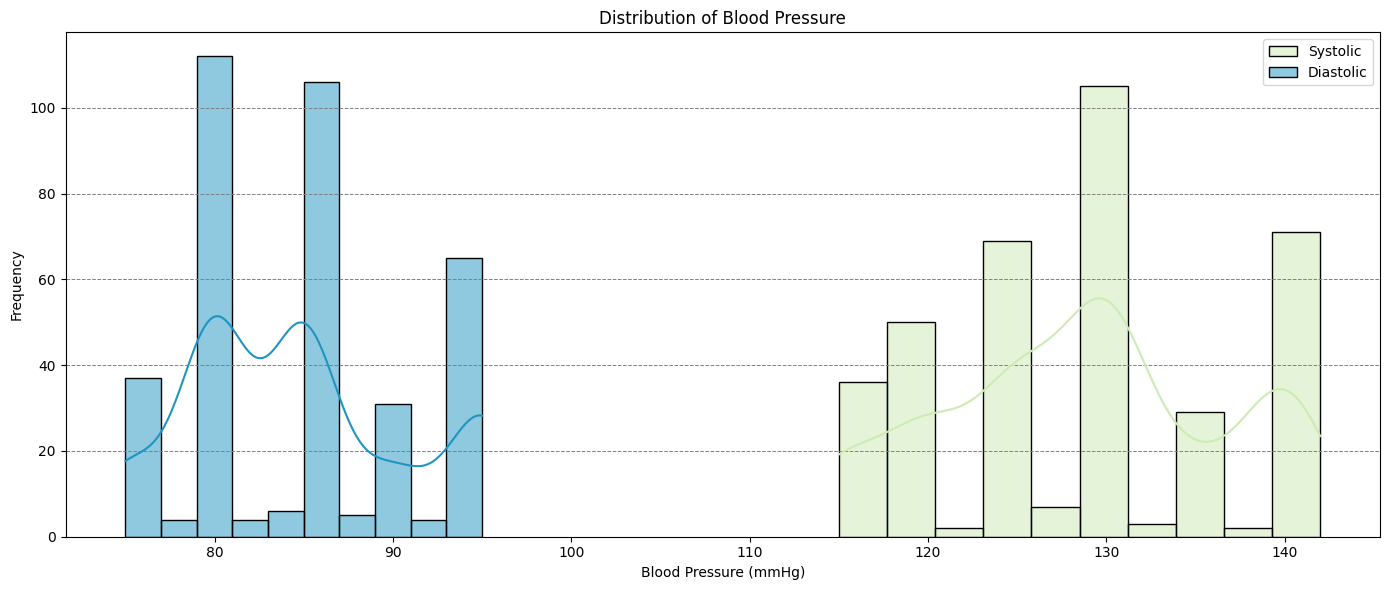

In [25]:
# Split the Blood Pressure into two separate columns: Systolic and Diastolic
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

custom_palette = sns.color_palette("YlGnBu", 25)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(y='Blood Pressure', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Count of Blood Pressure Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Blood Pressure Category')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     color='black', fontsize=12)

axes[0].set_axisbelow(True)  
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

sns.scatterplot(x='Systolic', y='Diastolic', data=df, ax=axes[1])
axes[1].set_title('Scatter Plot of Systolic vs Diastolic Blood Pressure')
axes[1].set_xlabel('Systolic Blood Pressure (mmHg)')
axes[1].set_ylabel('Diastolic Blood Pressure (mmHg)')
axes[1].grid(color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
# Histogram for Systolic Blood Pressure using custom palette
sns.histplot(df['Systolic'], bins=10, kde=True, color=custom_palette[5], label='Systolic')
# Histogram for Diastolic Blood Pressure using custom palette
sns.histplot(df['Diastolic'], bins=10, kde=True, color=custom_palette[15], label='Diastolic')

plt.title('Distribution of Blood Pressure')
plt.xlabel('Blood Pressure (mmHg)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* **Blood Pressure Categories:** The bar chart shows the frequency of different blood pressure readings. This provides a quick overview of the most common blood pressure measurements in the sample. 

* **Distribution of Blood Pressure:** The bar chart shows that the majority of the population falls into the 129/84 blood pressure category, with 99 individuals. This suggests that a significant portion of the sample has a relatively normal blood pressure reading.

* **Other Common Readings:** 
    - 140/90 (systolic/diastolic) has 65 individuals, indicating a significant number in the pre-hypertension range.
    - 120/80 has 45 individuals, a common reading within the normal range.

* **Less Frequent Readings:** There are numerous blood pressure readings with low counts, indicating a wide range of individual blood pressure values in the sample.


* **Systolic vs. Diastolic Blood Pressure:**

    * The scatter plot visualizes the relationship between systolic and diastolic blood pressure readings for each individual. 
    * There is a clear positive correlation between systolic and diastolic blood pressure. As systolic pressure increases, diastolic pressure also tends to increase. 

**The analysis reveals that the majority of the sample population has a blood pressure reading of 129/84, suggesting a relatively normal distribution. However, a significant portion also falls into the pre-hypertension range (140/90).
There is a clear positive correlation between systolic and diastolic blood pressure readings.**


## Do individuals with higher blood pressure have a higher prevalence of sleep disorders?

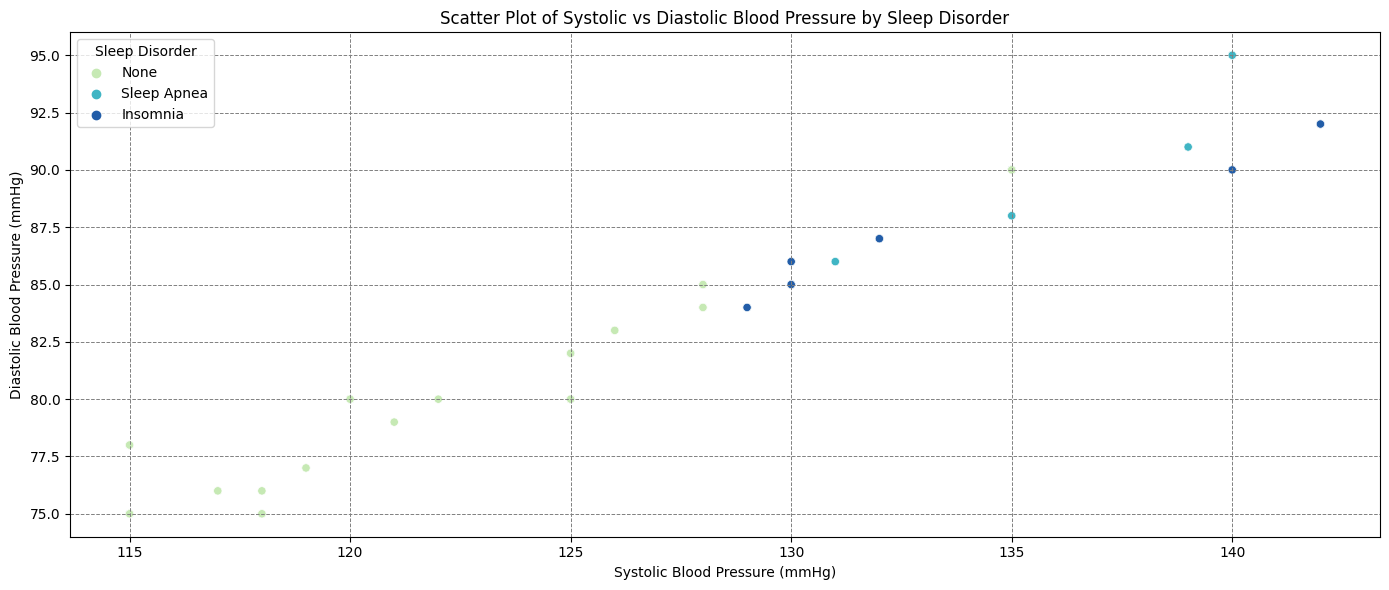

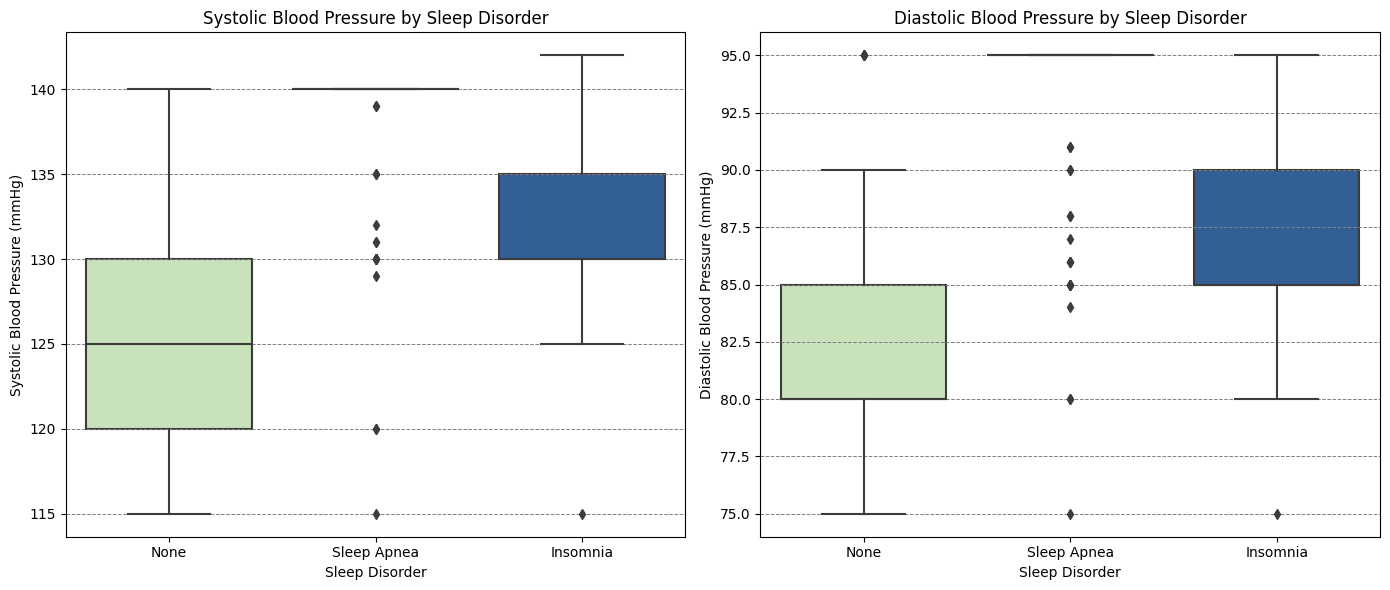

In [26]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='Systolic', y='Diastolic', hue='Sleep Disorder', data=df, palette='YlGnBu')
plt.title('Scatter Plot of Systolic vs Diastolic Blood Pressure by Sleep Disorder')
plt.xlabel('Systolic Blood Pressure (mmHg)')  
plt.ylabel('Diastolic Blood Pressure (mmHg)')  
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)  
sns.boxplot(x='Sleep Disorder', y='Systolic', data=df, palette='YlGnBu')
plt.title('Systolic Blood Pressure by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.subplot(1, 2, 2)  
sns.boxplot(x='Sleep Disorder', y='Diastolic', data=df, palette='YlGnBu')
plt.title('Diastolic Blood Pressure by Sleep Disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* **Overall Trend:** The scatter plot shows a general trend where individuals with higher systolic blood pressure tend to have higher diastolic blood pressure as well. This confirms the expected positive correlation between systolic and diastolic blood pressure.

* **Sleep Disorder Influence:** 
    - Individuals with Sleep Apnea seem to have a slightly higher concentration of data points towards the higher end of both systolic and diastolic blood pressure ranges. This suggests a potential association between higher blood pressure and Sleep Apnea.
    - Individuals with Insomnia appear to be more evenly distributed across the blood pressure range. 

* **Systolic Blood Pressure:** The box plot for individuals with Sleep Apnea shows a slight shift towards higher systolic blood pressure compared to those with "None" or "Insomnia." This supports the observation from the scatter plot.
* **Diastolic Blood Pressure:** The box plot for individuals with Sleep Apnea also suggests a slightly higher diastolic blood pressure compared to those with "None" or "Insomnia."

***The analysis provides some evidence suggesting a potential link between higher blood pressure and Sleep Apnea. Individuals with Sleep Apnea appear to have slightly higher systolic and diastolic blood pressure readings compared to those with other sleep disorders or no reported sleep disorders.***


## Are there significant differences in blood pressure distributions between males and females?

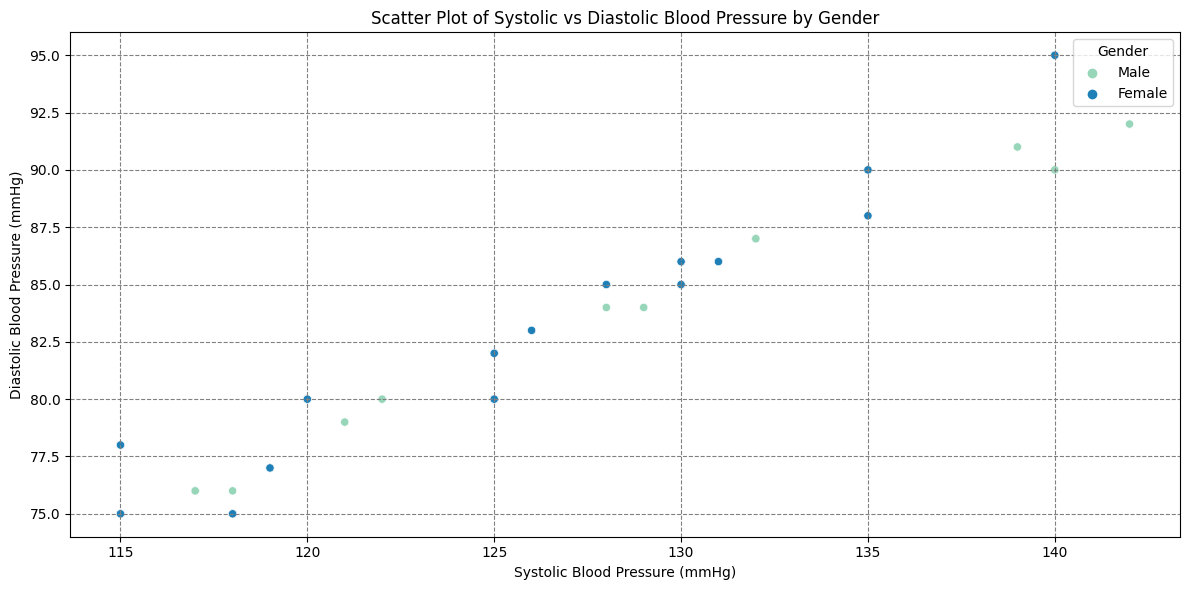

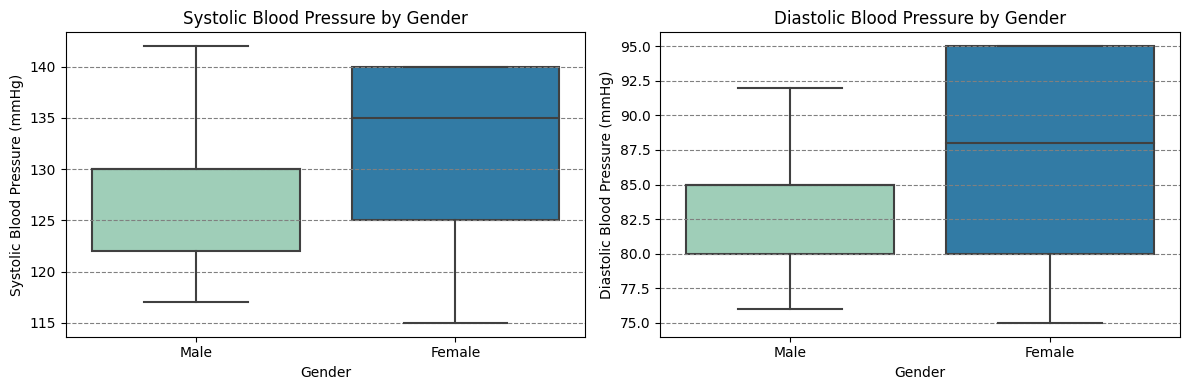

In [27]:
# Scatter plot of Systolic vs Diastolic Blood Pressure by Gender
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Systolic', y='Diastolic', hue='Gender', data=df, palette='YlGnBu')
plt.title('Scatter Plot of Systolic vs Diastolic Blood Pressure by Gender')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.grid(color='gray', linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))
# Box plot for Systolic Blood Pressure by Gender
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Systolic', data=df, palette='YlGnBu')
plt.title('Systolic Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.grid(axis='y', color='gray', linestyle='--')

# Box plot for Diastolic Blood Pressure by Gender
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Diastolic', data=df, palette='YlGnBu')
plt.title('Diastolic Blood Pressure by Gender')
plt.xlabel('Gender')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

**1. Scatter Plot of Systolic vs. Diastolic Blood Pressure by Gender:**

* **Overall Trend:** The scatter plot shows a general positive correlation between systolic and diastolic blood pressure for both males and females. As systolic pressure increases, diastolic pressure also tends to increase. 

* **Gender Differences:** 
    - There seems to be a slight separation between the data points for males and females. 
    - Males tend to have a slightly higher concentration of data points towards the higher end of both systolic and diastolic blood pressure ranges compared to females.

* **Systolic Blood Pressure:** The box plot for males shows a slightly higher median and a wider spread compared to females. This suggests that males might have slightly higher systolic blood pressure on average.

* **Diastolic Blood Pressure:** The box plot for females shows a slightly higher median and a wider spread compared to males. This suggests that females might have slightly higher diastolic blood pressure on average.

**The analysis suggests that there might be some subtle differences in blood pressure distributions between males and females. Males tend to have slightly higher systolic blood pressure, while females tend to have slightly higher diastolic blood pressure.**


## What is the average resting heart rate in the sample population?


The average Heart Rate is: 
70.17



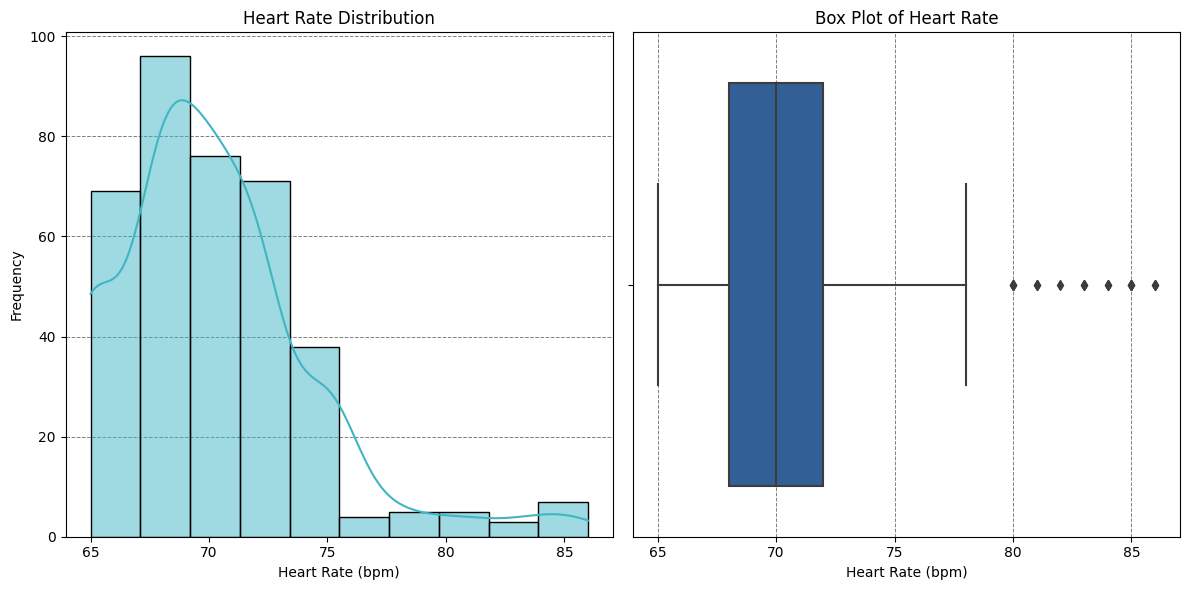

In [28]:
# Calculate the average Heart Rate
average_heart_rate = df['Heart Rate'].mean()
print(f"\nThe average Heart Rate is: \n{average_heart_rate:.2f}\n")

custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Heart Rate distribution
sns.histplot(df['Heart Rate'], bins=10, kde=True, color=custom_palette[1], ax=axes[0])
axes[0].set_title('Heart Rate Distribution')
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

# Box Plot for Heart Rate
sns.boxplot(x=df['Heart Rate'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Heart Rate')
axes[1].set_xlabel('Heart Rate (bpm)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

**1. Heart Rate Distribution:**

* **Histogram:** The histogram shows the distribution of heart rates in the sample. The distribution appears to be roughly bell-shaped, with a peak around 70-75 beats per minute (bpm). This suggests that a majority of individuals in the sample have a resting heart rate within this range. 

* **Box Plot:** The box plot provides a visual summary of the distribution. The box represents the interquartile range (IQR), which contains 50% of the data. The median heart rate appears to be around 70-75 bpm, which aligns with the peak of the histogram. 

**Based on the histogram and box plot, the average resting heart rate in the sample population appears to be around 70-75 beats per minute.**


## Are there significant differences in heart rate distributions between individuals with different sleep disorders?

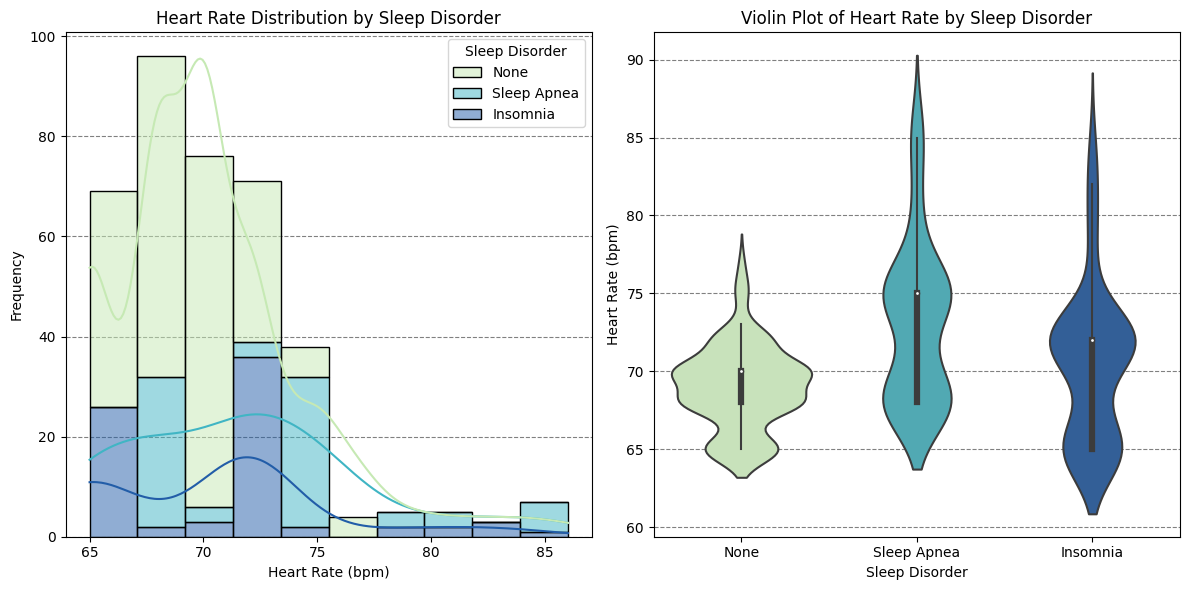

In [29]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Heart Rate', hue='Sleep Disorder', multiple='stack', 
             bins=10, palette=custom_palette, ax=axes[0], kde=True)
axes[0].set_title('Heart Rate Distribution by Sleep Disorder')
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.violinplot(x='Sleep Disorder', y='Heart Rate', data=df, palette=custom_palette, ax=axes[1])
axes[1].set_title('Violin Plot of Heart Rate by Sleep Disorder')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Heart Rate (bpm)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

**1. Heart Rate Distribution by Sleep Disorder:**

* **Histogram:** 
    - Individuals with "None" (no sleep disorder) show a fairly symmetrical distribution of heart rates, with a peak around 70-75 bpm.
    - Individuals with "Sleep Apnea" appear to have a slightly higher proportion of higher heart rates compared to those with "None." The distribution seems to be skewed towards higher values.
    - Individuals with "Insomnia" show a distribution with a slightly higher peak around the 70-75 bpm range, suggesting a possible concentration of higher heart rates. 

* **Violin Plot:** 
    - The violin plot confirms the observations from the histogram. It visually depicts the density of heart rates for each sleep disorder group. 
    - The violin plot for "Sleep Apnea" is wider towards the higher heart rate range, indicating a greater spread and potentially higher average heart rates compared to the other groups. 
    - The violin plot for "Insomnia" shows a slightly wider distribution compared to "None," suggesting a greater variability in heart rates for individuals with Insomnia.

**The analysis suggests that,** 
* There might be subtle differences in heart rate distributions between individuals with different sleep disorders. 
* Individuals with "Sleep Apnea" appear to have a higher proportion of higher heart rates compared to those with "None" or "Insomnia."
* Individuals with "Insomnia" show a greater variability in heart rates compared to those with "None."


## Are there significant differences in heart rate distributions between males and females?

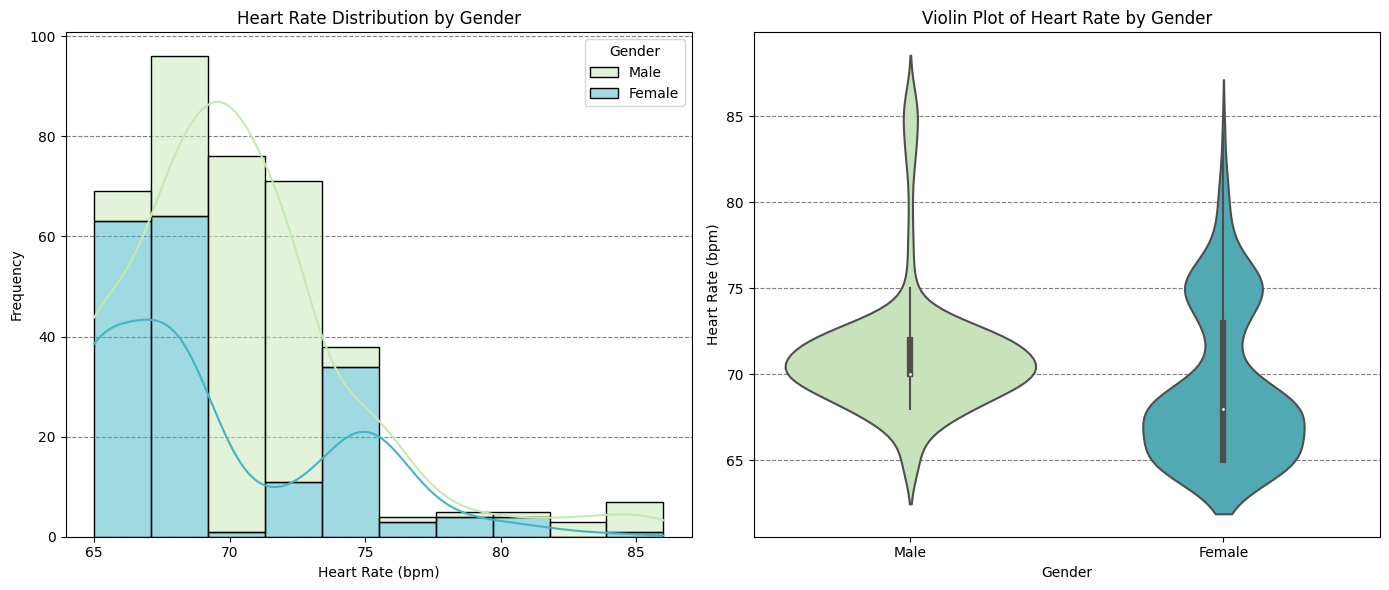

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.histplot(data=df, x='Heart Rate', hue='Gender', multiple='stack', 
             bins=10, palette=custom_palette, ax=axes[0], kde=True)
axes[0].set_title('Heart Rate Distribution by Gender')
axes[0].set_xlabel('Heart Rate (bpm)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.violinplot(x='Gender', y='Heart Rate', data=df, palette=custom_palette, ax=axes[1])
axes[1].set_title('Violin Plot of Heart Rate by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Heart Rate (bpm)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

**1. Heart Rate Distribution by Gender:**

* **Histogram:** 
    - The histogram shows the distribution of heart rates for both males and females. 
    - Both distributions appear to be roughly bell-shaped, with a peak around 70-75 bpm for both genders.
    - There seems to be a slight shift in the distribution for males towards higher heart rates compared to females. 

* **Violin Plot:** 
    - The violin plot confirms the observation from the histogram. It visually depicts the density of heart rates for each gender. 
    - The violin plot for males is slightly wider towards the higher heart rate range, indicating a greater spread and potentially higher average heart rates compared to females.

**The analysis suggests that,**
* There might be subtle differences in heart rate distributions between males and females. 
* Males appear to have a slightly higher proportion of higher heart rates compared to females.
* The violin plot also indicates a slightly greater variability in heart rates for males.


In [31]:
# Calculate and print average heart rates
average_heart_rates = df.groupby('Gender')['Heart Rate'].mean()
print("Average Heart Rates by Gender:")
print(average_heart_rates)

Average Heart Rates by Gender:
Gender
Female    69.259459
Male      71.052910
Name: Heart Rate, dtype: float64


* **Average Heart Rate:**
    - The average resting heart rate for females is 69.26 beats per minute (bpm).
    - The average resting heart rate for males is 71.05 bpm.

* **Difference in Average Heart Rates:**  The table confirms the earlier observation from the visualizations. Males have a slightly higher average resting heart rate (approximately 1.8 bpm) compared to females in this sample population.


## Are there any notable trends in blood pressure readings across different BMI categories?

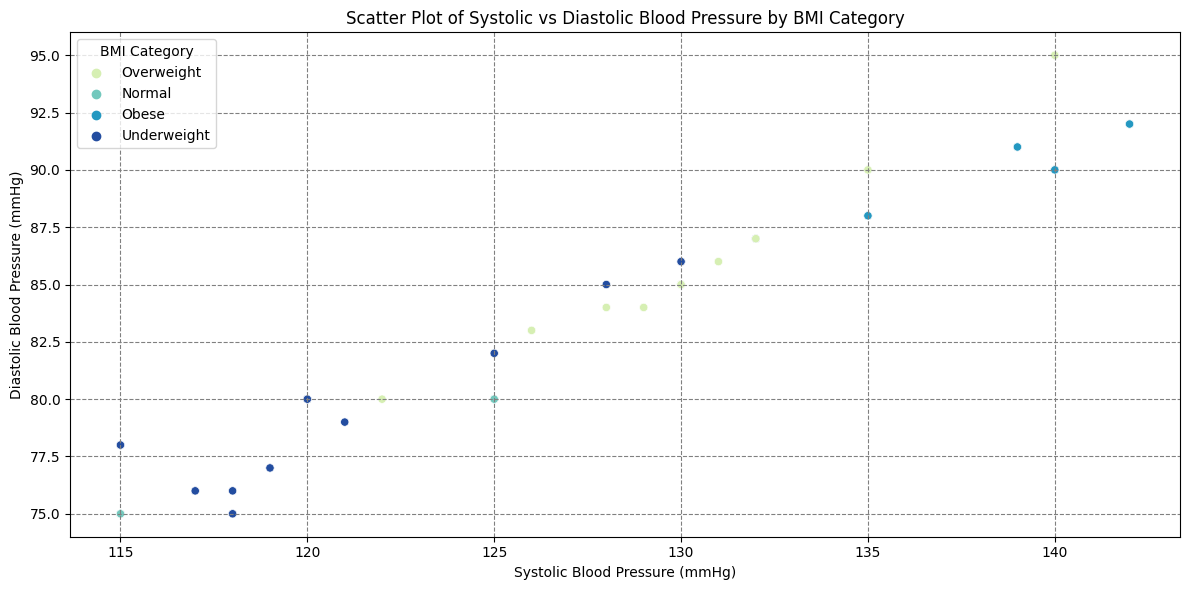

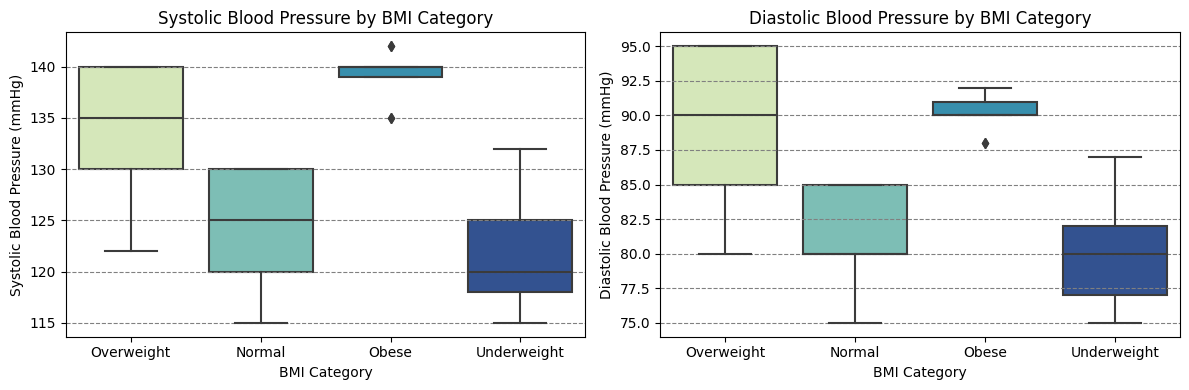

In [32]:
custom_palette = sns.color_palette("YlGnBu", 4)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Systolic', y='Diastolic', hue='BMI Category', data=df, palette=custom_palette)
plt.title('Scatter Plot of Systolic vs Diastolic Blood Pressure by BMI Category')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.grid(color='gray', linestyle='--')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.boxplot(x='BMI Category', y='Systolic', data=df, palette=custom_palette)
plt.title('Systolic Blood Pressure by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Systolic Blood Pressure (mmHg)')
plt.grid(axis='y', color='gray', linestyle='--')

plt.subplot(1, 2, 2)
sns.boxplot(x='BMI Category', y='Diastolic', data=df, palette=custom_palette)
plt.title('Diastolic Blood Pressure by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

**1. Systolic vs. Diastolic Blood Pressure by BMI Category:**

* **Overall Trend:** As expected, the scatter plot shows a positive correlation between systolic and diastolic blood pressure across all BMI categories. As systolic pressure increases, diastolic pressure also tends to increase.

* **BMI Category Influence:** 
    - Individuals in the "Obese" category seem to have a higher concentration of data points towards the higher end of both systolic and diastolic blood pressure ranges. 
    - Individuals in the "Underweight" category appear to be more concentrated towards the lower end of the blood pressure range.
    - Individuals in the "Normal" and "Overweight" categories show a more even distribution across the blood pressure ranges.

* **Systolic Blood Pressure:** 
    - The box plot for the "Obese" category shows a slight shift towards higher systolic blood pressure compared to the other categories. 
    - The "Underweight" category shows the lowest median systolic blood pressure. 
    - The "Normal" and "Overweight" categories have a similar range of systolic blood pressure.

* **Diastolic Blood Pressure:** 
    - The box plot for the "Obese" category also suggests a slightly higher diastolic blood pressure compared to the other categories.
    - The "Underweight" category shows the lowest median diastolic blood pressure. 
    - The "Normal" and "Overweight" categories have a similar range of diastolic blood pressure.

**The analysis suggests that,** 
* Individuals in the "Obese" category tend to have slightly higher systolic and diastolic blood pressure readings compared to those in other BMI categories. 
* Individuals in the "Underweight" category appear to have lower blood pressure readings compared to other BMI categories.

# Lifestyle Factors

## What is the average daily physical activity time for individuals in the sample?

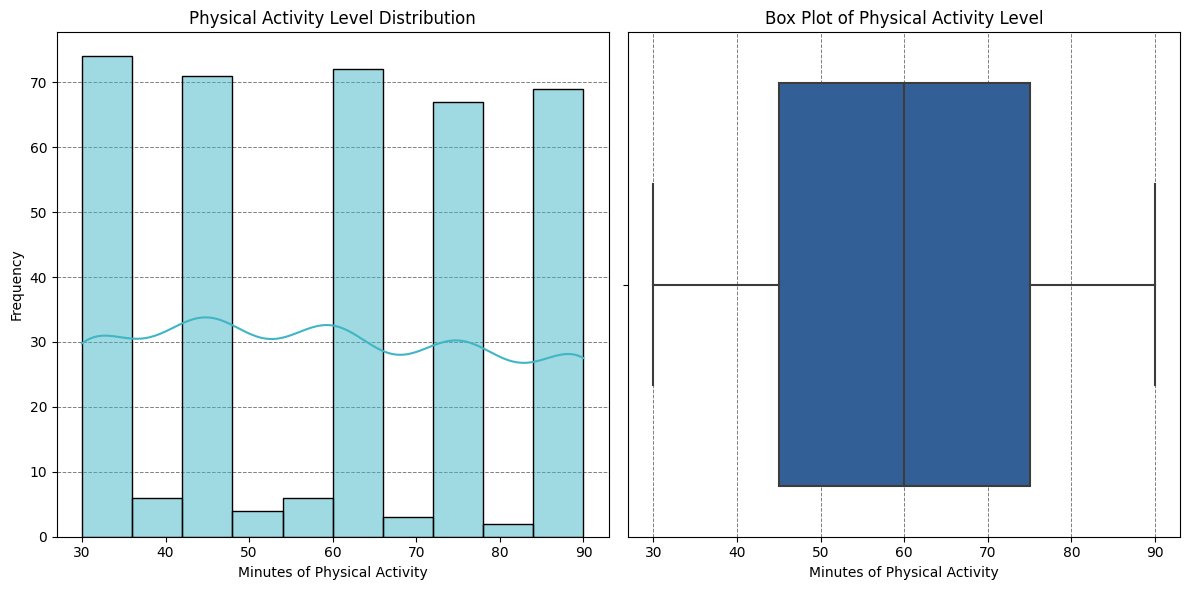

In [33]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Physical Activity Level'], bins=10, kde=True,
             color=custom_palette[1], ax=axes[0])
axes[0].set_title('Physical Activity Level Distribution')
axes[0].set_xlabel('Minutes of Physical Activity')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Physical Activity Level'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Physical Activity Level')
axes[1].set_xlabel('Minutes of Physical Activity')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* **Distribution of Physical Activity Levels:** 
    - The histogram shows the distribution of physical activity levels in the sample. It appears to be relatively evenly distributed with multiple peaks, suggesting that there are several groups of individuals with different levels of physical activity. 
    - The distribution is not perfectly symmetrical, with a slight skew towards higher levels of physical activity.

* **Box Plot:** 
    - The box plot provides a visual summary of the distribution. The box represents the interquartile range (IQR), which contains 50% of the data. 
    - The median physical activity level appears to be around 60-65 minutes. 
    - The box plot also indicates a relatively wide range of physical activity levels in the sample.

**Based on the histogram and box plot, the average daily physical activity time for individuals in the sample population appears to be around 60-65 minutes.**


## How does the distribution of physical activity levels vary across different genders?

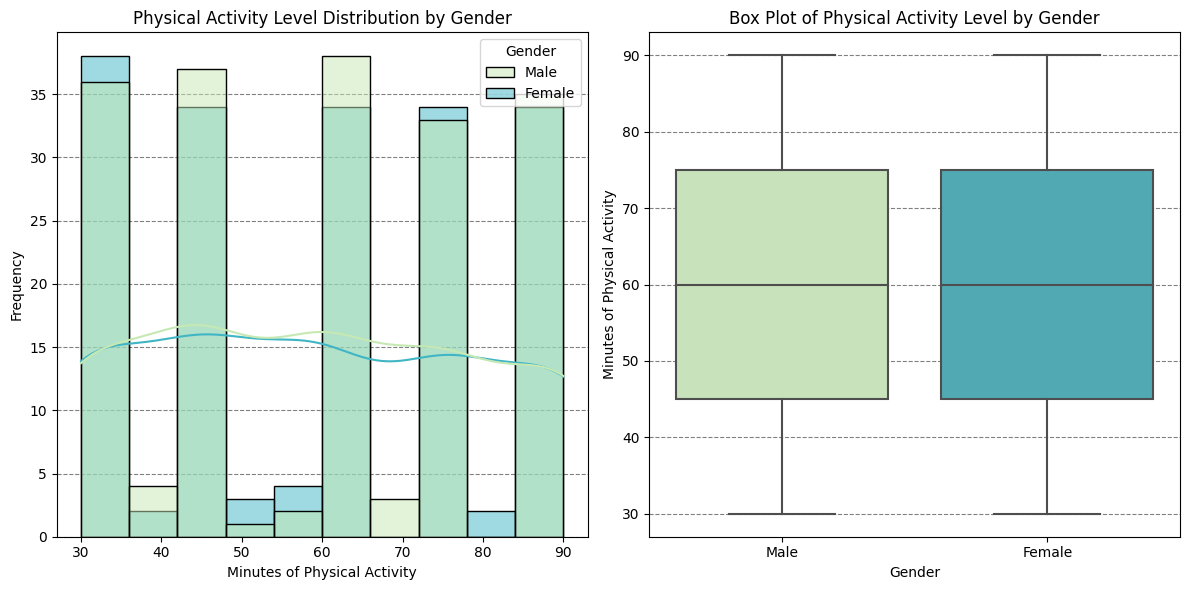

In [34]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Physical Activity Level', hue='Gender',
             bins=10, palette=custom_palette,
             ax=axes[0], kde=True)
axes[0].set_title('Physical Activity Level Distribution by Gender')
axes[0].set_xlabel('Minutes of Physical Activity')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.boxplot(x='Gender', y='Physical Activity Level', data=df,
            palette=custom_palette, ax=axes[1])
axes[1].set_title('Box Plot of Physical Activity Level by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Minutes of Physical Activity')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()


* **Distribution by Gender:**
    - **Histogram:** 
        - Both males and females show a similar pattern of physical activity levels, with a few prominent peaks. 
        - Males seem to have a slightly higher proportion of individuals engaging in higher levels of physical activity (70-90 minutes). 

    - **Box Plot:**
        - The box plot confirms the observation from the histogram. The median physical activity level for males appears to be slightly higher than for females.
        - The range of physical activity levels is also slightly wider for males, indicating a greater variability in physical activity levels among males. 

**The analysis suggests that,** 
* While both males and females show similar patterns of physical activity levels, males tend to engage in slightly higher levels of physical activity compared to females. 
* The distribution of physical activity levels is slightly wider for males, indicating greater variability in their activity levels.


In [35]:
# Calculate and print average Physical Activity Level by gender
average_physical_activity_level = df.groupby('Gender')['Physical Activity Level'].mean()
print("Average Physical Activity Level by Gender:")
print(average_physical_activity_level)

Average Physical Activity Level by Gender:
Gender
Female    59.140541
Male      59.201058
Name: Physical Activity Level, dtype: float64


***Males have a slightly higher average (59.2 minutes) than females (59.1 minutes).***

## How does physical activity level differ among individuals with different sleep disorders?

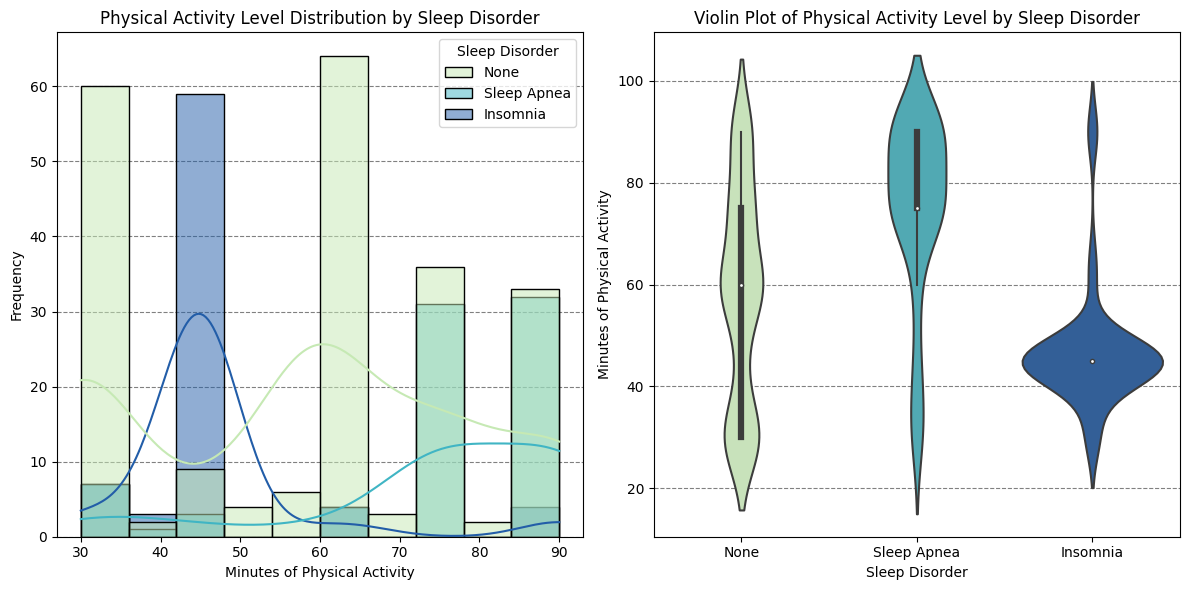

In [36]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Physical Activity Level', hue='Sleep Disorder',
             bins=10, palette=custom_palette,
             ax=axes[0], kde=True)
axes[0].set_title('Physical Activity Level Distribution by Sleep Disorder')
axes[0].set_xlabel('Minutes of Physical Activity')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.violinplot(x='Sleep Disorder', y='Physical Activity Level',
               data=df, palette=custom_palette,
               ax=axes[1])
axes[1].set_title('Violin Plot of Physical Activity Level by Sleep Disorder')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Minutes of Physical Activity')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()


**1. Distribution of Physical Activity by Sleep Disorder:**

* **Histogram:** 
    - Individuals with "None" (no sleep disorder) show a fairly symmetrical distribution of physical activity levels, with a peak around 60-65 minutes.
    - Individuals with "Sleep Apnea" appear to have a slightly lower proportion of higher levels of physical activity. The distribution seems to be skewed towards lower values.
    - Individuals with "Insomnia" show a distribution with a slightly higher proportion of higher levels of physical activity. The distribution seems to be skewed towards higher values.

* **Violin Plot:** 
    - The violin plot confirms the observations from the histogram. It visually depicts the density of physical activity levels for each sleep disorder group. 
    - The violin plot for "Sleep Apnea" is wider towards the lower physical activity range, indicating a greater spread and potentially lower average physical activity levels compared to the other groups. 
    - The violin plot for "Insomnia" is wider towards the higher physical activity range, suggesting a greater spread and potentially higher average physical activity levels compared to the other groups.

**The analysis suggests that,** 
* There might be subtle differences in physical activity levels among individuals with different sleep disorders. 
* Individuals with "Sleep Apnea" appear to have lower levels of physical activity compared to those with "None" or "Insomnia."
* Individuals with "Insomnia" appear to have higher levels of physical activity compared to those with "None" or "Sleep Apnea."
know if you have any other questions or would like to explore further aspects of the data!


In [37]:
# Calculate and print average Physical Activity Level by sleep disorder
average_sleep_disorder = df.groupby('Sleep Disorder')['Physical Activity Level'].mean()
print("Average Physical Activity Level by Sleep Disorder:")
print(average_sleep_disorder)

Average Physical Activity Level by Sleep Disorder:
Sleep Disorder
Insomnia       46.818182
None           57.949772
Sleep Apnea    74.794872
Name: Physical Activity Level, dtype: float64


## What is the average stress level reported by individuals in the sample?

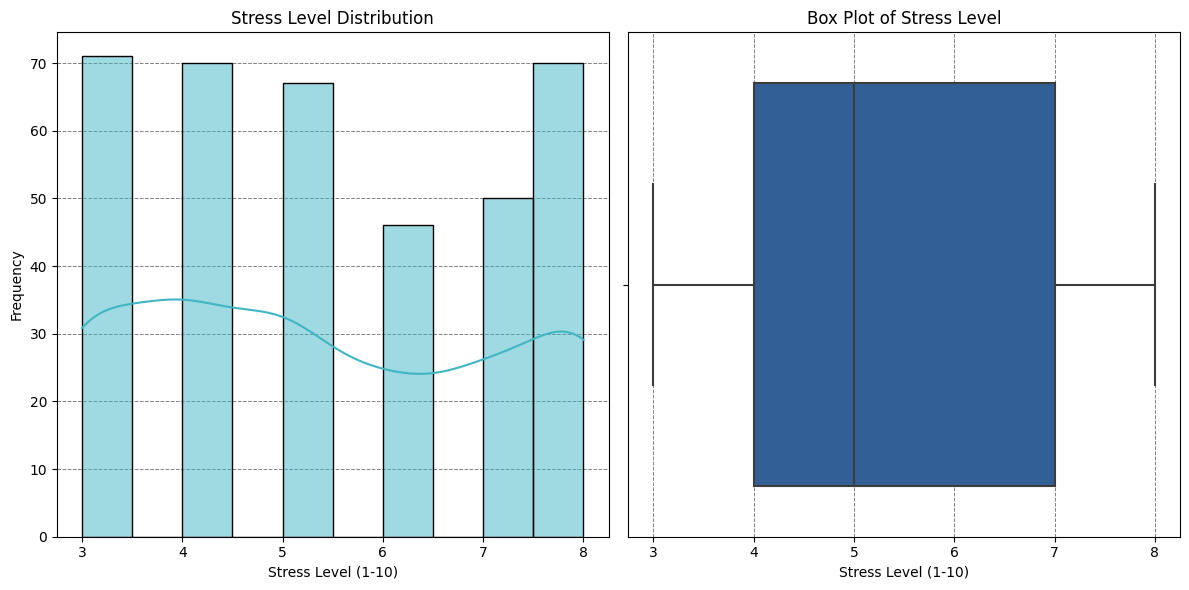

In [38]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Stress Level'], bins=10, kde=True,
             color=custom_palette[1], ax=axes[0])
axes[0].set_title('Stress Level Distribution')
axes[0].set_xlabel('Stress Level (1-10)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Stress Level'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Stress Level')
axes[1].set_xlabel('Stress Level (1-10)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* **Distribution of Stress Levels:** 
    - The distribution appears to be relatively symmetrical with a peak around 4-5 on the stress scale (1-10). This suggests that a majority of individuals in the sample report moderate levels of stress. 

* **Box Plot:** 
    - The median stress level appears to be around 4-5 on the scale, which aligns with the peak of the histogram. 

**Based on the histogram and box plot, the average stress level reported by individuals in the sample population appears to be around 4-5 on a scale of 1-10, indicating moderate levels of stress.**



## Are there significant differences in stress levels between males and females?

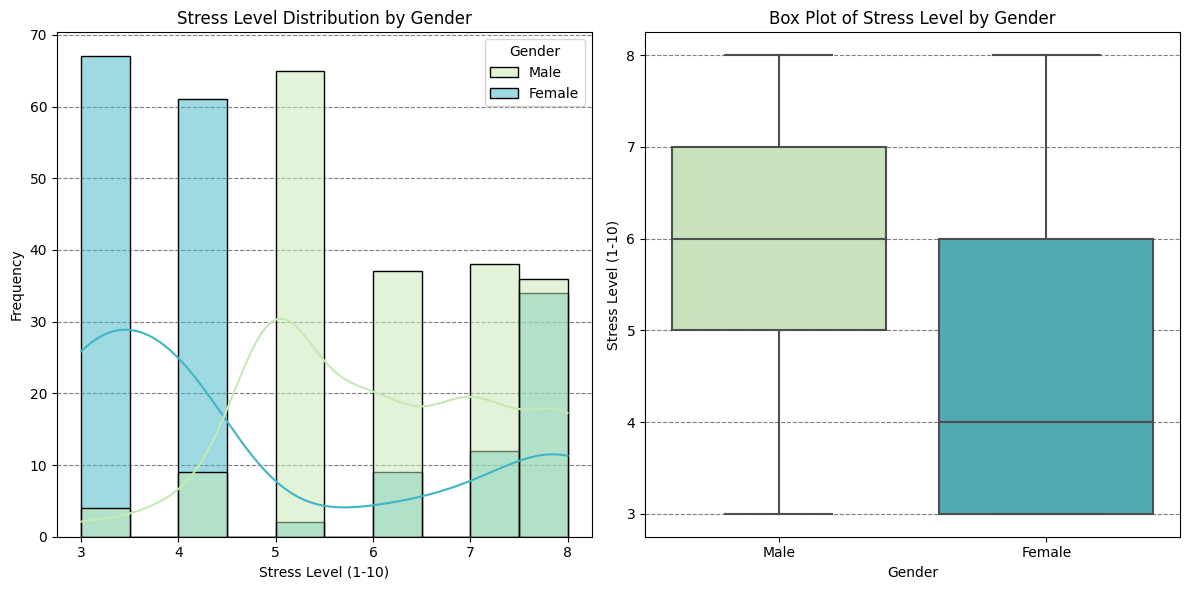

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Stress Level', hue='Gender',
             bins=10, palette=custom_palette,
             ax=axes[0], kde=True)
axes[0].set_title('Stress Level Distribution by Gender')
axes[0].set_xlabel('Stress Level (1-10)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.boxplot(x='Gender', y='Stress Level', data=df,
            palette=custom_palette, ax=axes[1])
axes[1].set_title('Box Plot of Stress Level by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Stress Level (1-10)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

In [40]:
# Calculate and print average stress level by gender
average_stress_level = df.groupby('Gender')['Stress Level'].mean()
print("Average Stress Level by Gender:")
print(average_stress_level)

Average Stress Level by Gender:
Gender
Female    4.675676
Male      6.079365
Name: Stress Level, dtype: float64


**1. Stress Level Distribution:**

* **Histogram:** The histogram shows the distribution of stress levels for both males and females. Both distributions appear to be roughly bell-shaped, but with some key differences. The distribution for females is skewed towards lower stress levels, while the distribution for males is skewed towards higher stress levels. 

* **Box Plot:** The box plot confirms the observation from the histogram. The box for females is located lower on the y-axis compared to the box for males, indicating a lower median stress level for females. The box for males is also wider, suggesting a greater spread or variability in stress levels among males.

**2. Average Stress Levels:**

* The table shows that the average stress level for females is 4.68, while for males it is 6.08. This confirms the visual observation from the histogram and box plot that males report higher average stress levels compared to females.

**The analysis provides strong evidence that,
there are significant differences in stress levels between males and females in this sample. Females report lower average stress levels compared to males. The distribution of stress levels for females is also skewed towards lower levels, while for males it is skewed towards higher levels.**



## Are there significant differences in stress levels between individuals with different sleep disorders?

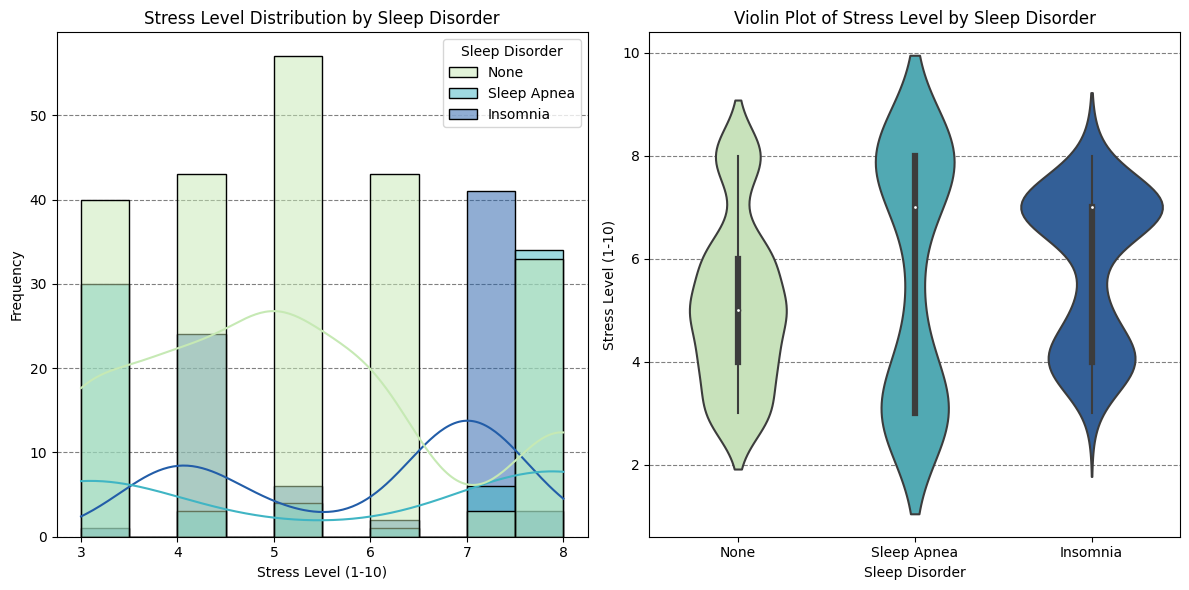

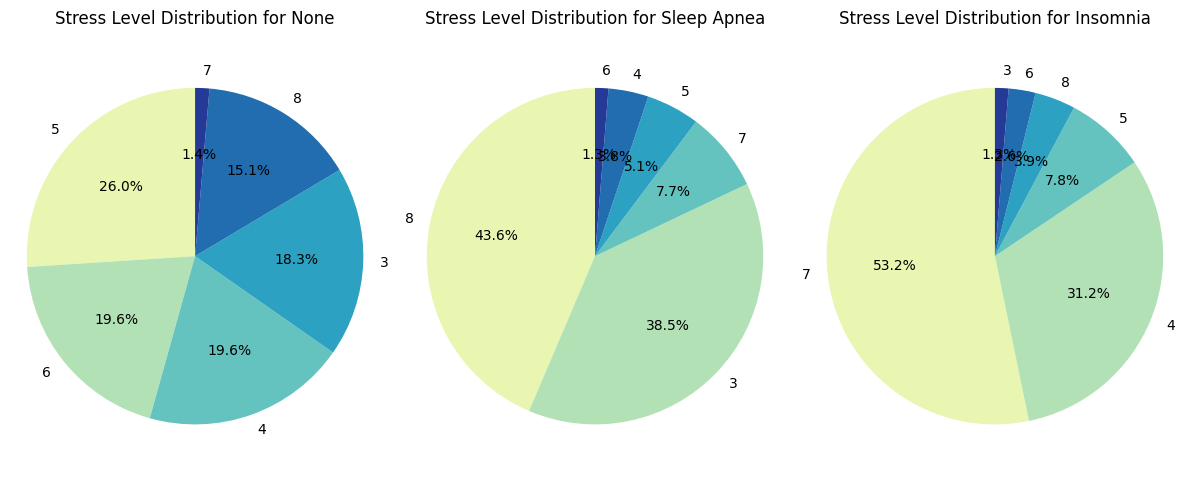

In [41]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Stress Level', hue='Sleep Disorder',
             bins=10, palette=custom_palette,
             ax=axes[0], kde=True)
axes[0].set_title('Stress Level Distribution by Sleep Disorder')
axes[0].set_xlabel('Stress Level (1-10)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.violinplot(x='Sleep Disorder', y='Stress Level',
               data=df, palette=custom_palette,
               ax=axes[1])
axes[1].set_title('Violin Plot of Stress Level by Sleep Disorder')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Stress Level (1-10)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

def plot_stress_pie_chart(ax, df, sleep_disorder):
    filtered_data = df[df['Sleep Disorder'] == sleep_disorder]
    
    stress_counts = filtered_data['Stress Level'].value_counts()
    
    ax.pie(stress_counts, labels=stress_counts.index,
           autopct='%1.1f%%', startangle=90,
           colors=sns.color_palette("YlGnBu", len(stress_counts)))
    ax.set_title(f'Stress Level Distribution for {sleep_disorder}')
    ax.axis('equal')  

unique_disorders = df['Sleep Disorder'].unique()
num_disorders = len(unique_disorders)

fig, axes = plt.subplots(1, num_disorders, figsize=(12, 5))

for ax, disorder in zip(axes, unique_disorders):
    plot_stress_pie_chart(ax, df, disorder)

plt.tight_layout()
plt.show()

**1. Stress Level Distribution by Sleep Disorder:**

* **Histogram:** 
    - Individuals with "None" (no sleep disorder) show a fairly symmetrical distribution of stress levels, with a peak around 4-5 on the stress scale (1-10). 
    - Individuals with "Sleep Apnea" appear to have a slightly higher proportion of higher stress levels. The distribution seems to be skewed towards higher values.
    - Individuals with "Insomnia" show a distribution with a higher proportion of higher stress levels compared to "None" and "Sleep Apnea." The distribution is skewed towards higher values.

* **Violin Plot:** 
    - The violin plot confirms the observations from the histogram. It visually depicts the density of stress levels for each sleep disorder group. 
    - The violin plot for "Sleep Apnea" is wider towards the higher stress level range, indicating a greater spread and potentially higher average stress levels compared to the other groups. 
    - The violin plot for "Insomnia" is the widest towards the higher stress level range, suggesting the highest stress levels among the three groups.

**2. Stress Level Distribution for Each Sleep Disorder:**

* **Pie Charts:** The pie charts provide a breakdown of the distribution of stress levels within each sleep disorder group. 
    - Stress Level Distribution for "None" (No Sleep Disorder):
        * The distribution is relatively even across stress levels 3 to 8.
        * The most frequent stress level reported is 5, accounting for 26% of individuals.
        * Stress levels 4 and 6 are also relatively common, each accounting for around 19.6% of individuals.
    - Stress Level Distribution for "Sleep Apnea":
        * There is a higher proportion of individuals reporting higher stress levels (7 and 8) compared to the "None" group.
        * Stress levels 4, 5 and 6 are less frequent compared to the other sleep disorder groups.
        * The most frequent stress level reported is 8, accounting for 43.6% of individuals.
    - Stress Level Distribution for "Insomnia":
        * The distribution is skewed towards higher stress levels.
        * Stress levels 7 and 4 are the most frequent, accounting for 53.2% and 31.2% of individuals, respectively.
        * Lower stress levels (3, 6, and 8) are less frequent.

**The analysis suggests that,** 
* There are significant differences in stress levels between individuals with different sleep disorders. 
* Individuals with "Insomnia" report the highest average stress levels, followed by those with "Sleep Apnea" and then those with "None" (no sleep disorder).
* Individuals with "Insomnia" exhibit the highest proportion of individuals reporting high stress levels.
* Individuals with "Sleep Apnea" also show a higher prevalence of higher stress levels compared to those with "None" (no sleep disorder).
* Individuals with "None" (no sleep disorder) have a more even distribution of stress levels across the range.


## Are there significant differences in the distribution of stress levels and physical activity levels among individuals with different sleep disorders?

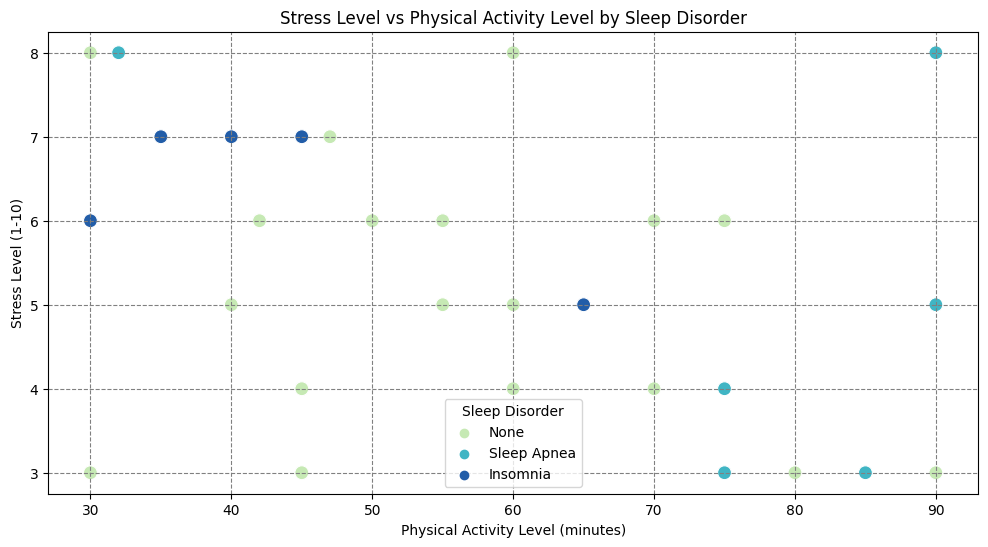

In [42]:
custom_palette = sns.color_palette("YlGnBu", len(df['Sleep Disorder'].unique()))

# Scatter plot for Stress Level vs Physical Activity Level by Sleep Disorder
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Physical Activity Level', y='Stress Level',
                hue='Sleep Disorder', palette=custom_palette,
                s=100)
plt.title('Stress Level vs Physical Activity Level by Sleep Disorder')
plt.xlabel('Physical Activity Level (minutes)')
plt.ylabel('Stress Level (1-10)')
plt.grid(color='gray', linestyle='--')
plt.legend(title='Sleep Disorder')
plt.show()

**1. Stress Level vs. Physical Activity Level by Sleep Disorder:**

* **Overall Trend:** There doesn't appear to be a strong, consistent linear relationship between stress levels and physical activity levels across all sleep disorder groups. 

* **Sleep Disorder Influence:** 
    - Individuals with "None" (no sleep disorder) show a fairly wide range of stress levels across different physical activity levels. 
    - Individuals with "Sleep Apnea" tend to have higher stress levels, especially at lower levels of physical activity.
    - Individuals with "Insomnia" also show a range of stress levels across different physical activity levels. However, there might be a slight trend towards higher stress levels, particularly at lower levels of physical activity. 

**The analysis suggests that,**

* The relationship between stress levels and physical activity levels might be complex and influenced by the type of sleep disorder. 
* Individuals with "Sleep Apnea" tend to have higher stress levels, particularly at lower levels of physical activity.
* Individuals with "Insomnia" might also exhibit higher stress levels, especially at lower levels of physical activity, although the trend is less pronounced than for "Sleep Apnea."



## Are there significant differences in lifestyle factors (e.g., physical activity, stress levels) among different BMI categories?

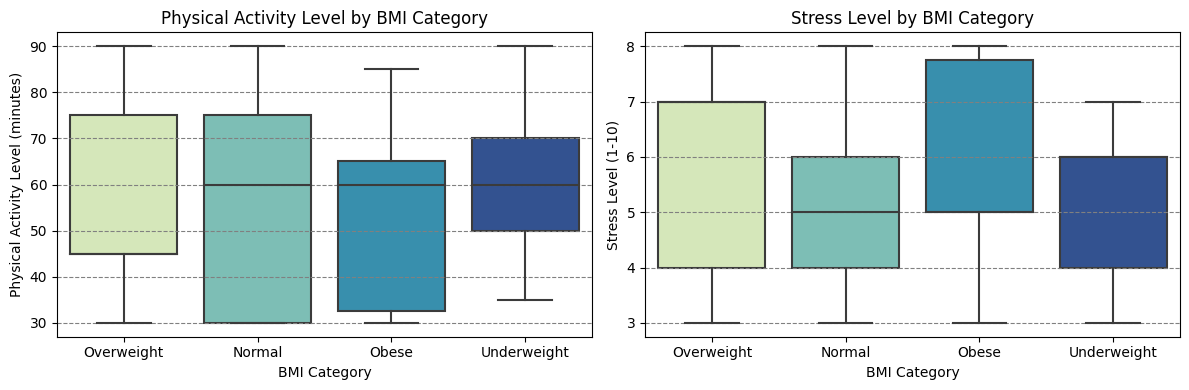

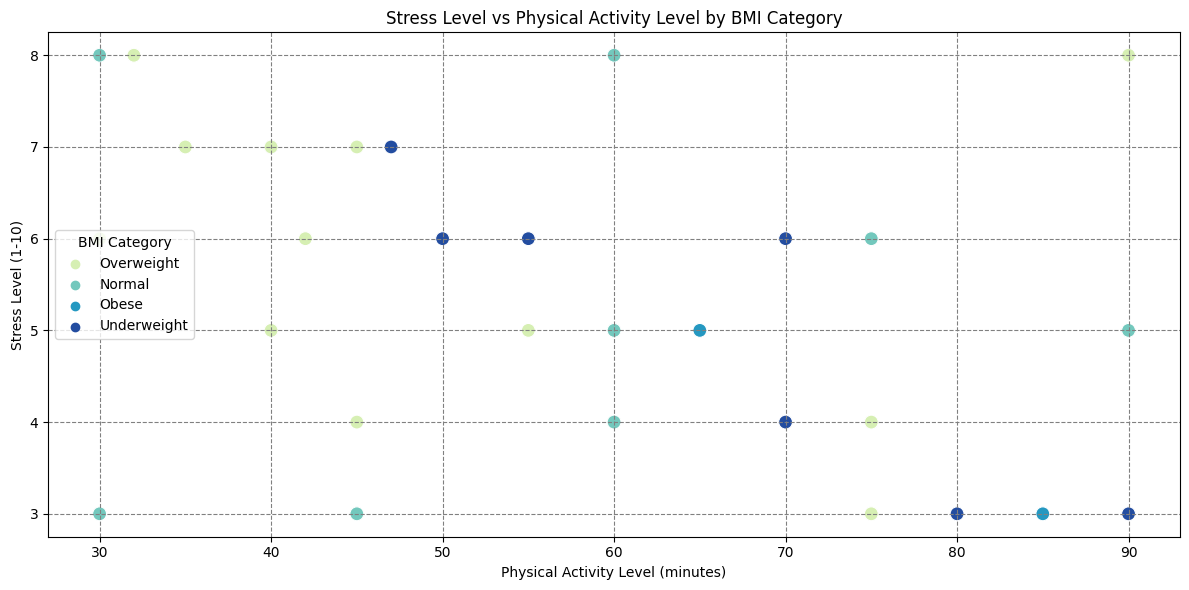

In [43]:
custom_palette = sns.color_palette("YlGnBu", len(df['BMI Category'].unique()))
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(x='BMI Category', y='Physical Activity Level', data=df,
            palette=custom_palette, ax=axes[0])
axes[0].set_title('Physical Activity Level by BMI Category')
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Physical Activity Level (minutes)')
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.boxplot(x='BMI Category', y='Stress Level', data=df,
            palette=custom_palette, ax=axes[1])
axes[1].set_title('Stress Level by BMI Category')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Stress Level (1-10)')
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))

# Scatter plot for Stress Level vs Physical Activity Level colored by BMI Category
sns.scatterplot(data=df, x='Physical Activity Level', y='Stress Level',
                hue='BMI Category', palette=custom_palette,
                s=100)
plt.title('Stress Level vs Physical Activity Level by BMI Category')
plt.xlabel('Physical Activity Level (minutes)')
plt.ylabel('Stress Level (1-10)')
plt.grid(color='gray', linestyle='--')
plt.legend(title='BMI Category')
plt.tight_layout()
plt.show()

**1. Physical Activity Level by BMI Category:**

* **Box Plot:** The box plot shows that individuals in the "Obese" category tend to have lower levels of physical activity compared to those in the "Normal" and "Overweight" categories. The median physical activity level for the "Obese" group is lower, and the overall range of activity levels appears narrower.

**2. Stress Level by BMI Category:**

* **Box Plot:** The box plot shows that individuals in the "Obese" category tend to have higher stress levels compared to those in the "Normal" and "Overweight" categories. The median stress level for the "Obese" group is higher, and the overall range of stress levels appears wider.

**3. Stress Level vs. Physical Activity Level by BMI Category:**

* **Scatter Plot:** 
    - There isn't a clear linear relationship between stress level and physical activity level for any of the BMI categories. 
    - However, within the "Obese" category, there might be a trend towards higher stress levels with lower levels of physical activity. 

**The analysis suggests that,** 
* There are some differences in lifestyle factors among different BMI categories. 
* Individuals in the "Obese" category tend to have lower levels of physical activity and higher stress levels compared to those in the "Normal" and "Overweight" categories.



## What is the average daily step count for individuals in the sample?

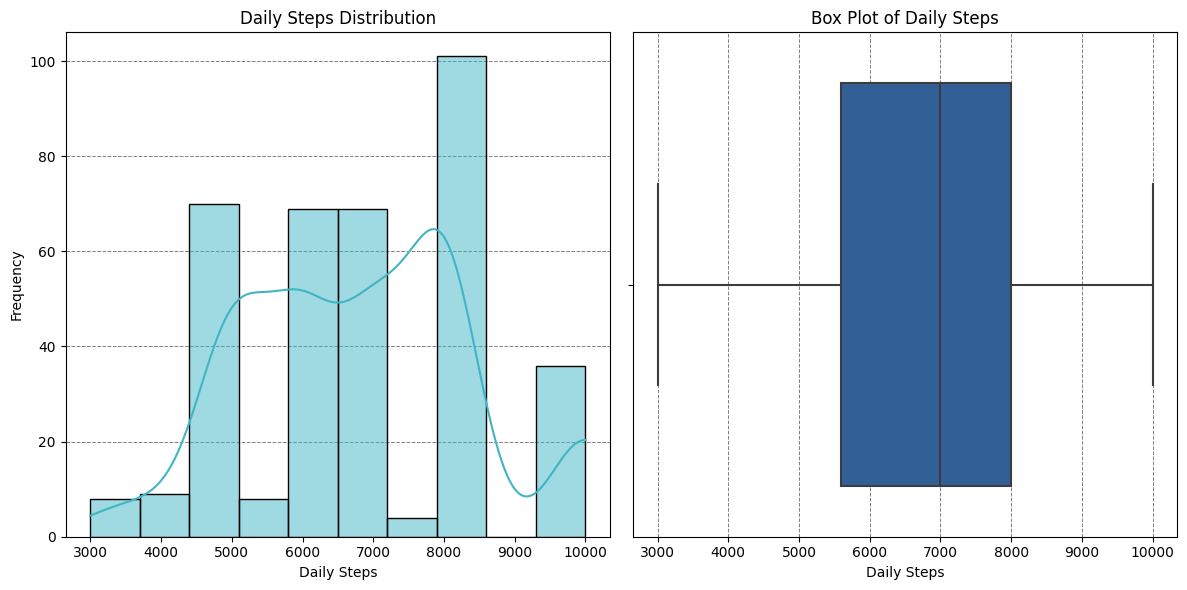

In [44]:
custom_palette = sns.color_palette("YlGnBu", 3)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Daily Steps'], bins=10, kde=True,
             color=custom_palette[1], ax=axes[0])
axes[0].set_title('Daily Steps Distribution')
axes[0].set_xlabel('Daily Steps')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Daily Steps'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Daily Steps')
axes[1].set_xlabel('Daily Steps')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

In [45]:
# Calculate and print average Daily Steps
average_daily_steps = df['Daily Steps'].mean()
print("Average Daily Steps:")
print(average_daily_steps)

Average Daily Steps:
6816.844919786096


* **Distribution of Daily Steps:**
    - The histogram shows the distribution of daily steps taken by individuals in the sample. The distribution appears to be roughly bell-shaped with a peak around 6,000-7,000 steps. This suggests that a majority of individuals in the sample take between 6,000 and 7,000 steps per day.

* **Box Plot:** 
    - The box plot provides a visual summary of the distribution. The box represents the interquartile range (IQR), which contains 50% of the data. 
    - The median daily step count appears to be around 7,000 steps, which aligns with the peak of the histogram.

* **Average Daily Steps:** 
    - The provided value confirms the visual observation. The average daily step count is 6,816.84 steps, indicating that individuals in the sample, on average, take around 6,800 steps per day. 

**In summary, based on the histogram, box plot, and the average daily step count, individuals in the sample population, on average, take around 6,800 steps per day, with the majority of individuals falling within the range of 6,000 to 7,000 steps.**



## How the distribution of daily steps varies across different genders?

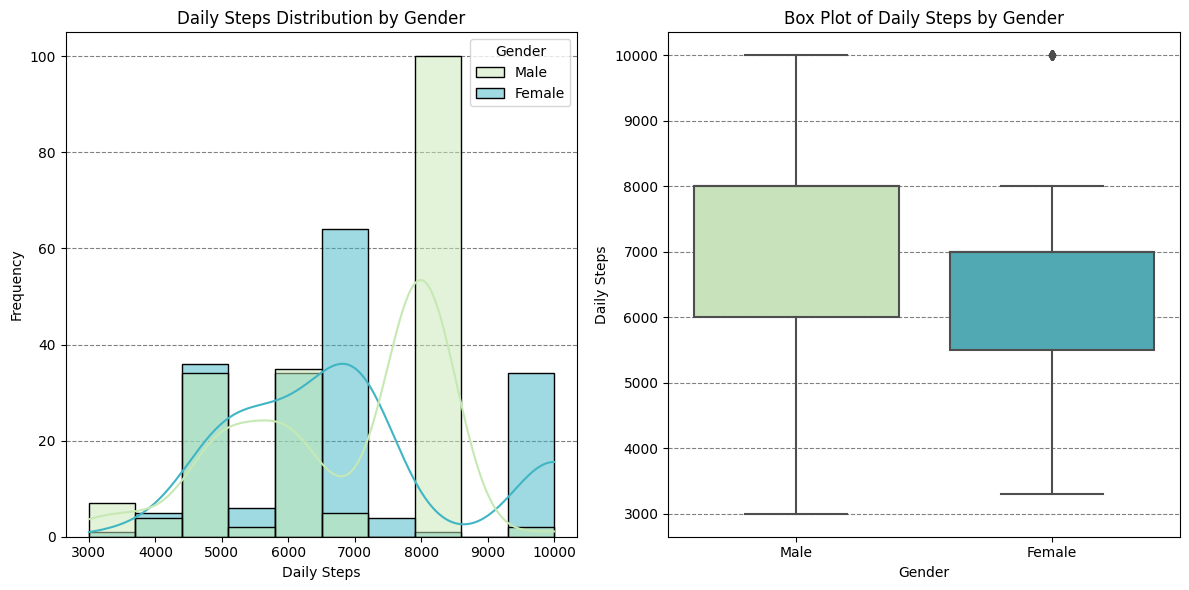

In [46]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Daily Steps', hue='Gender',
             bins=10, palette=custom_palette,
             ax=axes[0], kde=True)
axes[0].set_title('Daily Steps Distribution by Gender')
axes[0].set_xlabel('Daily Steps')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.boxplot(x='Gender', y='Daily Steps', data=df,
            palette=custom_palette, ax=axes[1])
axes[1].set_title('Box Plot of Daily Steps by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Daily Steps')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

* **Distribution of Daily Steps by Gender:** 
    - The histogram shows the distribution of daily steps for both males and females. 
    - Both distributions appear to be roughly bell-shaped, with a peak around 6,000-7,000 steps for both genders.
    - There seems to be a slight shift in the distribution for males towards higher step counts compared to females. 

* **Box Plot:** 
    - The box plot confirms the observation from the histogram. It visually depicts the density of daily steps for each gender. 
    - The box plot for males is slightly shifted towards higher step counts compared to females, indicating a potentially higher median daily step count for males.

**The analysis suggests that,** 
* There might be subtle differences in the distribution of daily steps between males and females. 
* Males appear to have a slightly higher average daily step count and a slightly greater proportion of individuals taking higher numbers of steps compared to females.



## How daily steps differ among individuals with different sleep disorders?

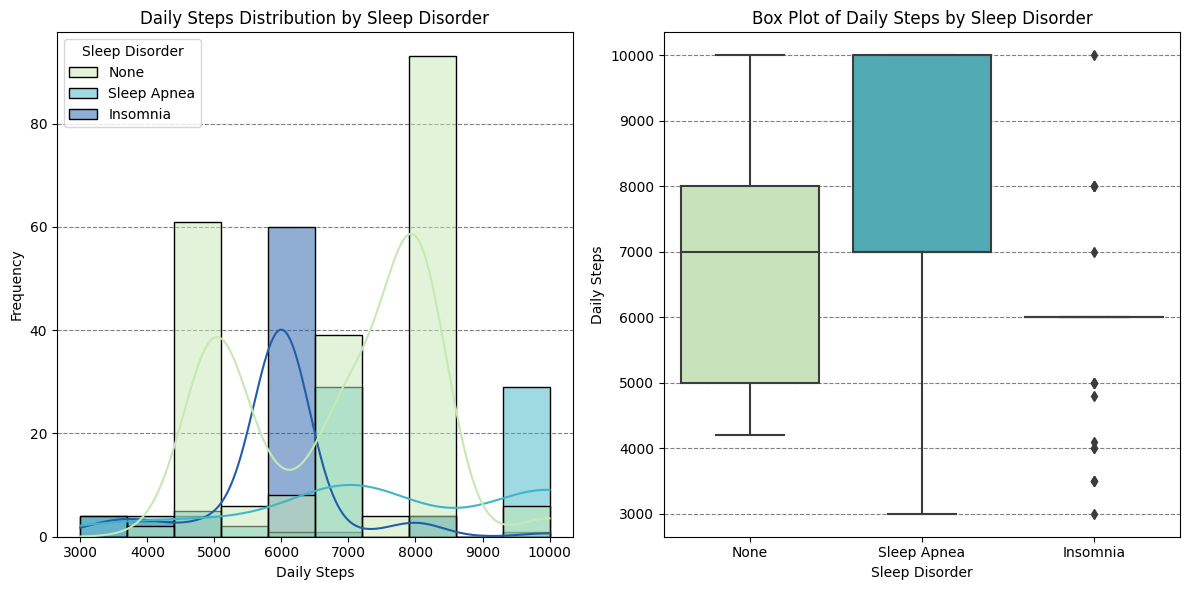

In [47]:
custom_palette = sns.color_palette("YlGnBu", len(df['Sleep Disorder'].unique()))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(data=df, x='Daily Steps', hue='Sleep Disorder',
             bins=10, palette=custom_palette,
             ax=axes[0], kde=True)
axes[0].set_title('Daily Steps Distribution by Sleep Disorder')
axes[0].set_xlabel('Daily Steps')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.boxplot(x='Sleep Disorder', y='Daily Steps', data=df,
            palette=custom_palette, ax=axes[1])
axes[1].set_title('Box Plot of Daily Steps by Sleep Disorder')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Daily Steps')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

* **Distribution of Daily Steps by Sleep Disorder:** 
    - The histogram shows the distribution of daily steps for individuals with different sleep disorders. 
    - Individuals with "None" (no sleep disorder) show a fairly symmetrical distribution of daily steps, with a peak around 6,000-7,000 steps.
    - Individuals with "Sleep Apnea" appear to have a slightly lower proportion of higher daily step counts. The distribution seems to be skewed towards lower values.
    - Individuals with "Insomnia" show a distribution with a slightly higher proportion of higher daily step counts. The distribution seems to be skewed towards higher values.

* **Box Plot:** 
    - The box plot confirms the observations from the histogram. It visually depicts the density of daily steps for each sleep disorder group. 
    - The box plot for "Sleep Apnea" is shifted slightly towards lower daily step counts compared to the other groups, indicating a potentially lower median daily step count for individuals with Sleep Apnea.
    - The box plot for "Insomnia" is slightly shifted towards higher daily step counts compared to the other groups, suggesting a potentially higher median daily step count for individuals with Insomnia.

**The analysis suggests that,** 
* There might be subtle differences in daily step counts among individuals with different sleep disorders. 
* Individuals with "Sleep Apnea" appear to have lower daily step counts compared to those with "None" or "Insomnia."
* Individuals with "Insomnia" appear to have higher daily step counts compared to those with "None" or "Sleep Apnea."



## How does the distribution of daily steps vary across different BMI categories?

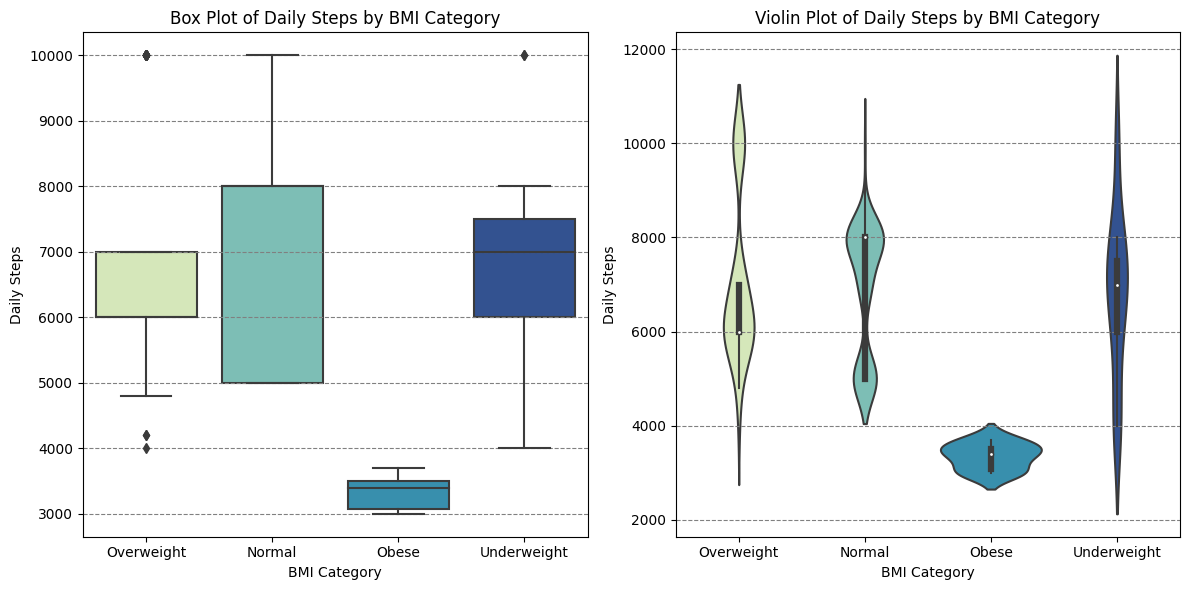

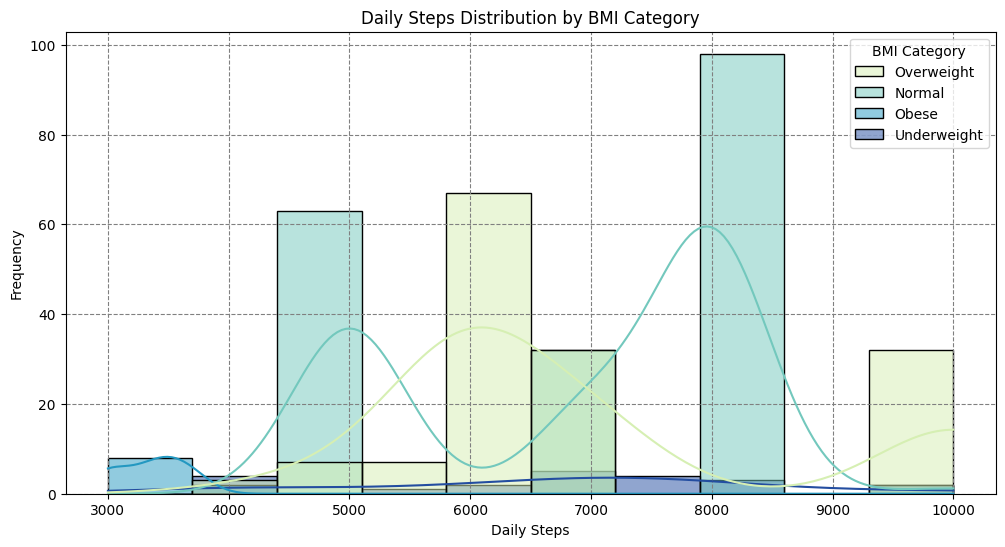

In [48]:
custom_palette = sns.color_palette("YlGnBu", len(df['BMI Category'].unique()))
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='BMI Category', y='Daily Steps', data=df,
            palette=custom_palette, ax=axes[0])
axes[0].set_title('Box Plot of Daily Steps by BMI Category')
axes[0].set_xlabel('BMI Category')
axes[0].set_ylabel('Daily Steps')
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.violinplot(x='BMI Category', y='Daily Steps', data=df,
            palette=custom_palette, ax=axes[1])
axes[1].set_title('Violin Plot of Daily Steps by BMI Category')
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Daily Steps')
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Daily Steps', hue='BMI Category',
             bins=10, kde=True, palette=custom_palette)
plt.title('Daily Steps Distribution by BMI Category')
plt.xlabel('Daily Steps')
plt.ylabel('Frequency')
plt.grid(color='gray', linestyle='--')
plt.show()

* **Box Plot:**
    - Individuals in the "Normal" BMI category tend to have the highest median daily step count.
    - Individuals in the "Overweight" category have a slightly lower median daily step count compared to the "Normal" category.
    - Individuals in the "Obese" category have the lowest median daily step count.
    - Individuals in the "Underweight" category show a wide range of daily step counts, with some individuals taking very high numbers of steps.

* **Violin Plot:**
    - The violin plot confirms the observations from the box plot. It visually depicts the density of daily steps for each BMI category.
    - The violin plot for the "Normal" category is wider and taller, indicating a greater spread and potentially higher average daily step counts compared to the other categories.
    - The violin plot for the "Obese" category is narrower and shorter, indicating a lower spread and potentially lower average daily step counts.
    - The violin plot for the "Underweight" category is wider, indicating a greater spread of daily step counts, with some individuals taking significantly higher numbers of steps.

**The analysis suggests that,** 
* Individuals in the "Normal" BMI category tend to have the highest daily step counts.
* Individuals in the "Obese" category tend to have the lowest daily step counts.
* Individuals in the "Overweight" category have intermediate daily step counts.
* Individuals in the "Underweight" category show a wide range of daily step counts, with some individuals taking significantly higher numbers of steps.



## Are there differences in daily step counts between males and females within each BMI category?

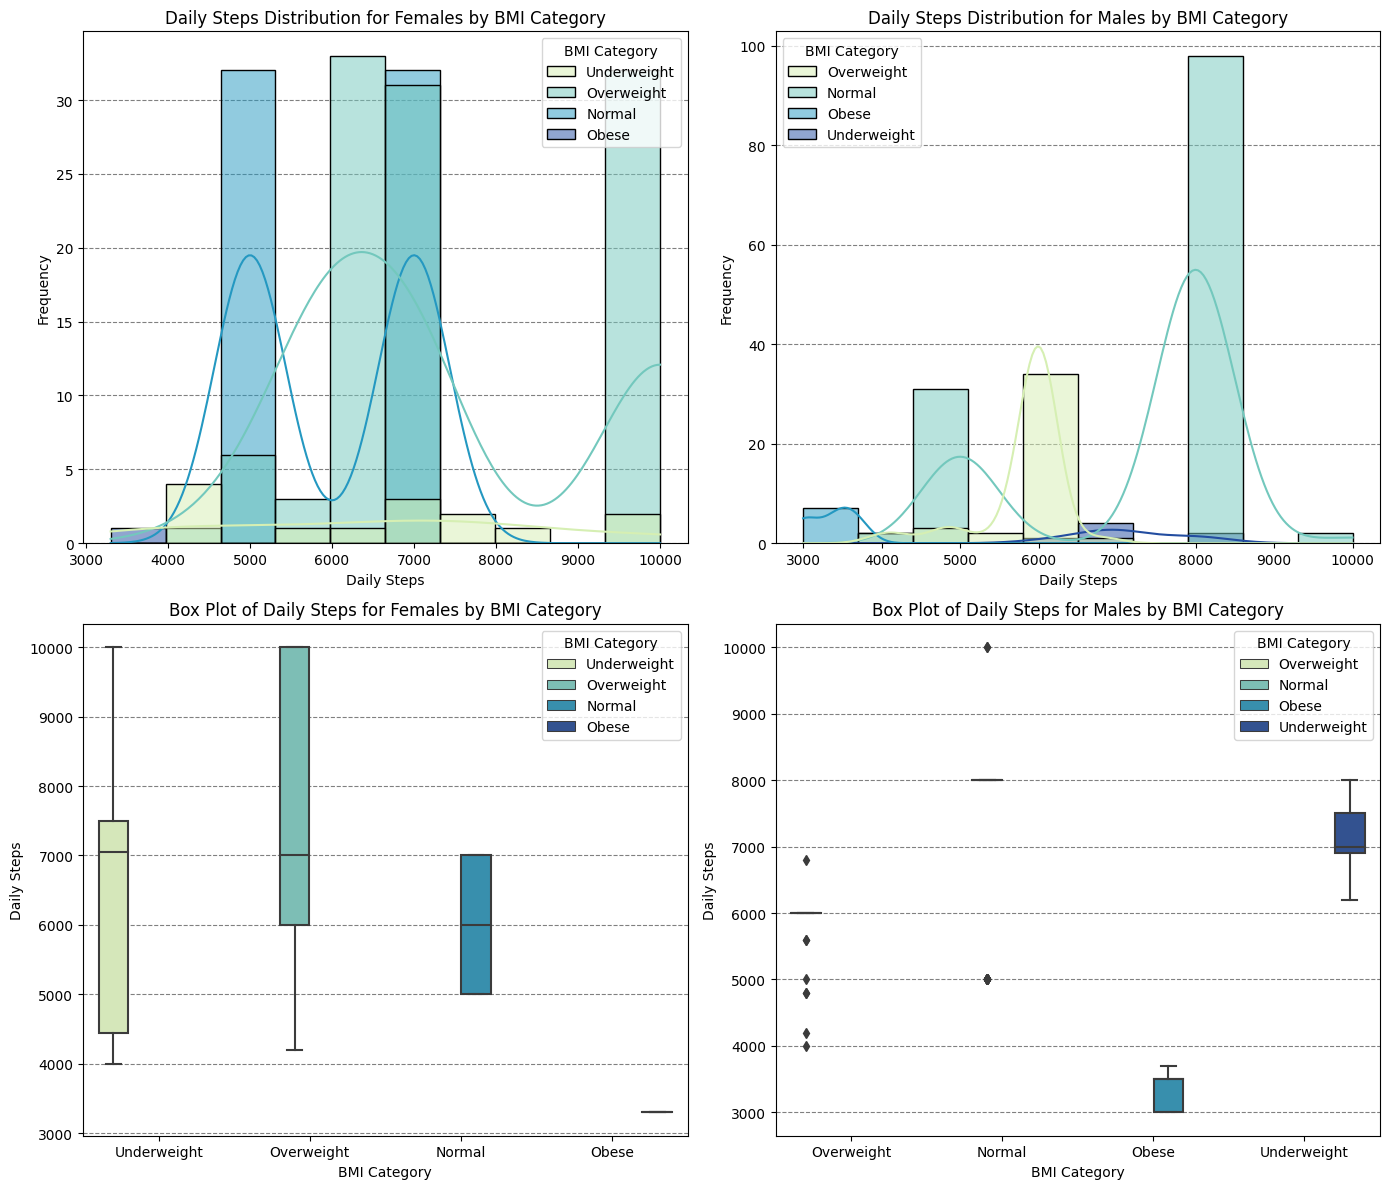

In [49]:
# Filter data to include females and male
df_female = df[df['Gender'] == 'Female']
df_male = df[df['Gender'] == 'Male']

custom_palette = sns.color_palette("YlGnBu", len(df['BMI Category'].unique()))

fig, axes = plt.subplots(2, 2, figsize=(14, 12))

sns.histplot(data=df_female, x='Daily Steps', hue='BMI Category',
             bins=10, kde=True, palette=custom_palette, ax=axes[0,0])
axes[0,0].set_title('Daily Steps Distribution for Females by BMI Category')
axes[0,0].set_xlabel('Daily Steps')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_axisbelow(True)
axes[0,0].grid(axis='y', color='gray', linestyle='--')

sns.histplot(data=df_male, x='Daily Steps', hue='BMI Category',
             bins=10, kde=True, palette=custom_palette, ax=axes[0,1])
axes[0,1].set_title('Daily Steps Distribution for Males by BMI Category')
axes[0,1].set_xlabel('Daily Steps')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_axisbelow(True)
axes[0,1].grid(axis='y', color='gray', linestyle='--')

sns.boxplot(x='BMI Category', y='Daily Steps', hue='BMI Category', data=df_female,
            palette=custom_palette, ax=axes[1,0])
axes[1,0].set_title('Box Plot of Daily Steps for Females by BMI Category')
axes[1,0].set_xlabel('BMI Category')
axes[1,0].set_ylabel('Daily Steps')
axes[1,0].set_axisbelow(True)
axes[1,0].grid(axis='y', color='gray', linestyle='--')

sns.boxplot(x='BMI Category', y='Daily Steps', hue='BMI Category', data=df_male,
            palette=custom_palette, ax=axes[1,1])
axes[1,1].set_title('Box Plot of Daily Steps for Males by BMI Category')
axes[1,1].set_xlabel('BMI Category')
axes[1,1].set_ylabel('Daily Steps')
axes[1,1].set_axisbelow(True)
axes[1,1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

**1. Daily Steps Distribution by Gender and BMI Category:**

**Histograms:**

* **Normal BMI:** Both males and females in the "Normal" BMI category show a similar distribution of daily steps, with a peak around 6,000-7,000 steps. 
* **Overweight BMI:** Males in the "Overweight" BMI category seem to have a slightly higher proportion of individuals with higher daily step counts compared to females. 
* **Obese BMI:** Both males and females in the "Obese" BMI category show a distribution skewed towards lower daily step counts. However, males in this category appear to have a slightly higher proportion of individuals with higher daily step counts compared to females. 
* **Underweight BMI:**  The distribution for females in the "Underweight" BMI category is more spread out, with a wider range of daily step counts compared to males.

**Box Plots:**

* **Normal BMI:** The box plots for both males and females in the "Normal" BMI category show a similar median and spread of daily step counts.
* **Overweight BMI:** The box plot for males in the "Overweight" BMI category is slightly shifted towards higher daily step counts compared to females.
* **Obese BMI:** The box plot for males in the "Obese" BMI category is slightly shifted towards higher daily step counts compared to females.
* **Underweight BMI:** The box plot for females in the "Underweight" BMI category shows a wider range of daily step counts compared to males.

**In summary:**

* **Normal BMI:**  The distribution of daily steps is similar for both males and females.
* **Overweight BMI:** Males tend to have slightly higher daily step counts compared to females.
* **Obese BMI:** Males tend to have slightly higher daily step counts compared to females.
* **Underweight BMI:** Females show a wider range of daily step counts compared to males, with some females achieving very high step counts.


# Sleep-Related Factors

## What is the average sleep duration across all individuals in the sample?


The average sleep duration is: 
7.13 hours



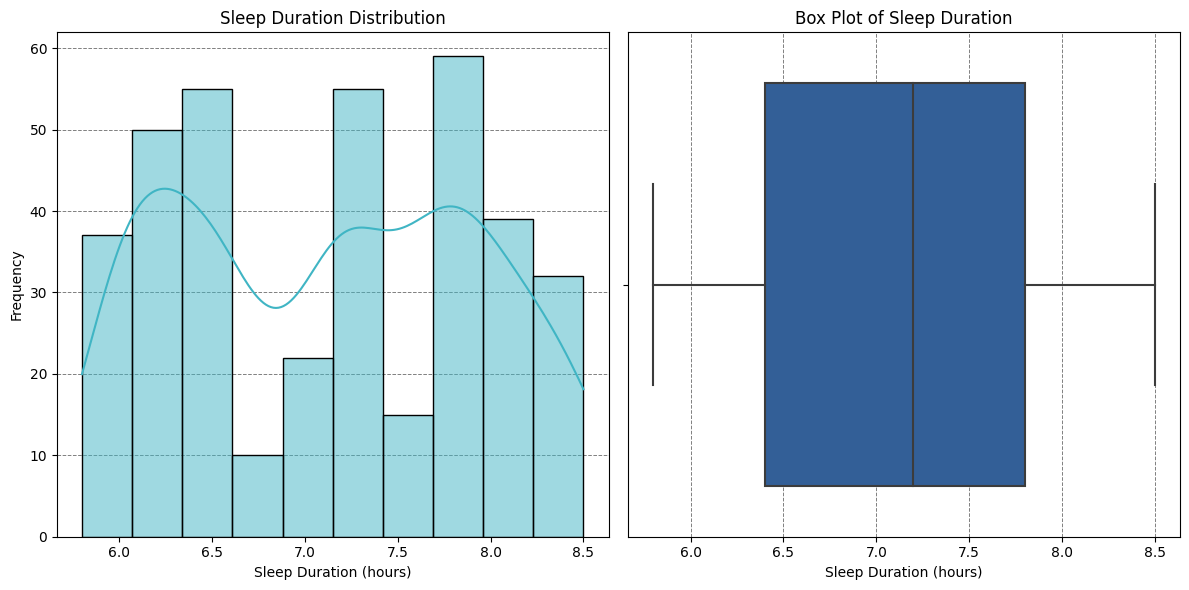

In [50]:
# Calculate the average sleep duration
average_sleep_duration = df['Sleep Duration'].mean()
print(f"\nThe average sleep duration is: \n{average_sleep_duration:.2f} hours\n")

custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Sleep Duration'], bins=10, kde=True,
             color=custom_palette[1], ax=axes[0])
axes[0].set_title('Sleep Duration Distribution')
axes[0].set_xlabel('Sleep Duration (hours)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Sleep Duration'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Sleep Duration')
axes[1].set_xlabel('Sleep Duration (hours)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* **Distribution of Sleep Duration:**
    - The histogram shows the distribution of sleep duration in the sample. The distribution appears to be roughly bell-shaped with a peak around 7-7.5 hours. This suggests that a majority of individuals in the sample sleep between 7 and 7.5 hours per night.

* **Box Plot:** 
    - The box plot provides a visual summary of the distribution. The box represents the interquartile range (IQR), which contains 50% of the data. 
    - The median sleep duration appears to be around 7-7.5 hours, which aligns with the peak of the histogram.

* **Average Sleep Duration:** 
    - The average sleep duration is 7.13 hours, indicating that individuals in the sample, on average, sleep around 7.13 hours. 

**In summary, based on the histogram, box plot, and the average sleep duration, individuals in the sample population sleep, on average, around 7.13 hours per night, with a majority sleeping between 7 and 7.5 hours.**

## How does sleep duration relate to age for both males and females?

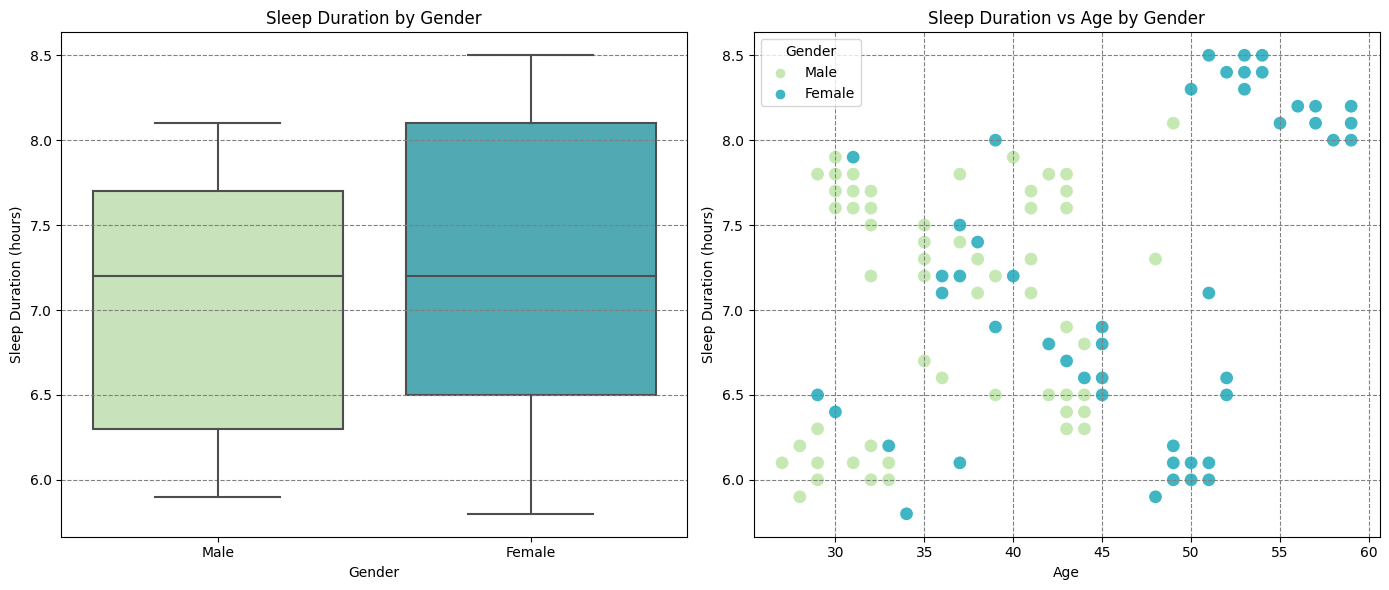

In [51]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Gender', y='Sleep Duration', data=df,
            palette=custom_palette, ax=axes[0])
axes[0].set_title('Sleep Duration by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Sleep Duration (hours)')
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.scatterplot(x='Age', y='Sleep Duration', hue='Gender', data=df,
                palette=custom_palette, s=100, ax=axes[1])
axes[1].set_title('Sleep Duration vs Age by Gender')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Sleep Duration (hours)')
axes[1].grid(color='gray', linestyle='--')


plt.tight_layout()
plt.show()

**1. Sleep Duration by Gender:**

* **Box Plot:** 
    - The box plot shows that the median sleep duration for males is slightly lower compared to females. 
    - The interquartile range (IQR) for males appears slightly wider, indicating a greater variability in sleep duration among males.

**2. Sleep Duration vs. Age by Gender:**

* **Scatter Plot:** 
    - **General Trend:** There doesn't appear to be a strong, consistent linear relationship between age and sleep duration for either males or females. 
    - **Age and Sleep Duration:** 
        - For both males and females, there's a slight suggestion that sleep duration might decrease slightly with increasing age, but the trend is not very pronounced. 
    - **Gender Differences:** 
        - At younger ages, there seems to be a wider range of sleep durations for both males and females.
        - As age increases, the range of sleep durations seems to narrow slightly for both genders.

**In summary:**

* The analysis suggests that there might be subtle differences in sleep duration between males and females. Males tend to have a slightly lower median sleep duration compared to females.
* The relationship between age and sleep duration is not very strong for either gender. There might be a slight tendency for sleep duration to decrease slightly with increasing age, but this trend is not very pronounced.



## Do individuals with certain sleep disorders tend to have consistently shorter or longer sleep durations compared to those with no reported disorder, regardless of age?

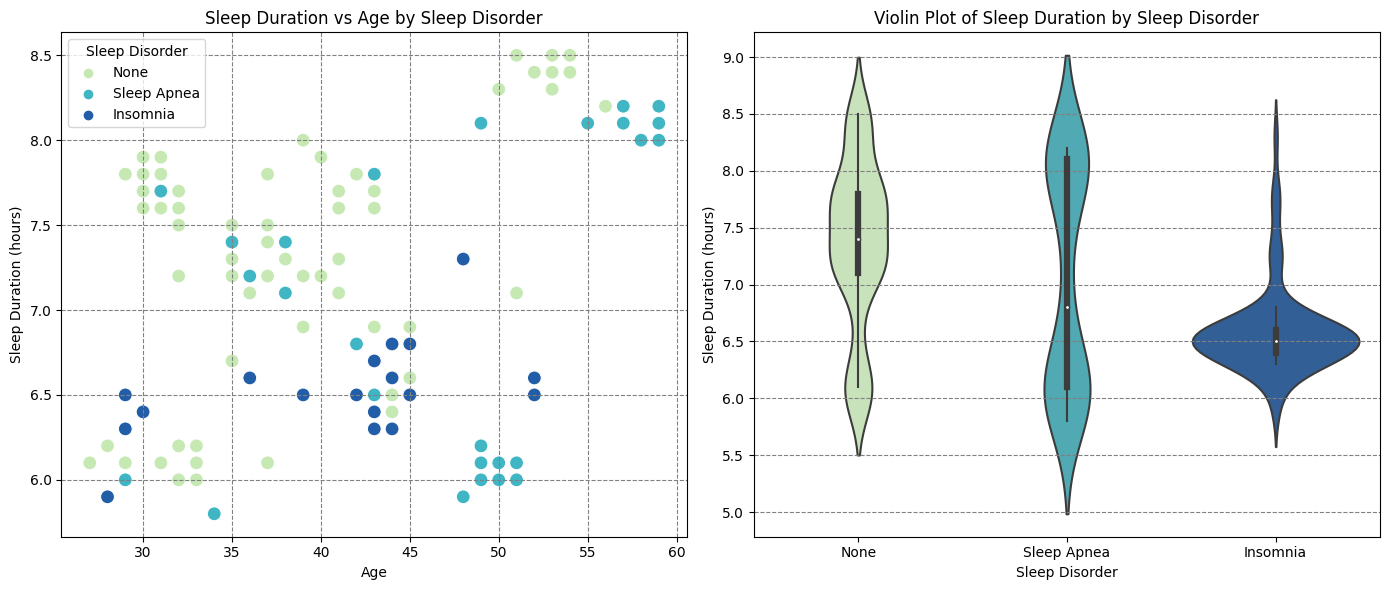

In [52]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='Age', y='Sleep Duration', hue='Sleep Disorder', data=df,
                palette=custom_palette, s=100, ax=axes[0])
axes[0].set_title('Sleep Duration vs Age by Sleep Disorder')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Sleep Duration (hours)')
axes[0].grid(color='gray', linestyle='--')

sns.violinplot(x='Sleep Disorder', y='Sleep Duration', data=df,
              palette=custom_palette, ax=axes[1])
axes[1].set_title('Violin Plot of Sleep Duration by Sleep Disorder')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Sleep Duration (hours)')
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()


* **Scatter Plot of Sleep Duration vs. Age by Sleep Disorder:** 
    - **Sleep Apnea:** Individuals with Sleep Apnea generally have lower sleep durations compared to those with "None" or "Insomnia" across the age range. There's a cluster of points at lower sleep durations for the Sleep Apnea group.
    - **Insomnia:** Individuals with Insomnia show a wider range of sleep durations, with some individuals having very low sleep durations. However, there's no clear trend of consistently shorter or longer sleep durations across the age range compared to the "None" group.

* **Violin Plot of Sleep Duration by Sleep Disorder:**
    - The violin plot confirms the observations from the scatter plot. 
    - The violin plot for "Sleep Apnea" is shifted towards lower sleep durations compared to the other groups. 
    - The violin plot for "Insomnia" is wider, indicating a greater variability in sleep durations.

**In summary:**

* The analysis suggests that individuals with Sleep Apnea tend to have consistently shorter sleep durations compared to those with "None" or "Insomnia" across the age range. 
* Individuals with Insomnia show a wider range of sleep durations, with some individuals having very low sleep durations.


## How is the distribution of sleep quality across the sample population?


The average quality of sleep is: 
7.31



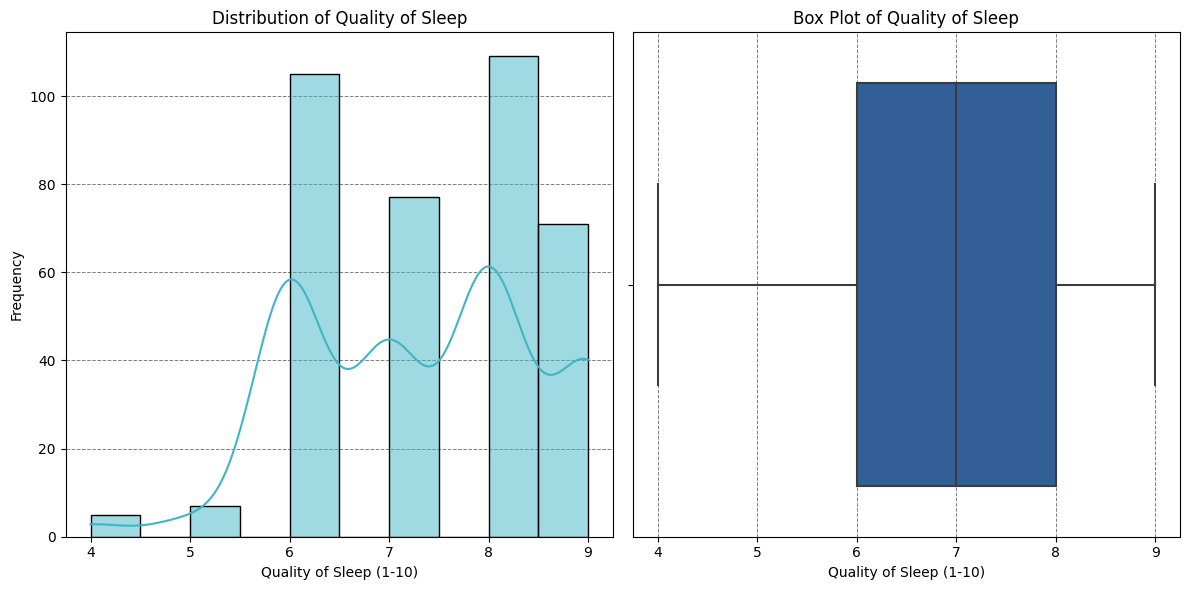

In [53]:
# Calculate the average quality of sleep
average_quality_of_sleep = df['Quality of Sleep'].mean()
print(f"\nThe average quality of sleep is: \n{average_quality_of_sleep:.2f}\n")

custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.histplot(df['Quality of Sleep'], bins=10, kde=True,
             color=custom_palette[1], ax=axes[0])
axes[0].set_title('Distribution of Quality of Sleep')
axes[0].set_xlabel('Quality of Sleep (1-10)')
axes[0].set_ylabel('Frequency')
axes[0].set_axisbelow(True)
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)

sns.boxplot(x=df['Quality of Sleep'], color=custom_palette[2], ax=axes[1])
axes[1].set_title('Box Plot of Quality of Sleep')
axes[1].set_xlabel('Quality of Sleep (1-10)')
axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

* **Distribution of Quality of Sleep:**
    - The histogram shows the distribution of self-reported sleep quality scores in the sample population. The distribution appears to be roughly bell-shaped with a peak around 7-8 on a scale of 1-10. This suggests that a majority of individuals in the sample report moderate to good sleep quality.

* **Box Plot:** 
    - The box plot provides a visual summary of the distribution. The box represents the interquartile range (IQR), which contains 50% of the data. 
    - The median sleep quality score appears to be around 7-8 on the scale, which aligns with the peak of the histogram.

* **Average Quality of Sleep:** 
    - The average quality of sleep is 7.31, indicating that individuals in the sample, on average, report a moderate to good quality of sleep.

**In summary, based on the histogram, box plot, and the average quality of sleep, individuals in the sample population report a generally moderate to good quality of sleep, with the majority of individuals scoring between 7 and 8 on a scale of 1-10.**


## Are there significant differences in sleep quality between males and females at different ages?

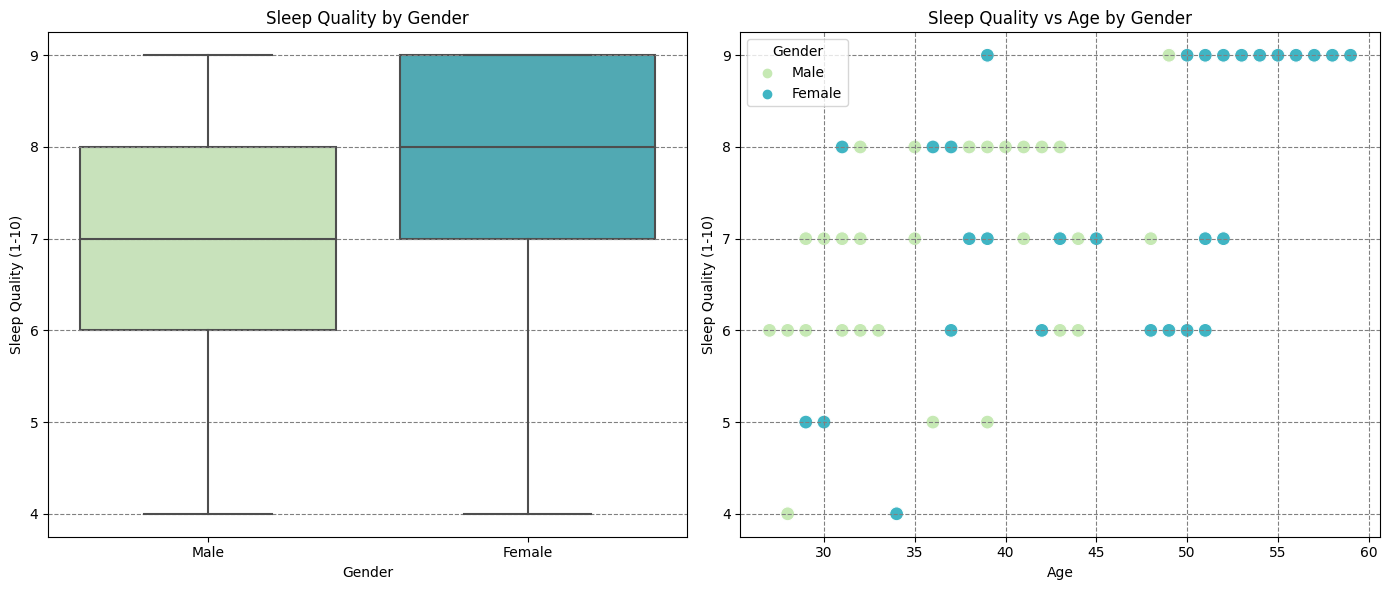

In [54]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Gender', y='Quality of Sleep', data=df,
            palette=custom_palette, ax=axes[0])
axes[0].set_title('Sleep Quality by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Sleep Quality (1-10)')
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.scatterplot(x='Age', y='Quality of Sleep', hue='Gender', data=df,
                palette=custom_palette, s=100, ax=axes[1])
axes[1].set_title('Sleep Quality vs Age by Gender')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Sleep Quality (1-10)')
axes[1].grid(color='gray', linestyle='--')

plt.tight_layout()
plt.show()

**1. Sleep Quality by Gender:**

* **Box Plot:** 
    - The box plot shows that the median sleep quality for females is slightly higher than for males. 
    - The interquartile range (IQR) for females appears slightly wider, indicating a greater variability in sleep quality among females.

**2. Sleep Quality vs. Age by Gender:**

* **Scatter Plot:** 
    - **Age and Sleep Quality:** 
        - For both males and females, there doesn't appear to be a clear, consistent relationship between age and sleep quality. 
        - There is some variability in sleep quality across different ages, but no clear trend of improvement or decline is evident. 
    - **Gender Differences:** 
        - At most ages, both males and females show a range of sleep quality scores. 
        - While there might be slight variations in the distribution of scores at certain ages, there is no consistent pattern of one gender consistently reporting higher or lower sleep quality across the age range.

**In summary:**

* The analysis suggests that there might be subtle differences in sleep quality between males and females. Females tend to report slightly higher sleep quality compared to males.
* The relationship between age and sleep quality is not very strong for either gender. There is no clear evidence to suggest that sleep quality consistently improves or declines with age.


## Are there any specific age ranges where sleep quality decreases more sharply for individuals with specific sleep disorders compared to those without any disorders?

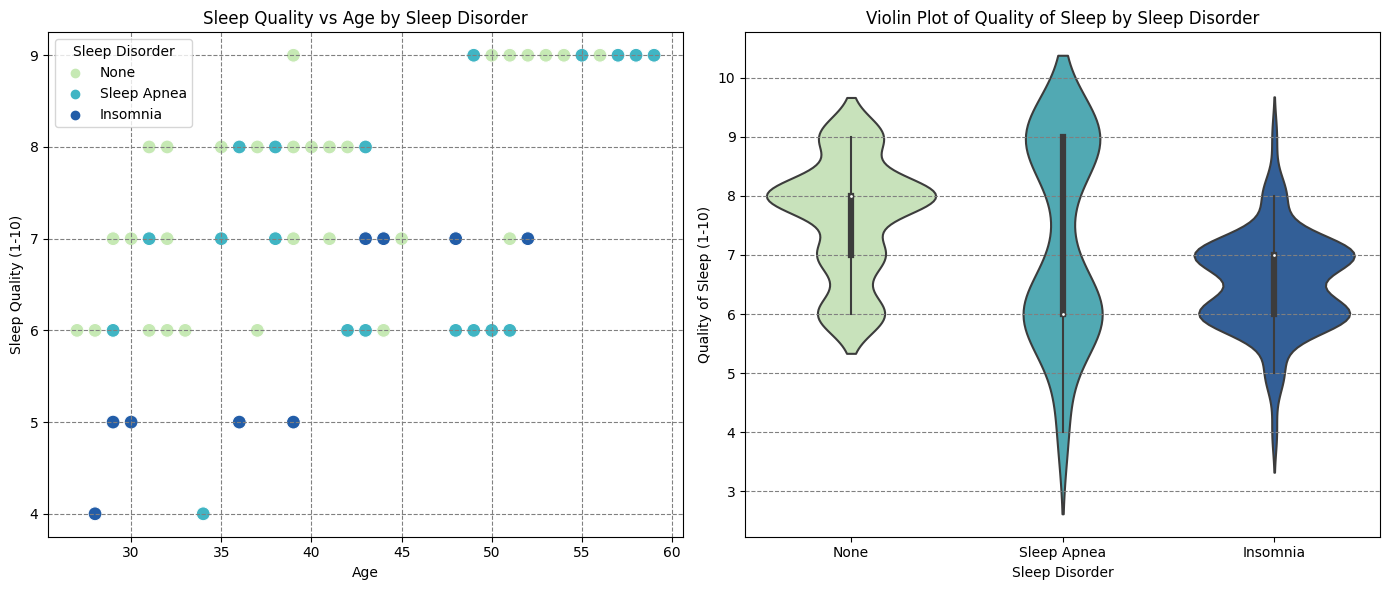

In [55]:
custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x='Age', y='Quality of Sleep', hue='Sleep Disorder', data=df,
                palette=custom_palette, s=100, ax=axes[0])
axes[0].set_title('Sleep Quality vs Age by Sleep Disorder')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Sleep Quality (1-10)')
axes[0].grid(color='gray', linestyle='--')

sns.violinplot(x='Sleep Disorder', y='Quality of Sleep', data=df,
              palette=custom_palette, ax=axes[1])
axes[1].set_title('Violin Plot of Quality of Sleep by Sleep Disorder')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Quality of Sleep (1-10)')
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()


* **Scatter Plot of Sleep Quality vs. Age by Sleep Disorder:**

   - **Sleep Apnea:**  There seems to be a slight downward trend in sleep quality with increasing age for individuals with Sleep Apnea. This suggests that sleep quality might decline more rapidly with age in this group. 
   - **Insomnia:**  The data points for individuals with Insomnia are scattered across the age range, making it difficult to discern a clear trend in sleep quality with increasing age. There doesn't appear to be a consistent pattern of decline.
   - **No Sleep Disorder:**  The data points for individuals with no reported sleep disorder are also scattered across the age range with no clear trend in sleep quality decline with age. 

* **Violin Plot of Quality of Sleep by Sleep Disorder:**

   - The violin plot for "Sleep Apnea" is slightly shifted towards lower sleep quality scores, suggesting a lower average sleep quality compared to the other groups.
   - The violin plot for "Insomnia" is wider, indicating a greater variability in sleep quality scores among individuals with Insomnia.

**In summary:**

* The analysis suggests that there might be a slight tendency for sleep quality to decline more rapidly with age for individuals with Sleep Apnea compared to those with no reported sleep disorder or Insomnia. 
* For individuals with Insomnia, the relationship between age and sleep quality is less clear.


## How do quality of sleep ratings differ among individuals with different sleep disorders?

In [56]:
custom_palette_hex = custom_palette.as_hex()

fig = px.sunburst(df, path=['Sleep Disorder', 'Quality of Sleep'],
                  title='Effect of Quality of Sleep on Sleep Disorder',
                  color_discrete_sequence=custom_palette_hex)

fig.show()

**Key Observations:**

* **Insomnia:** Individuals with Insomnia show a higher proportion of lower sleep quality ratings (5-7). This suggests that individuals with Insomnia tend to report lower sleep quality compared to the other groups.
* **Sleep Apnea:** Individuals with Sleep Apnea also show a higher proportion of lower sleep quality ratings (5-7) compared to the "None" group. However, the distribution is less skewed towards lower ratings than in the "Insomnia" group.
* **None (No Sleep Disorder):** Individuals with no reported sleep disorder show a higher proportion of higher sleep quality ratings (7-9) compared to the other groups. This suggests that individuals without sleep disorders tend to report better sleep quality.

**In summary:**

* The Sunburst chart reveals that individuals with Insomnia and Sleep Apnea tend to report lower sleep quality compared to those with no reported sleep disorder.
* Individuals with Insomnia exhibit the lowest sleep quality ratings, with a higher proportion reporting scores in the lower range (5-7).


## Are there any specific stress levels where consistently lower or higher quality of sleep scores tend to be more prevalent?

In [57]:
custom_palette = sns.color_palette("YlGnBu", 6)

custom_palette_hex = custom_palette.as_hex()

fig = px.sunburst(df, path=['Stress Level', 'Quality of Sleep'],
                  title='Effect of Quality of Sleep on Stress Level',
                  color_discrete_sequence=custom_palette_hex)
fig.show()

* **Overall Trend:** The chart shows a general trend where higher stress levels (6-8) are associated with lower quality of sleep scores (4-7). Conversely, lower stress levels (3-5) are associated with higher quality of sleep scores (7-9).

* **Specific Observations:** 
- Individuals reporting higher stress levels (6, 7, and 8) show a higher proportion of lower sleep quality scores (4, 5, 6 and 7).
- Conversely, individuals reporting lower stress levels (3, 4 and 5) show a higher proportion of higher sleep quality scores (7, 8, and 9).

**In summary:**

* The Sunburst chart suggests a strong association between stress levels and sleep quality. 
* Higher stress levels are consistently associated with lower quality of sleep scores.
* Lower stress levels are consistently associated with higher quality of sleep scores.


## How does the distribution of sleep duration vary across different occupations?

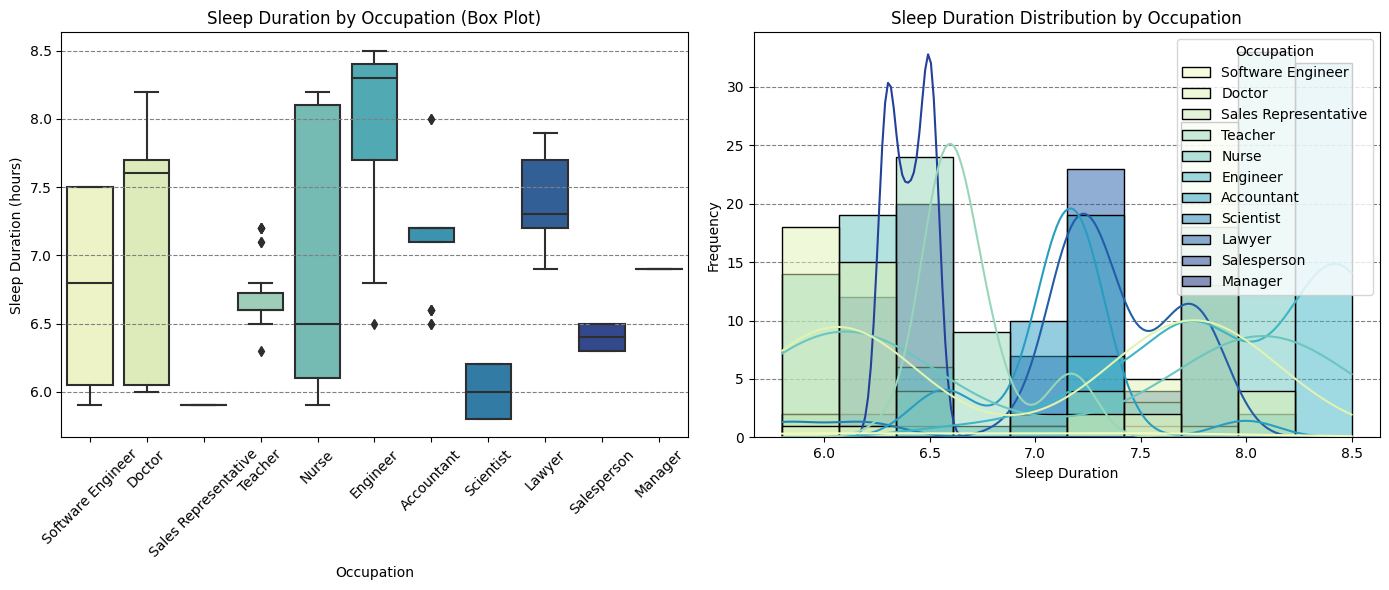

In [58]:
custom_palette = sns.color_palette("YlGnBu", len(df['Occupation'].unique()))
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.boxplot(x='Occupation', y='Sleep Duration', data=df,
            palette=custom_palette, ax=axes[0])
axes[0].set_title('Sleep Duration by Occupation (Box Plot)')
axes[0].set_xlabel('Occupation')
axes[0].set_ylabel('Sleep Duration (hours)')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', color='gray', linestyle='--')

sns.histplot(data=df, x='Sleep Duration', hue='Occupation',
             bins=10, palette=custom_palette,
             ax=axes[1], kde=True)
axes[1].set_title('Sleep Duration Distribution by Occupation')
axes[1].set_xlabel('Sleep Duration')
axes[1].set_ylabel('Frequency')
axes[1].set_axisbelow(True)
axes[1].grid(axis='y', color='gray', linestyle='--')

plt.tight_layout()
plt.show()

In [59]:
# Calculate average sleep duration by occupation
average_sleep_duration = df.groupby('Occupation')['Sleep Duration'].mean()
sorted_sleep_duration = average_sleep_duration.sort_values(ascending=False)

# Print the sorted average sleep durations
print("Average Sleep Duration by Occupation:")
print(sorted_sleep_duration)

Average Sleep Duration by Occupation:
Occupation
Engineer                7.987302
Lawyer                  7.410638
Accountant              7.113514
Nurse                   7.063014
Doctor                  6.970423
Manager                 6.900000
Software Engineer       6.750000
Teacher                 6.690000
Salesperson             6.403125
Scientist               6.000000
Sales Representative    5.900000
Name: Sleep Duration, dtype: float64


**1. Sleep Duration Distribution by Occupation:**

* **Box Plot:**
    - **Engineers** have the highest median sleep duration.
    - **Managers** and **Doctors** have the next highest median sleep durations.
    - **Sales Representatives** and **Scientists** have the lowest median sleep durations.
    - There is a wide range of sleep durations observed across all occupations.

* **Histogram:**
    - **Engineers** show a distribution skewed towards higher sleep durations.
    - **Doctors, Lawyers** and **Nurses** show a distribution centered around 7-7.5 hours of sleep.
    - **Sales Representatives** and **Scientists** show a distribution skewed towards lower sleep durations.

**2. Average Sleep Duration by Occupation:**

* **Engineers** have the highest average sleep duration at 7.99 hours.
* **Lawyers** and **Accountants** have the next highest average sleep durations.
* **Sales Representatives** and **Scientists** have the lowest average sleep durations.

**In summary:**

* The distribution of sleep duration varies significantly across different occupations. 
* Engineers and Doctors tend to have higher average sleep durations.
* Sales Representatives and Scientists tend to have lower average sleep durations.
* There is a wide range of sleep durations observed within each occupation.


- The blood pressure categories according to the guidelines from the American Heart Association (AHA) and the American College of Cardiology (ACC).  [Sources and related content](https://www.acc.org/latest-in-cardiology/articles/2017/11/08/11/47/mon-5pm-bp-guideline-aha-2017)

<div style="text-align:center;">
  <img src="https://my.clevelandclinic.org/-/scassets/images/org/health/articles/4314-high-blood-pressure-illustration" alt="Hypertension" width="300" height="200">
</div>

[Source](https://my.clevelandclinic.org/health/diseases/4314-high-blood-pressure)


| Category                    | Systolic (mm Hg)   | Diastolic (mm Hg)   |
|:----------------------------|:-------------------|:--------------------|
| Optimal Blood Pressure      | Less than 120      | Less than 80        |
| Elevated Blood Pressure     | 120-129            | Less than 80        |
| Stage 1 Hypertension        | 130-139            | 80-89               |
| Stage 2 Hypertension        | 140 or higher      | 90 or higher        |
| Hypertensive Crisis         | Higher than 180    | Higher than 120     |



## What is the distribution of blood pressure categories within the sample population?

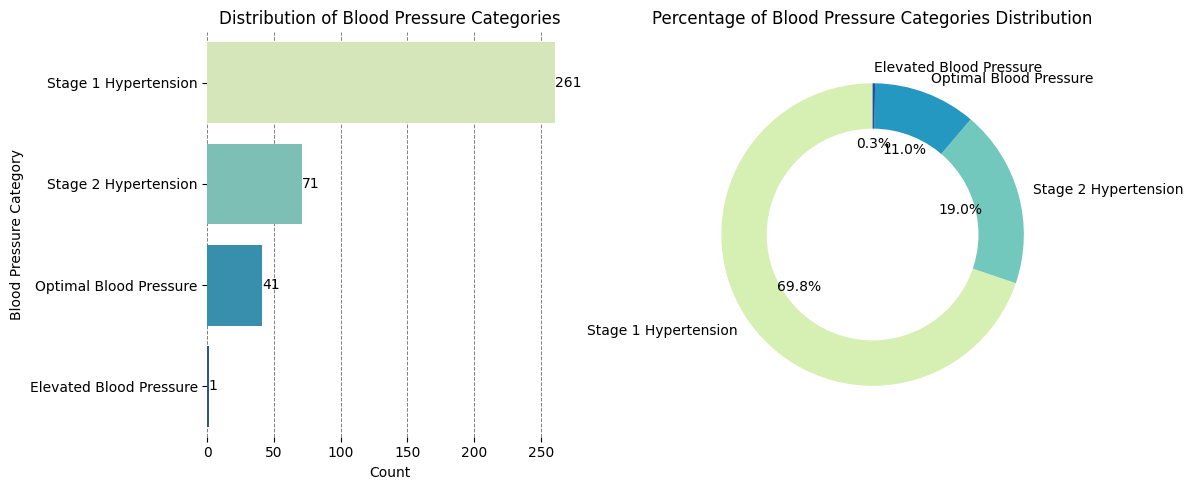

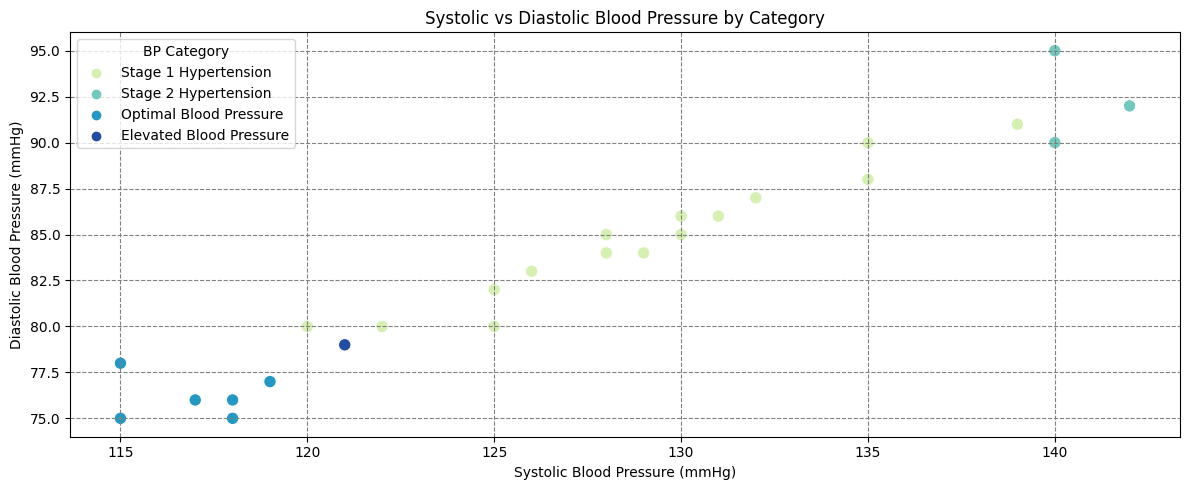

In [60]:
# Function to categorize blood pressure based on ACC/AHA guidelines
def categorize_blood_pressure(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']

    if systolic < 120 and diastolic < 80:
        return 'Optimal Blood Pressure'
    elif 120 <= systolic <= 129 and diastolic < 80:
        return 'Elevated Blood Pressure'
    elif 130 <= systolic <= 139 or 80 <= diastolic <= 89:
        return 'Stage 1 Hypertension'
    elif systolic >= 140 or diastolic >= 90:
          if systolic > 180 or diastolic > 120:
            return 'Hypertensive Crisis'
          else:
            return 'Stage 2 Hypertension'
    return 'Undefined'

df['BP Category'] = df.apply(categorize_blood_pressure, axis=1)

custom_palette = sns.color_palette("YlGnBu", 4)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(y='BP Category', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Distribution of Blood Pressure Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Blood Pressure Category')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     color='black', fontsize=10)

axes[0].set_axisbelow(True)
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

bp_counts = df['BP Category'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    bp_counts, 
    labels=bp_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=custom_palette
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Blood Pressure Categories Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
sns.scatterplot(x='Systolic', y='Diastolic', hue='BP Category',
                data=df, palette=custom_palette, s=80)
plt.title('Systolic vs Diastolic Blood Pressure by Category')
plt.xlabel('Systolic Blood Pressure (mmHg)')
plt.ylabel('Diastolic Blood Pressure (mmHg)')
plt.grid(color='gray', linestyle='--')
plt.legend(title='BP Category')
plt.tight_layout()
plt.show()

**1. Distribution of Blood Pressure Categories:**

* **Bar Chart:** The bar chart shows the counts of individuals in each blood pressure category. 
    - The bar chart shows the counts of individuals in each blood pressure category. 
    - "Stage 1 Hypertension" is the most frequent category, with 261 individuals.
    - "Stage 2 Hypertension" is the second most frequent category, with 71 individuals.
    - "Optimal Blood Pressure" is the third most frequent category, with 41 individuals.
    - "Elevated Blood Pressure" is the least frequent category, with 11 individuals

* **Pie Chart:** The pie chart shows the percentage distribution of blood pressure categories. 
    - The pie chart shows the percentage distribution of blood pressure categories. 
    - "Stage 1 Hypertension" accounts for the largest proportion (69.8%) of the sample.
    - "Stage 2 Hypertension" accounts for 19.0% of the sample.
    - "Optimal Blood Pressure" accounts for 11.0% of the sample.
    - "Elevated Blood Pressure" accounts for a very small proportion (0.3%) of the sample.

**2. Systolic vs. Diastolic Blood Pressure by Category:**

* **Overall Trend:** As expected, the scatter plot shows a positive correlation between systolic and diastolic blood pressure across all categories. As systolic pressure increases, diastolic pressure also tends to increase.

* **Category-Specific Trends:** 
    - **Optimal Blood Pressure:** Data points for this category are clustered in the lower left corner, indicating lower systolic and diastolic blood pressure readings.
    - **Elevated Blood Pressure:** Data points for this category are slightly higher than "Optimal" in both systolic and diastolic readings.
    - **Stage 1 Hypertension:** Data points for this category are further up and to the right, indicating higher systolic and diastolic blood pressure readings compared to the previous two categories. 
    - **Stage 2 Hypertension:** Data points for this category are clustered at the highest range of both systolic and diastolic blood pressure readings.


**In summary:**

* The majority of the sample population falls into the "Stage 1 Hypertension" category.
* "Stage 2 Hypertension" is the second most common category.
* "Optimal Blood Pressure" and "Elevated Blood Pressure" are less common in the sample.
* The scatter plot visually confirms the expected positive correlation between systolic and diastolic blood pressure.
* It also clearly demonstrates how blood pressure readings increase as the hypertension stage progresses, with "Stage 2 Hypertension" showing the highest values. 



## Are there significant differences in BP Category between males and females?

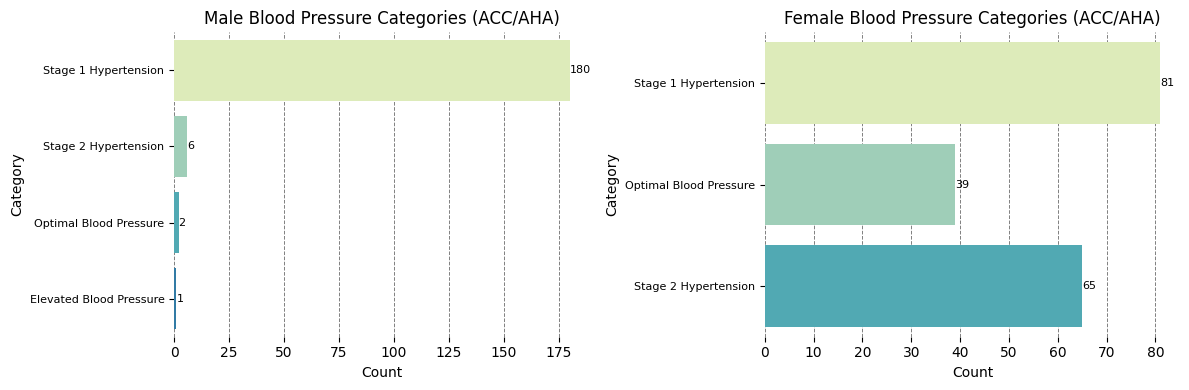

Mean Systolic and Diastolic Blood Pressure by Gender:
          Systolic  Diastolic
Gender                       
Female  130.200000  86.318919
Male    126.941799  83.015873


In [61]:
custom_palette = sns.color_palette("YlGnBu", 5)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(y='BP Category', data=df[df['Gender'] == 'Male'],
              ax=axes[0], palette=custom_palette)
axes[0].set_title('Male Blood Pressure Categories (ACC/AHA)')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Category')
axes[0].tick_params(axis='y', labelsize=8)

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     color='black', fontsize=8)

axes[0].set_axisbelow(True)
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)

sns.countplot(y='BP Category', data=df[df['Gender'] == 'Female'],
              ax=axes[1], palette=custom_palette)
axes[1].set_title('Female Blood Pressure Categories (ACC/AHA)')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Category')
axes[1].tick_params(axis='y', labelsize=8)

for p in axes[1].patches:
    axes[1].annotate(f'{int(p.get_width())}',
                     (p.get_width(), p.get_y() + p.get_height() / 2),
                     ha='left', va='center',
                     color='black', fontsize=8)

axes[1].set_axisbelow(True)
axes[1].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

mean_bp = df.groupby('Gender')[['Systolic', 'Diastolic']].mean()
print("Mean Systolic and Diastolic Blood Pressure by Gender:")
print(mean_bp)

* **Male Blood Pressure Categories:**
    - "Stage 1 Hypertension" is the most prevalent category among males, with 180 individuals.
    - "Optimal Blood Pressure" is the least prevalent category among males, with only 2 individuals.
    - "Stage 2 Hypertension" and "Elevated Blood Pressure" have very low counts (6 and 1, respectively).

* **Female Blood Pressure Categories:**
    - "Stage 1 Hypertension" is the most prevalent category among females, with 81 individuals.
    - "Optimal Blood Pressure" has the second highest count, with 39 individuals.
    - "Stage 2 Hypertension" is the most prevalent category among females, with 65 individuals.
    - "Elevated Blood Pressure" is the least prevalent category among females, with 1 individual.

**In summary:**

* **Stage 1 Hypertension** is the most common category for both males and females. 
* **Stage 2 Hypertension** is significantly more prevalent in females compared to males.
* **Optimal Blood Pressure** is more common in females than in males. 
* **Elevated Blood Pressure** is very rare in both genders.


## How does the distribution of blood pressure categories vary across different age ranges in relation to sleep duration?

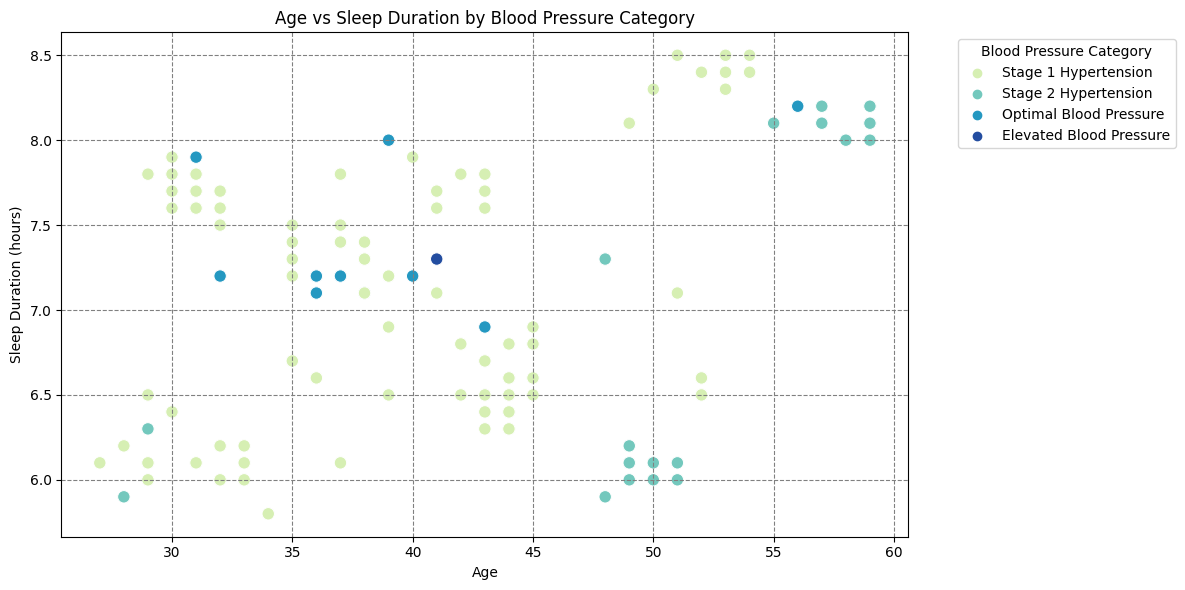

In [62]:
custom_palette = sns.color_palette("YlGnBu", 4)

plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Sleep Duration', hue='BP Category',
                data=df, palette=custom_palette, s=80)
plt.title('Age vs Sleep Duration by Blood Pressure Category')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.grid(color='gray', linestyle='--')
plt.legend(title='Blood Pressure Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* The scatter plot suggests that the relationship between age and sleep duration varies across different blood pressure categories. 
* There is no clear, consistent pattern of increasing or decreasing sleep duration with age for any of the categories. 
* Individuals in the "Stage 1 Hypertension" and "Stage 2 Hypertension" categories show a wider range of sleep durations compared to the "Optimal Blood Pressure" category.


## Are there significant differences in BP Category between individuals with different sleep disorders?

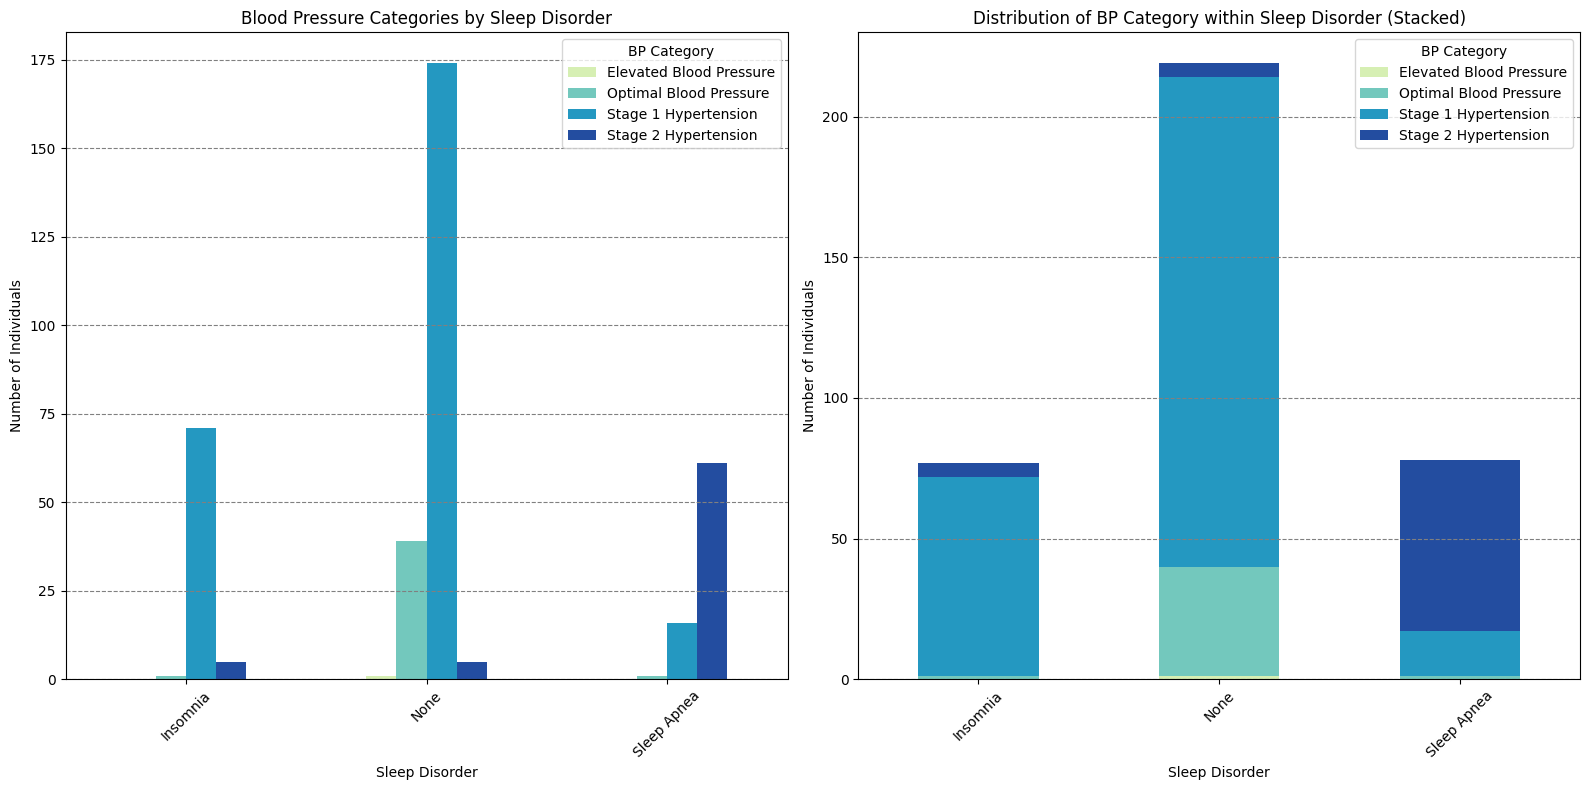

In [63]:
cross_tab = pd.crosstab(df['Sleep Disorder'], df['BP Category'])
custom_palette = sns.color_palette("YlGnBu", len(cross_tab.columns))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

cross_tab.plot(kind='bar', color=custom_palette, ax=axes[0])
axes[0].set_title('Blood Pressure Categories by Sleep Disorder')
axes[0].set_xlabel('Sleep Disorder')
axes[0].set_ylabel('Number of Individuals')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', color='gray', linestyle='--')
axes[0].legend(title='BP Category')

cross_tab.plot(kind='bar', stacked=True, color=custom_palette, ax=axes[1])
axes[1].set_title('Distribution of BP Category within Sleep Disorder (Stacked)')
axes[1].set_xlabel('Sleep Disorder')
axes[1].set_ylabel('Number of Individuals')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', color='gray', linestyle='--')
axes[1].legend(title='BP Category')

plt.tight_layout()
plt.show()

**1. Blood Pressure Categories by Sleep Disorder:**

* **Sleep Apnea:** This group has a significantly higher proportion of individuals with "Stage 1 Hypertension" and a notable proportion with "Stage 2 Hypertension." This indicates a strong association between Sleep Apnea and elevated blood pressure(when blood pressure is higher than normal).
* **Insomnia:** This group shows a higher proportion of individuals with "Elevated Blood Pressure" and "Stage 1 Hypertension" compared to the "None" group.
* **None (No Sleep Disorder):** This group has the highest proportion of individuals with "Optimal Blood Pressure" and the lowest proportion of individuals with elevated or high blood pressure categories.

**2. Distribution of BP Category within Sleep Disorder (Stacked Bar Chart):**

* This chart provides a clearer visualization of the proportion of each blood pressure category within each sleep disorder group. It reinforces the findings from the first chart.

**In summary:**

* Individuals with Sleep Apnea have a significantly higher prevalence of elevated blood pressure categories (Stage 1 and Stage 2 Hypertension) compared to those with no sleep disorder or Insomnia.
* Individuals with Insomnia also show a higher prevalence of elevated blood pressure categories compared to those with no sleep disorder.
* Individuals with no sleep disorder have the highest proportion of "Optimal Blood Pressure" and the lowest proportion of individuals with elevated or high blood pressure categories.


Source: [National Institutes of Health](https://pmc.ncbi.nlm.nih.gov/articles/PMC4434546/) 

| Category | Recommended Sleep Duration | Associated Health Outcomes |
|----------|----------------------------|-----------------------------|
| **Optimal Health** | 7 or more hours per night | Promotes optimal health |
| **Adverse Health** | Less than 7 hours per night | Associated with adverse health outcomes |


## What is the overall distribution of sleep duration categories in the dataset?

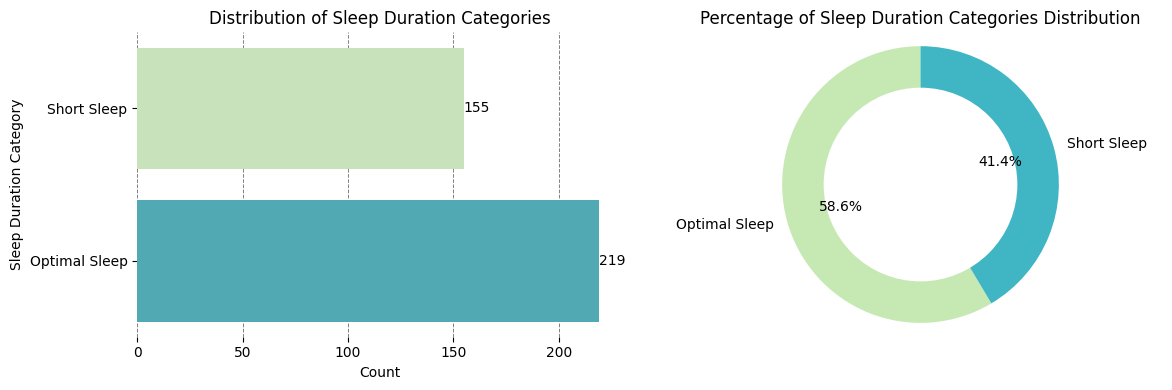

In [64]:
# Function to categorize sleep duration
def categorize_sleep_duration(hours):
    if 7 <= hours <= 9:
        return 'Optimal Sleep'
    elif hours < 7:
        return 'Short Sleep'
    else:
        return 'Long Sleep'

# Apply the categorization to the DataFrame
df['Sleep Category'] = df['Sleep Duration'].apply(categorize_sleep_duration)

custom_palette = sns.color_palette("YlGnBu", 3)
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.countplot(y='Sleep Category', data=df, ax=axes[0], palette=custom_palette)
axes[0].set_title('Distribution of Sleep Duration Categories')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Sleep Duration Category')

for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_width())}', 
                     (p.get_width(), p.get_y() + p.get_height() / 2), 
                     ha='left', va='center', 
                     color='black', fontsize=10)

axes[0].set_axisbelow(True)
axes[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
sns.despine(left=True, bottom=True)

sleep_counts = df['Sleep Category'].value_counts()
wedges, texts, autotexts = axes[1].pie(
    sleep_counts, 
    labels=sleep_counts.index, 
    autopct='%1.1f%%', 
    startangle=90,
    colors=custom_palette
)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
axes[1].set_title('Percentage of Sleep Duration Categories Distribution')
axes[1].axis('equal')

plt.tight_layout()
plt.show()

**1. Distribution of Sleep Duration Categories:**

* **Bar Chart:** The bar chart shows the counts of individuals in each sleep duration category. 
    - "Optimal Sleep" (7 or more hours) is the most frequent category, with 219 individuals.
    - "Short Sleep" (less than 7 hours) is the second most frequent category, with 155 individuals.

* **Pie Chart:** The pie chart shows the percentage distribution of sleep duration categories.
    - "Optimal Sleep" accounts for 58.6% of the sample.
    - "Short Sleep" accounts for 41.4% of the sample.

**2. Health Implications:**

* The table provides information on the recommended sleep duration and its association with health outcomes. 
    - "Optimal Sleep" (7 or more hours per night) is associated with promoting optimal health.
    - "Short Sleep" (less than 7 hours per night) is associated with adverse health outcomes.

**In summary:**

* The majority of the sample population falls into the "Optimal Sleep" category, indicating that they sleep 7 or more hours per night.
* A significant proportion of the sample falls into the "Short Sleep" category, which is associated with adverse health outcomes.


## Are there any specific age ranges that tend to have more individuals with 'Short Sleep' or 'Long Sleep'?

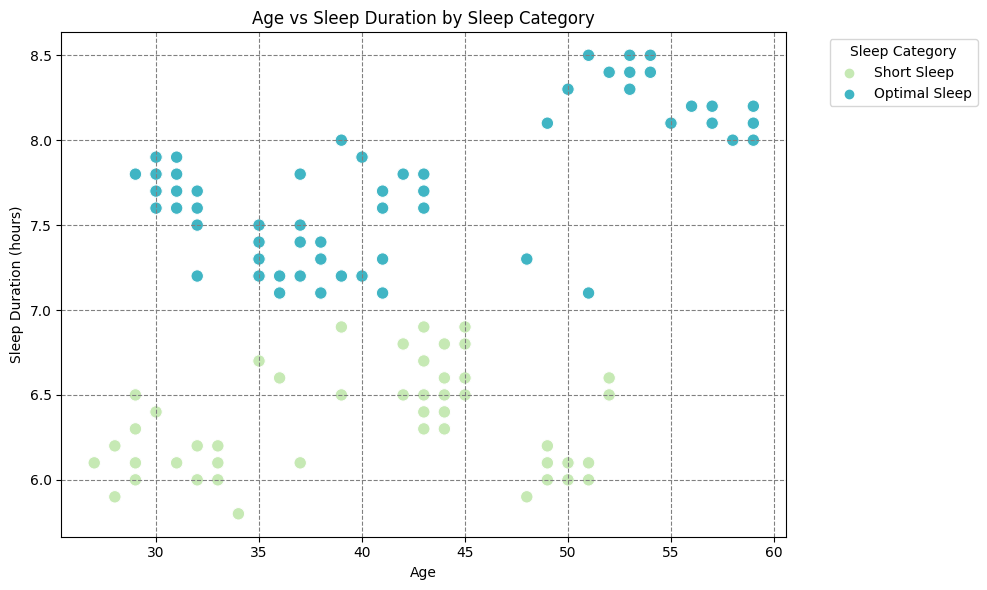

In [65]:
custom_palette = sns.color_palette("YlGnBu", 3)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Sleep Duration', hue='Sleep Category',
                data=df, palette=custom_palette, s=80)
plt.title('Age vs Sleep Duration by Sleep Category')
plt.xlabel('Age')
plt.ylabel('Sleep Duration (hours)')
plt.grid(color='gray', linestyle='--')
plt.legend(title='Sleep Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

* **Age Ranges and Sleep Categories:** 
    - **Younger Ages (30-40):** There's a noticeable concentration of "Short Sleep" data points in this age range. This suggests that a higher proportion of individuals in this age group might be getting less than 7 hours of sleep.
    - **Older Ages (45-60):** There appears to be a higher concentration of "Optimal Sleep" data points in this age range. This suggests that a higher proportion of individuals in this age group are getting 7 or more hours of sleep.

**The scatter plot suggests that younger individuals (aged 30-40) might have a higher prevalence of "Short Sleep," while older individuals (aged 45-60) might have a higher prevalence of "Optimal Sleep."**


## How does the distribution of blood pressure categories vary across different sleep categories?

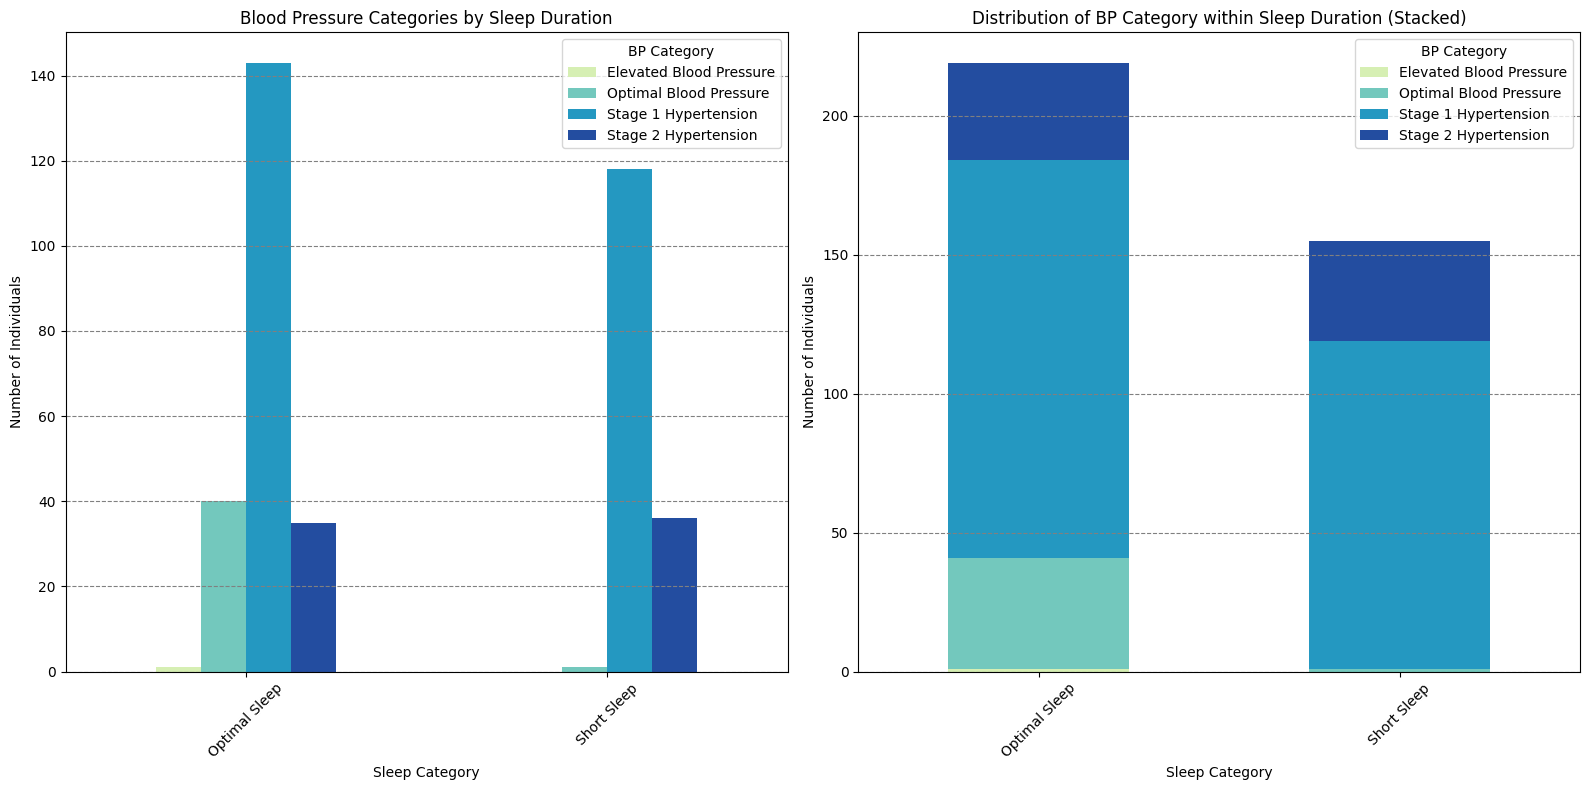

In [66]:
cross_tab = pd.crosstab(df['Sleep Category'], df['BP Category'])
custom_palette = sns.color_palette("YlGnBu", len(cross_tab.columns))

fig, axes = plt.subplots(1, 2, figsize=(16, 8))

cross_tab.plot(kind='bar', color=custom_palette, ax=axes[0])
axes[0].set_title('Blood Pressure Categories by Sleep Duration')
axes[0].set_xlabel('Sleep Category')
axes[0].set_ylabel('Number of Individuals')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y', color='gray', linestyle='--')
axes[0].legend(title='BP Category')

cross_tab.plot(kind='bar', stacked=True, color=custom_palette, ax=axes[1])
axes[1].set_title('Distribution of BP Category within Sleep Duration (Stacked)')
axes[1].set_xlabel('Sleep Category')
axes[1].set_ylabel('Number of Individuals')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(axis='y', color='gray', linestyle='--')
axes[1].legend(title='BP Category')


plt.tight_layout()
plt.show()

**1. Blood Pressure Categories by Sleep Duration:**

* **Optimal Sleep:** Individuals in the "Optimal Sleep" category (7 or more hours) have a higher proportion of "Optimal Blood Pressure" and a lower proportion of elevated blood pressure categories (Elevated Blood Pressure, Stage 1 Hypertension, Stage 2 Hypertension) compared to the "Short Sleep" category.

* **Short Sleep:** Individuals in the "Short Sleep" category (less than 7 hours) have a higher proportion of elevated blood pressure categories (Elevated Blood Pressure, Stage 1 Hypertension, Stage 2 Hypertension) compared to the "Optimal Sleep" category. 

**2. Distribution of BP Category within Sleep Duration (Stacked Bar Chart):**

* This chart provides a clearer visualization of the proportion of each blood pressure category within each sleep duration category. It reinforces the findings from the first chart.

**In summary:**

* Individuals with "Optimal Sleep" (7 or more hours) are more likely to have "Optimal Blood Pressure" and less likely to have elevated blood pressure categories.
* Individuals with "Short Sleep" (less than 7 hours) are more likely to have elevated blood pressure categories (Elevated Blood Pressure, Stage 1 Hypertension, Stage 2 Hypertension).


## How is the distribution of sleep categories distributed across different BMI categories?

In [67]:
df['count'] = 1
grouped_data = df.groupby(['BMI Category', 'Sleep Category'], as_index=False)['count'].count()

custom_palette = sns.color_palette("YlGnBu", 6)
custom_palette_hex = custom_palette.as_hex()

fig = px.sunburst(grouped_data, path=['BMI Category', 'Sleep Category'], values='count',
                  title='Distribution of Sleep Categories within Different BMI Categories',
                  color_discrete_sequence=custom_palette_hex)
fig.show()

**Key Insights:**

* **Normal BMI:** Individuals with a Normal BMI have a high proportion of "Optimal Sleep" (162 individuals) compared to "Short Sleep" (33 individuals). 
* **Overweight:** Individuals who are Overweight have a higher proportion of "Short Sleep" (112 individuals) compared to "Optimal Sleep" (36 individuals).
* **Obese:** Individuals who are Obese have a significantly higher proportion of "Short Sleep" (4 individuals) compared to "Optimal Sleep" (6 individuals).
* **Underweight:** Individuals who are Underweight have a higher proportion of "Optimal Sleep" (15 individuals) compared to "Short Sleep" (6 individuals).

**In summary:**

* The distribution of sleep categories varies across different BMI categories.
* Individuals with a Normal BMI are more likely to have "Optimal Sleep."
* Individuals who are Overweight or Obese are more likely to have "Short Sleep."



## How do the distributions of sleep categories within different BMI categories vary between males and females?

In [68]:
# Create a count of each combination of 'BMI Category', 'Sleep Category' and 'Gender'
df['count'] = 1
grouped_data = df.groupby(['BMI Category', 'Sleep Category', 'Gender'], as_index=False)['count'].count()

custom_palette = sns.color_palette("YlGnBu", 6)  
custom_palette_hex = custom_palette.as_hex()

fig = px.sunburst(grouped_data,
                  path=['BMI Category', 'Sleep Category', 'Gender'],
                  values='count',
                  title='Sunburst Chart of BMI Category, Sleep Category, and Gender',
                  color_discrete_sequence=custom_palette_hex)
fig.show()

* **BMI Category and Sleep Category:**
    - **Normal BMI:** Both males and females with a Normal BMI have a higher proportion of "Optimal Sleep." However, males in this category have a slightly higher proportion of "Optimal Sleep" compared to females.
    - **Overweight:** Both males and females who are Overweight have a higher proportion of "Short Sleep." Females in this category have a significantly higher proportion of "Short Sleep" compared to males.
    - **Obese:** Both males and females who are Obese have a significantly higher proportion of "Short Sleep." 
    - **Underweight:** Both males and females who are Underweight have a higher proportion of "Optimal Sleep." However, females in this category have a slightly higher proportion of "Short Sleep" compared to males.

* **Gender Differences:**
    - **Optimal Sleep:** In general, males tend to have a higher proportion of "Optimal Sleep" across all BMI categories except for the Obese category.
    - **Short Sleep:** Females, particularly in the Overweight category, have a significantly higher proportion of "Short Sleep" compared to males.

**In summary:**

* The distribution of sleep categories (Optimal Sleep vs. Short Sleep) varies across different BMI categories and between genders.
* Males tend to have a higher proportion of "Optimal Sleep" across most BMI categories, while females, especially in the Overweight category, have a higher proportion of "Short Sleep."


## How does the distribution of sleep categories ('Optimal Sleep', 'Short Sleep', and 'Long Sleep') vary across different sleep disorders?

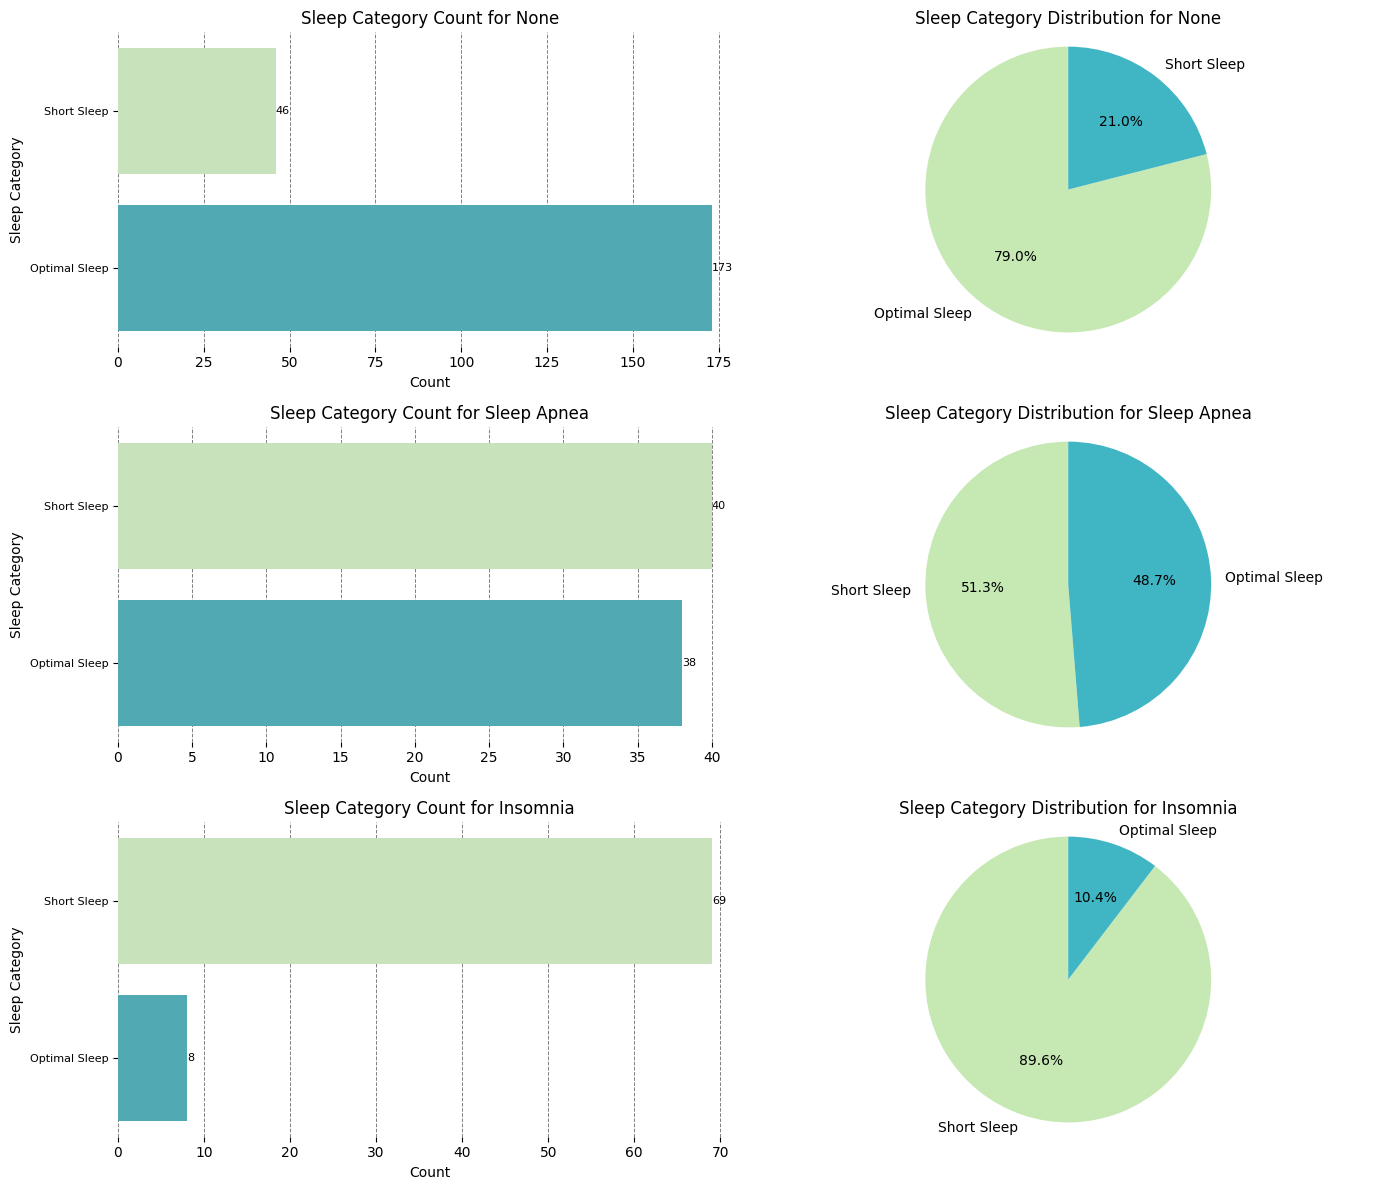

In [69]:
custom_palette = sns.color_palette("YlGnBu", 3)  

def plot_sleep_category_visualization(ax, df, sleep_disorder):
    filtered_data = df[df['Sleep Disorder'] == sleep_disorder]
    
    sns.countplot(y='Sleep Category', data=filtered_data, ax=ax[0],
                 palette=custom_palette)
    ax[0].set_title(f'Sleep Category Count for {sleep_disorder}')
    ax[0].set_xlabel('Count')
    ax[0].set_ylabel('Sleep Category')
    ax[0].tick_params(axis='y', labelsize=8)

    for p in ax[0].patches:
        ax[0].annotate(f'{int(p.get_width())}',
                        (p.get_width(), p.get_y() + p.get_height() / 2),
                        ha='left', va='center',
                        color='black', fontsize=8)

    ax[0].set_axisbelow(True)
    ax[0].grid(axis='x', color='gray', linestyle='--', linewidth=0.7)  
    sns.despine(left=True, bottom=True)


    sleep_counts = filtered_data['Sleep Category'].value_counts()
    ax[1].pie(sleep_counts, labels=sleep_counts.index,
               autopct='%1.1f%%', startangle=90,
               colors=custom_palette)
    ax[1].set_title(f'Sleep Category Distribution for {sleep_disorder}')
    ax[1].axis('equal')
  

unique_disorders = df['Sleep Disorder'].unique()
num_disorders = len(unique_disorders)

fig, axes = plt.subplots(num_disorders, 2, figsize=(14, 4*num_disorders))

for i, disorder in enumerate(unique_disorders):
    plot_sleep_category_visualization(axes[i], df, disorder)

plt.tight_layout()
plt.show()

* **None (No Sleep Disorder):** This group has a significantly higher proportion of individuals with "Optimal Sleep" (79%) compared to "Short Sleep" (21%). This suggests that individuals with no sleep disorder are more likely to get adequate sleep.

* **Sleep Apnea:** This group shows a higher proportion of individuals with "Short Sleep" (51.3%) compared to "Optimal Sleep" (48.7%). This indicates that individuals with Sleep Apnea are more likely to experience sleep disturbances and have shorter sleep durations.

* **Insomnia:** This group has the highest proportion of individuals with "Short Sleep" (89.6%). Only a small percentage (10.4%) fall into the "Optimal Sleep" category. This strongly suggests that individuals with Insomnia are significantly more likely to experience sleep disturbances and have shorter sleep durations.

**In summary:**

* The distribution of sleep categories varies significantly across different sleep disorders.
* Individuals with Sleep Apnea and Insomnia are more likely to have "Short Sleep" compared to those with no sleep disorder.
* Individuals with no sleep disorder are more likely to have "Optimal Sleep."



# <span style="color:transparent;">Import Libraries</span>

<div style="border-radius: 15px; border: 2px solid blue; padding: 10px; background: linear-gradient(135deg, #ffffcc, #a1d99b, #2c7fb8); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Data Preprocessing
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [70]:
df.drop(columns=['Person ID', 'Sleep Duration', 'Blood Pressure', 'Systolic', 'Diastolic', 'count'], inplace=True)

## Encoding Categorical Features

**Encoding Summary**


| Feature | Encoding Type | Mapping |
|---------|--------------|---------|
| **Gender** | Binary (0/1) | Male → 0, Female → 1 |
| **Sleep Category** | Binary (0/1) | Short Sleep → 0, Optimal Sleep → 1 |
| **BMI Category** | Ordinal | Underweight → 0, Normal → 1, Overweight → 2, Obese → 3 |
| **BP Category** | Ordinal | Optimal BP → 0, Elevated BP → 1, Stage 1 HTN → 2, Stage 2 HTN → 3 |
| **Occupation** | One-Hot Encoding | One-hot encoded (drop_first=True) |
| **Sleep Disorder (Target)** | Label Encoding | None → 0, Insomnia → 1, Sleep Apnea → 2 |



### Binary Encoding (0/1)

In [71]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Sleep Category'] = df['Sleep Category'].map({'Short Sleep': 0, 'Optimal Sleep': 1})


### Ordinal Encoding (Logical Order)

In [72]:
# BMI Category Encoding (Underweight < Normal < Overweight < Obese)
bmi_mapping = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
df['BMI Category'] = df['BMI Category'].map(bmi_mapping)

# BP Category Encoding (Ordered from best to worst)
bp_mapping = {
    'Optimal Blood Pressure': 0,
    'Elevated Blood Pressure': 1,
    'Stage 1 Hypertension': 2,
    'Stage 2 Hypertension': 3
}
df['BP Category'] = df['BP Category'].map(bp_mapping)


### One-Hot Encoding for Nominal Categories

In [73]:
# One-Hot Encode 'Occupation' 
df = pd.get_dummies(df, columns=['Occupation'], drop_first=True)


In [74]:
# Group by Sleep Disorder and calculate mean values for numerical features
sleep_disorder_interaction = df.groupby('Sleep Disorder').mean().reset_index()
styled_interaction_table = sleep_disorder_interaction.style.background_gradient(cmap="YlGnBu")
display(styled_interaction_table)

#### **Insights from Sleep Disorder Grouping:**

1. **Age**:
   - **Sleep Apnea** individuals are the oldest on average (49.7 years), followed by those with **Insomnia** (43.5 years), and **None** (39.0 years).
   - This suggests that sleep disorders, particularly **Sleep Apnea**, are more common in older individuals.

2. **Quality of Sleep**:
   - **None** has the highest average sleep quality score (7.63), indicating better sleep quality for individuals without sleep disorders.
   - **Sleep Apnea** and **Insomnia** have lower quality scores, with **Sleep Apnea** averaging 7.21 and **Insomnia** at 6.53.
   - Poor sleep quality is common in individuals suffering from **Sleep Apnea** and **Insomnia**, reflecting the impact of these disorders on overall sleep.

3. **Physical Activity Level**:
   - People with **Sleep Apnea** have the highest physical activity level (74.79), followed by **Insomnia** (46.82), and **None** (57.95).
   - **Sleep Apnea** might be associated with more physical activity, which could be due to an attempt to counteract the impact of poor sleep.

4. **Stress Level**:
   - Stress levels are fairly similar across the three groups: **Insomnia** has the highest stress level (5.87), followed by **Sleep Apnea** (5.67), and **None** (5.11).
   - This could indicate that stress might be a contributing factor to **Insomnia** and potentially **Sleep Apnea**.

5. **BMI Category**:
   - Individuals with **Sleep Apnea** show the highest average BMI (1.96, typically corresponding to "Overweight").
   - **Insomnia** has a BMI of around 1.91, and those with **None** are in the lowest BMI category (1.01, likely "Normal").
   - **Sleep Apnea** appears to be associated with higher BMI, suggesting a potential link between obesity and sleep disorders.

6. **Heart Rate**:
   - The **Heart Rate** for **Sleep Apnea** (73.09) is higher than that of **Insomnia** (70.47) and **None** (69.02).
   - Elevated heart rate could be due to stress or the physical impact of **Sleep Apnea**.

7. **Daily Steps**:
   - The **Daily Steps** for individuals with **Sleep Apnea** are the highest (7619 steps), possibly due to more physical activity or trying to counteract the effects of poor sleep.
   - Those with **None** take 6852 steps on average, while those with **Insomnia** take fewer steps (5901 steps).

8. **Blood Pressure Category**:
   - People with **Sleep Apnea** are more likely to fall into a higher blood pressure category (with a score of 2.76 on average), indicating **Stage 1 or 2 Hypertension**.
   - **Insomnia** individuals average a score of 2.04, while **None** individuals show a lower score of 1.66, indicating optimal or slightly elevated blood pressure.
   - **Sleep Apnea** seems to be associated with more severe blood pressure issues.

9. **Occupation**:
   - **Insomnia** is most prevalent in individuals with occupations such as **Teacher**, **Software Engineer**, and **Sales Representative**.
   - **Sleep Apnea** is most prevalent in **Sales Representatives**, **Managers**, and **Doctors**, which could be linked to high-stress, physically demanding, or sedentary occupations.
   - Those with **No Sleep Disorder** tend to have more variety in occupations, with notable representation in **Engineer**, **Teacher**, and **Scientist** roles.

10. **Sleep Category**:
    - **None** individuals are more likely to be in the **Optimal Sleep** category (score of 0.79), while both **Insomnia** and **Sleep Apnea** individuals are more likely to be in the **Short Sleep** category (scores of 0.49 and 0.49, respectively).
    - This reflects the impact of sleep disorders on overall sleep duration, with **Insomnia** and **Sleep Apnea** leading to shorter sleep periods.

#### **Summary**:
- **Sleep Apnea** is associated with higher age, higher BMI, poorer sleep quality, and higher physical activity. This could suggest that individuals with **Sleep Apnea** might engage in more physical activity, possibly as a countermeasure, and are at higher risk of health issues like hypertension.
- **Insomnia** individuals tend to be younger, have moderate physical activity levels, and experience more stress. This highlights how **Insomnia** may be linked to lifestyle or psychological factors.
- **None** individuals have the best sleep quality, lower stress levels, and lower BMI, suggesting they are healthier overall in terms of sleep and physical health. 

### Label Encoding for "Sleep Disorder"

In [75]:
sleep_disorder_mapping = {'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2}
df['Sleep Disorder'] = df['Sleep Disorder'].map(sleep_disorder_mapping)


- The order (None = 0, Insomnia = 1, Sleep Apnea = 2) makes sense since Insomnia is less severe than Sleep Apnea.

## Heatmap of Feature Correlations

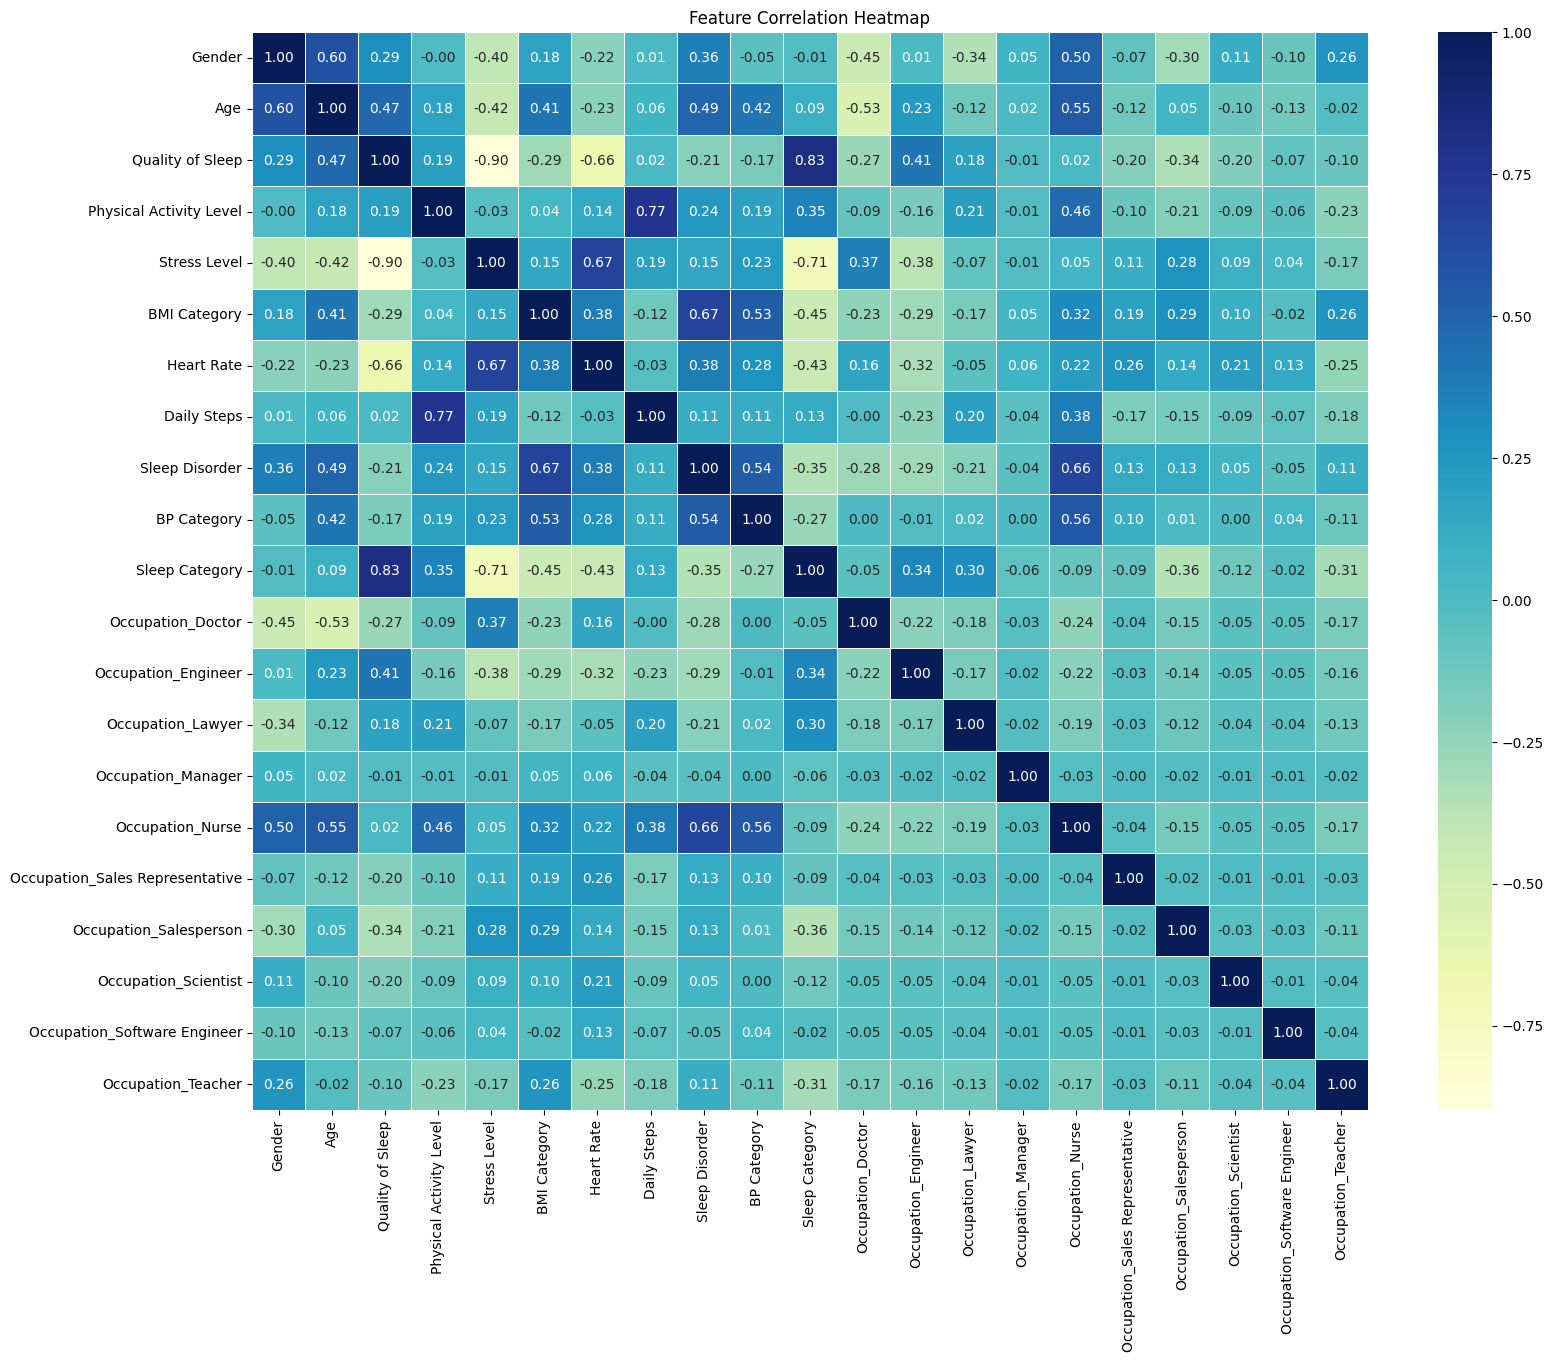

In [76]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=12)
plt.show()


#### Insights from the correlation matrix:

1. **Gender and Age**: There is a moderate positive correlation (0.60) between Gender and Age, indicating that as age increases, the likelihood of a gender-related factor increases. This could reflect demographic trends in the data.

2. **Stress Level and Quality of Sleep**: There is a strong negative correlation (-0.90) between Stress Level and Quality of Sleep, which suggests that higher stress levels are associated with poorer sleep quality. This insight aligns with common findings in health studies.

3. **Physical Activity Level and Daily Steps**: A very strong positive correlation (0.77) between Physical Activity Level and Daily Steps indicates that individuals who engage in higher physical activity levels tend to take more steps daily, which is logical.

4. **Stress Level and Heart Rate**: There is a moderate positive correlation (0.67) between Stress Level and Heart Rate, suggesting that individuals with higher stress levels tend to have higher heart rates. This is consistent with physiological responses to stress.

5. **Sleep Disorder and Sleep Quality**: Sleep Disorder is moderately positively correlated with Sleep Quality (0.53), which implies that individuals with sleep disorders experience poorer quality of sleep. This is a direct relationship between the two.

6. **BMI Category and Blood Pressure (BP) Category**: BMI Category shows a moderate positive correlation (0.53) with BP Category, meaning that individuals with higher BMI are more likely to have higher BP, which is commonly seen in healthcare data.

7. **Occupation-related Insights**: 
   - **Occupation_Doctor and Occupation_Nurse** show a strong positive correlation (0.50), indicating that individuals in healthcare professions tend to share similar health characteristics, possibly related to the demanding nature of their jobs.
   - **Occupation_Engineer and Occupation_Scientist** exhibit negative correlations with multiple factors like stress, sleep quality, and physical activity. This suggests that individuals in these occupations may experience more sedentary lifestyles with lower physical activity levels.

8. **Gender and Sleep Disorder**: There is a moderate positive correlation (0.36) between Gender and Sleep Disorder, which may suggest that one gender has a higher tendency to report sleep disorders. Further investigation is needed to understand whether this reflects a true behavioral trend or a reporting bias.

9. **Physical Activity Level and Stress Level**: Physical Activity Level shows a weak negative correlation (-0.03) with Stress Level, indicating that more physical activity does not necessarily correlate with stress reduction in this dataset.


In [77]:
# Calculate correlations with Sleep Disorder
correlations_with_sleep_disorder = df.corr()['Sleep Disorder'].sort_values(ascending=False)
correlation_table = correlations_with_sleep_disorder.to_frame(name='Correlation with Sleep Disorder').reset_index()
correlation_table.rename(columns={'index': 'Feature'}, inplace=True)
styled_table = correlation_table.style.background_gradient(cmap="YlGnBu")
display(styled_table)


#### Insights from the Correlation with Sleep Disorder:

1. **Strong Positive Correlations**:
   - **BMI Category (0.669)**: There is a strong positive correlation between **BMI Category** and **Sleep Disorder**, suggesting that individuals with higher BMI categories are more likely to report sleep disorders.
   - **Occupation_Nurse (0.664)**: Nurses show a strong correlation with sleep disorders, which could indicate the impact of their work schedules (e.g., night shifts or long working hours) on their sleep quality.
   - **BP Category (0.536)**: Blood pressure category also shows a moderate positive correlation, implying that individuals with higher blood pressure may experience more sleep disturbances.

2. **Moderate Positive Correlations**:
   - **Age (0.488)**: Older individuals tend to have a higher likelihood of experiencing sleep disorders, which is consistent with known patterns of aging and sleep disturbances.
   - **Heart Rate (0.384)**: A moderately positive correlation suggests that people with higher heart rates might be more prone to sleep disorders.
   - **Gender (0.363)**: Gender is positively correlated with sleep disorders, indicating a potential difference in the prevalence of sleep issues between males and females.
   
3. **Low Positive Correlations**:
   - **Physical Activity Level (0.237)**: A modest positive correlation, suggesting that individuals with lower levels of physical activity might be more likely to experience sleep disorders.
   - **Stress Level (0.152)**: The positive correlation with stress level indicates that higher stress could slightly contribute to sleep disorders, but the relationship is not very strong.
   
4. **Weak or Negative Correlations**:
   - **Occupational Factors**: Several occupations show weak or negative correlations with sleep disorders, including **Salesperson (0.131)**, **Sales Representative (0.125)**, and **Teacher (0.108)**. These might suggest that work conditions in these fields could have less impact on sleep compared to the occupations with stronger positive correlations.
   - **Quality of Sleep (-0.213)**: This negative correlation implies that better self-reported sleep quality is associated with a lower likelihood of having a sleep disorder, as expected.
   - **Occupation-related factors**: Professions such as **Software Engineer (-0.048)**, **Lawyer (-0.213)**, **Doctor (-0.281)**, **Engineer (-0.285)**, and **Manager (-0.040)** show negative or weak correlations, suggesting that sleep disorders may be less prevalent or less reported in these roles.

5. **Other Notable Observations**:
   - The **Sleep Category (-0.352)** shows a negative correlation, indicating that individuals categorized as having better sleep are less likely to report sleep disorders.
   
The correlations clearly show that factors such as **BMI**, **occupation type**, and **age** are strongly linked to sleep disorders. In contrast, **stress levels** and **physical activity** have a notably weaker relationship with these issues. Furthermore, individuals who report better sleep quality consistently experience fewer sleep disorders, affirming established expectations in this area.

## Separating Features and Target

In [78]:
# Define features and target
X = df.drop(columns=['Sleep Disorder'])  # Features
y = df['Sleep Disorder']  # Target

## Data Splitting and Scaling

In [79]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Display the shapes of the splits for verification
print(f"Training Features Shape: {X_train.shape}")
print(f"Testing Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Testing Target Shape: {y_test.shape}")

Training Features Shape: (299, 20)
Testing Features Shape: (75, 20)
Training Target Shape: (299,)
Testing Target Shape: (75,)


In [80]:
# Apply Scaler to standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# <span style="color:transparent;">Import Libraries</span>

<div style="border-radius: 15px; border: 2px solid blue; padding: 10px; background: linear-gradient(135deg, #ffffcc, #a1d99b, #2c7fb8); text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); font-weight: bold; margin-bottom: 5px; font-size: 28px; font-family: 'Roboto', sans-serif;">
        Model Training
    </h1>
</div>

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">


In [81]:
# Model Initialization
models = {
    "Random Forest": RandomForestClassifier(random_state=42, class_weight = 'balanced'),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "LightGBM": LGBMClassifier(verbose=-1, random_state=42, class_weight = 'balanced'),
    "CatBoost": CatBoostClassifier(verbose=0, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
}

# Display model names to confirm initialization
print("Models initialized:", list(models.keys()))

Models initialized: ['Random Forest', 'Gradient Boosting', 'LightGBM', 'CatBoost', 'Logistic Regression']


## Model Evaluation and Comparison

Training and evaluating: Random Forest

Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.86      0.80      0.83        15
           2       0.75      0.94      0.83        16

    accuracy                           0.91        75
   macro avg       0.87      0.89      0.88        75
weighted avg       0.92      0.91      0.91        75



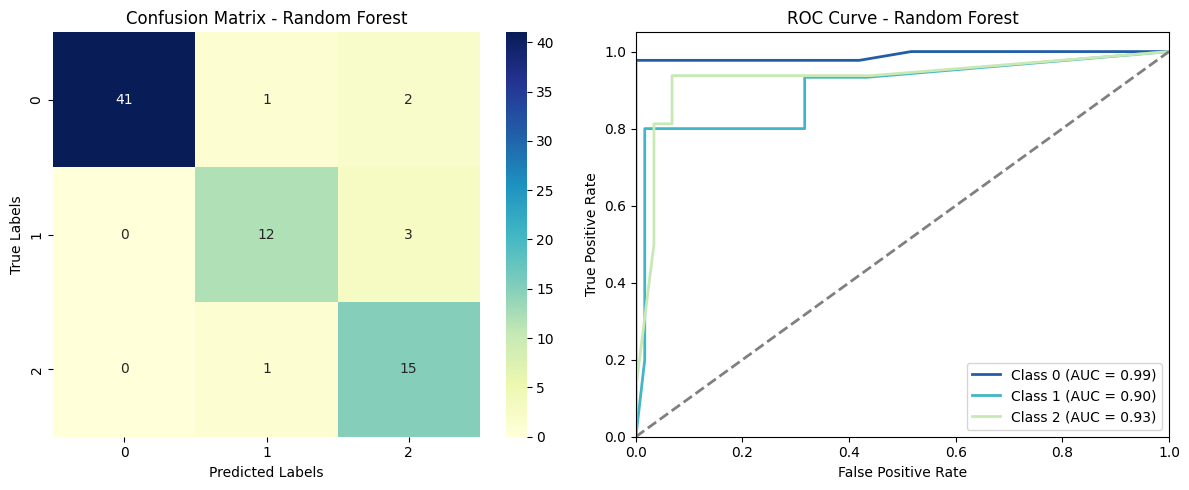

Training and evaluating: Gradient Boosting

Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        44
           1       0.79      0.73      0.76        15
           2       0.72      0.81      0.76        16

    accuracy                           0.88        75
   macro avg       0.83      0.83      0.83        75
weighted avg       0.88      0.88      0.88        75



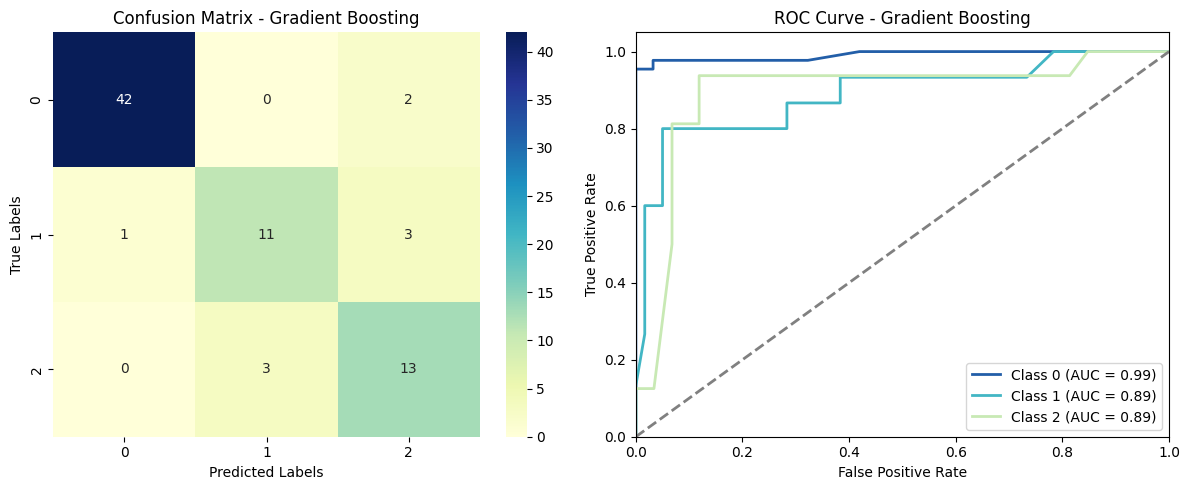

Training and evaluating: LightGBM

Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        44
           1       0.71      0.80      0.75        15
           2       0.72      0.81      0.76        16

    accuracy                           0.87        75
   macro avg       0.81      0.84      0.82        75
weighted avg       0.88      0.87      0.87        75



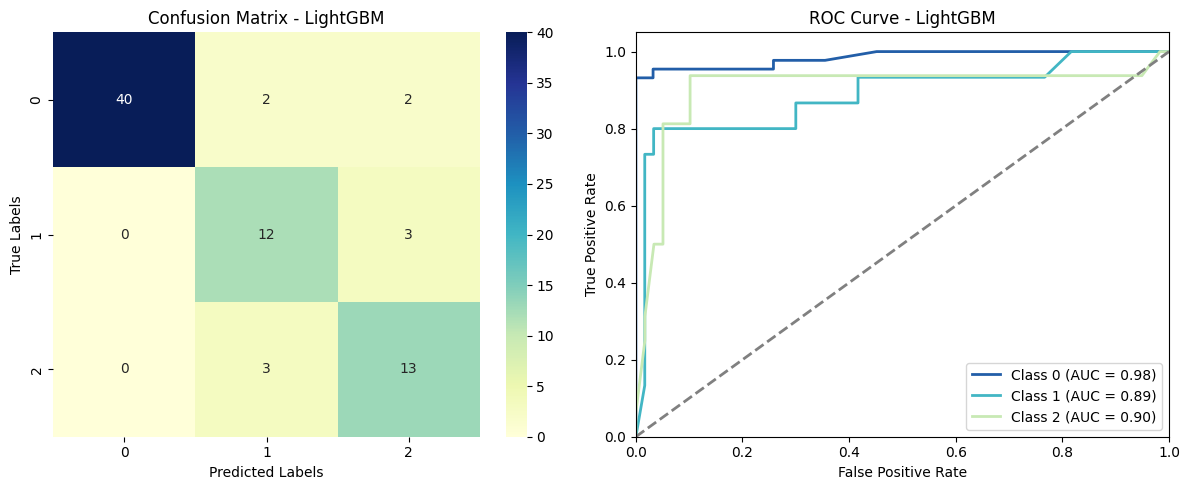

Training and evaluating: CatBoost

Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.75      0.80      0.77        15
           2       0.72      0.81      0.76        16

    accuracy                           0.88        75
   macro avg       0.82      0.85      0.83        75
weighted avg       0.89      0.88      0.88        75



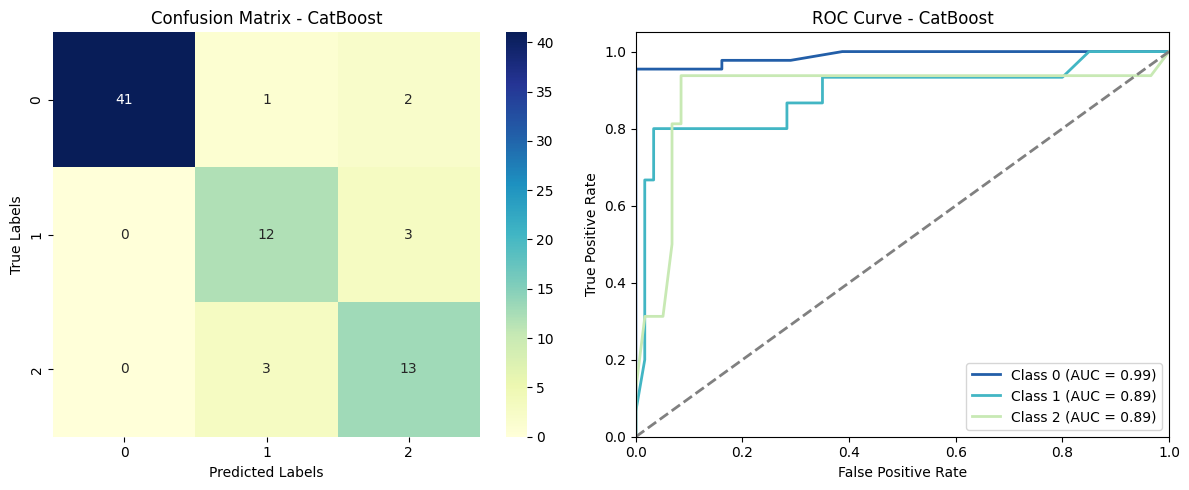

Training and evaluating: Logistic Regression

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       1.00      0.84      0.91        44
           1       0.67      0.80      0.73        15
           2       0.65      0.81      0.72        16

    accuracy                           0.83        75
   macro avg       0.77      0.82      0.79        75
weighted avg       0.86      0.83      0.84        75



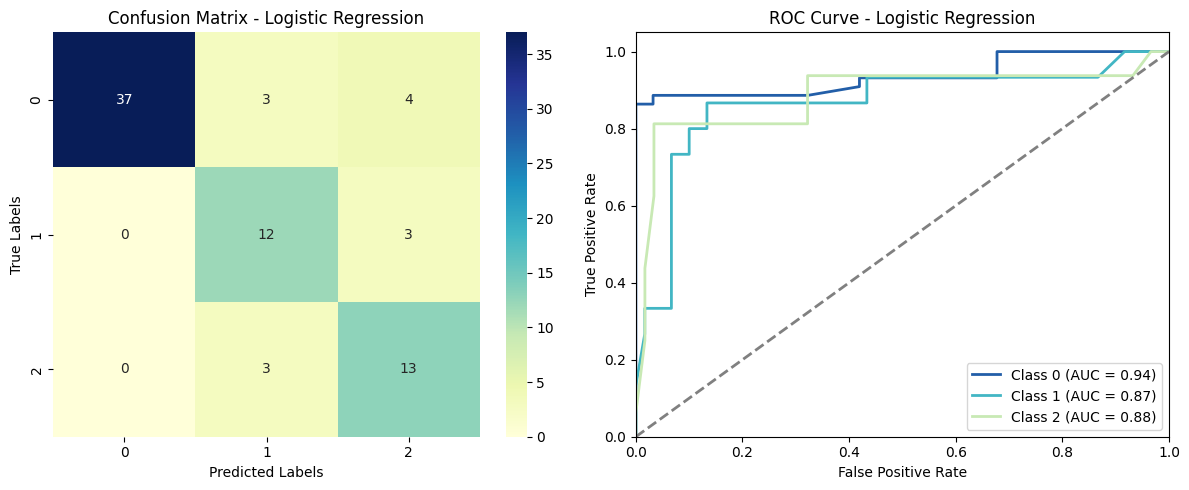


Summary of Model Evaluation:


Model  Accuracy       AUC
0        Random Forest  0.906667  0.939086
1    Gradient Boosting  0.880000  0.924059
2             CatBoost  0.880000  0.924050
3             LightGBM  0.866667  0.924650
4  Logistic Regression  0.826667  0.895624

In [82]:
model_results = []
n_classes = len(np.unique(y_train))  
colors = sns.color_palette("YlGnBu_r", n_classes)  

for model_name, model in models.items():
    print(f"Training and evaluating: {model_name}")
    
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled) if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred_proba, multi_class='ovr') if y_pred_proba is not None else None
    
    model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "AUC": auc_score if auc_score else "N/A"
    })
    
    print(f"\nClassification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    
    cm = confusion_matrix(y_test, y_pred)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test), ax=axes[0])
    axes[0].set_title(f"Confusion Matrix - {model_name}")
    axes[0].set_xlabel("Predicted Labels")
    axes[0].set_ylabel("True Labels")

    if y_pred_proba is not None:
        y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
        fpr, tpr, roc_auc = {}, {}, {}

        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])  
            axes[1].plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

        axes[1].plot([0, 1], [0, 1], linestyle="--", color="gray", lw=2)  
        axes[1].set_xlim([0.0, 1.0])
        axes[1].set_ylim([0.0, 1.05])
        axes[1].set_xlabel("False Positive Rate")
        axes[1].set_ylabel("True Positive Rate")
        axes[1].set_title(f"ROC Curve - {model_name}")
        axes[1].legend(loc="lower right")
    
    plt.tight_layout()
    plt.show()

results_df = pd.DataFrame(model_results).sort_values(by="Accuracy", ascending=False)
results_df.reset_index(drop=True, inplace=True)

print("\nSummary of Model Evaluation:")
display(results_df)

#### Model Performance Insights:

1. **Random Forest**:
   - **Accuracy**: 90.67% — The **Random Forest** model achieved the highest accuracy among all the models tested. It performed particularly well in classifying **Class 0** (Precision: 1.00, Recall: 0.93) and **Class 2** (Precision: 0.75, Recall: 0.94). However, **Class 1** performance was slightly lower, with a precision of 0.86 and recall of 0.80.
   - **AUC**: 0.939 — This high AUC indicates excellent discrimination between the classes, highlighting that the model's predictions are well-calibrated.

2. **Gradient Boosting**:
   - **Accuracy**: 88.00% — **Gradient Boosting** performed well overall but slightly lagged behind **Random Forest** in accuracy. It showed a strong recall for **Class 0** (0.95) but weaker performance for **Class 1** (Precision: 0.79, Recall: 0.73) and **Class 2** (Precision: 0.72, Recall: 0.81).
   - **AUC**: 0.924 — The model has a good AUC value, reflecting solid ability to distinguish between classes, but not as high as **Random Forest**.

3. **LightGBM**:
   - **Accuracy**: 87.00% — **LightGBM** showed a similar performance to **Gradient Boosting**, with a slightly lower accuracy. Precision for **Class 0** was excellent (1.00), but performance for **Class 1** and **Class 2** was slightly lower (Precision: 0.71 and 0.72).
   - **AUC**: 0.924 — The AUC is on par with **Gradient Boosting**, indicating good performance in terms of distinguishing the classes.

4. **CatBoost**:
   - **Accuracy**: 88.00% — **CatBoost** had the same accuracy as **Gradient Boosting** and **LightGBM**, with comparable performance across the classes. However, precision for **Class 1** was lower (0.75), and recall was moderate (0.80), which shows room for improvement.
   - **AUC**: 0.924 — The model’s AUC is consistent with the other models except for **Random Forest**, indicating effective classification.

5. **Logistic Regression**:
   - **Accuracy**: 82.67% — **Logistic Regression** had the lowest accuracy among all the models. The precision for **Class 0** was perfect (1.00), but recall (0.84) was lower compared to other models. **Class 1** and **Class 2** had much lower precision and recall (Precision: 0.67 and 0.65, Recall: 0.80 and 0.81), resulting in a relatively lower performance overall.
   - **AUC**: 0.895 — The AUC was the lowest, indicating that **Logistic Regression** struggled more in differentiating between the classes.

#### Key Observations:
* **Random Forest** has clearly established itself as the top performer, achieving an impressive **accuracy of 90.67%** and an **AUC of 0.939**, making it the most dependable model in this context. **Gradient Boosting, LightGBM, and CatBoost** all delivered commendable results, although their accuracy fell slightly short of Random Forest. **Logistic Regression,** on the other hand, underperformed with the lowest accuracy and AUC, indicating that it is not well-suited for this specific problem. These findings show that **Random Forest** stands out as the most robust model for this classification task, offering the best balance of **precision, recall, and AUC.**

## Feature Importances for the best model

The best model is: Random Forest




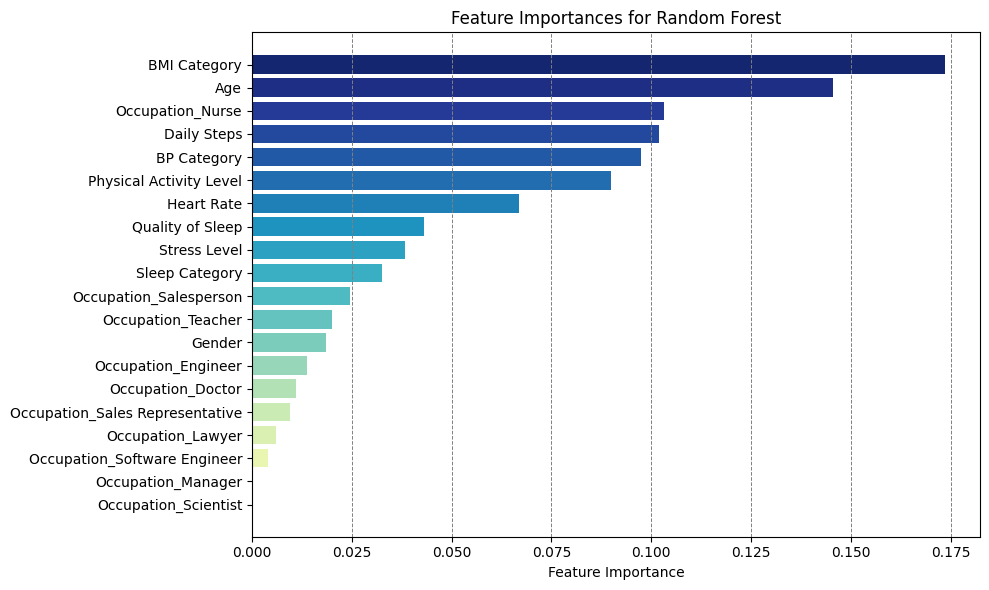

In [83]:
# Identify the best model based on the highest AUC
best_model_name = results_df.loc[results_df['AUC'].idxmax(), "Model"]
print(f"The best model is: {best_model_name}")
print("\n")

best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train)

if hasattr(best_model, "feature_importances_"):
    feature_importances = best_model.feature_importances_
    feature_names = X.columns

    sorted_idx = feature_importances.argsort()[::-1]

    colors = sns.color_palette("YlGnBu_r", len(feature_importances))

    plt.figure(figsize=(10, 6))
    plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center', color=colors)
    plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importances for {best_model_name}")
    plt.gca().invert_yaxis()
    plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.7)
    plt.tight_layout()
    plt.show()
else:
    print(f"{best_model_name} does not support feature importances.")


#### **Key Insights**

* **BMI Category is the most influential feature:** This suggests that an individual's Body Mass Index (BMI) category plays a crucial role in predicting sleep disorders. This could indicate that individuals with higher BMIs may be more likely to experience sleep disturbances or have certain sleep disorders, particularly conditions like sleep apnea. 

* **Age and Occupation are significant factors:** Age appears to be a strong predictor, possibly indicating that sleep patterns and requirements change with age. Additionally, certain occupations, such as "Nurse," "Salesperson" and "Teacher," seem to have a noticeable impact on sleep disorders. This could be due to factors like shift work, stress levels, and work-life balance associated with these professions. 

* **Lifestyle factors are important:** Daily Steps, Physical Activity Level, and Stress Level are also ranked high in terms of importance. This highlights the significant influence of lifestyle factors on sleep quality and potentially sleep disorders. Promoting healthy lifestyle habits like regular physical activity and stress management techniques could have a positive impact on sleep health.

* **Cardiovascular health metrics matter:** Heart Rate and Blood Pressure (BP) Category are considered important predictors. This suggests a strong link between cardiovascular health and sleep, which is well-established in medical research. Individuals with underlying cardiovascular conditions may be more susceptible to sleep disorders.

* **Sleep-related factors are influential:** "Quality of Sleep" and "Sleep Disorders" are ranked moderately high. This indicates that the model effectively considers self-reported sleep quality and the presence of specific sleep disorders as significant factors. This suggests that the model is accurately capturing the relationship between these factors and the target variable.

**The plot suggests that a combination of demographic, lifestyle, cardiovascular health, and sleep-related factors are critical in determining the target variable predicted by the Random Forest model.** 

## Prediction Distribution & Actual vs. Predicted

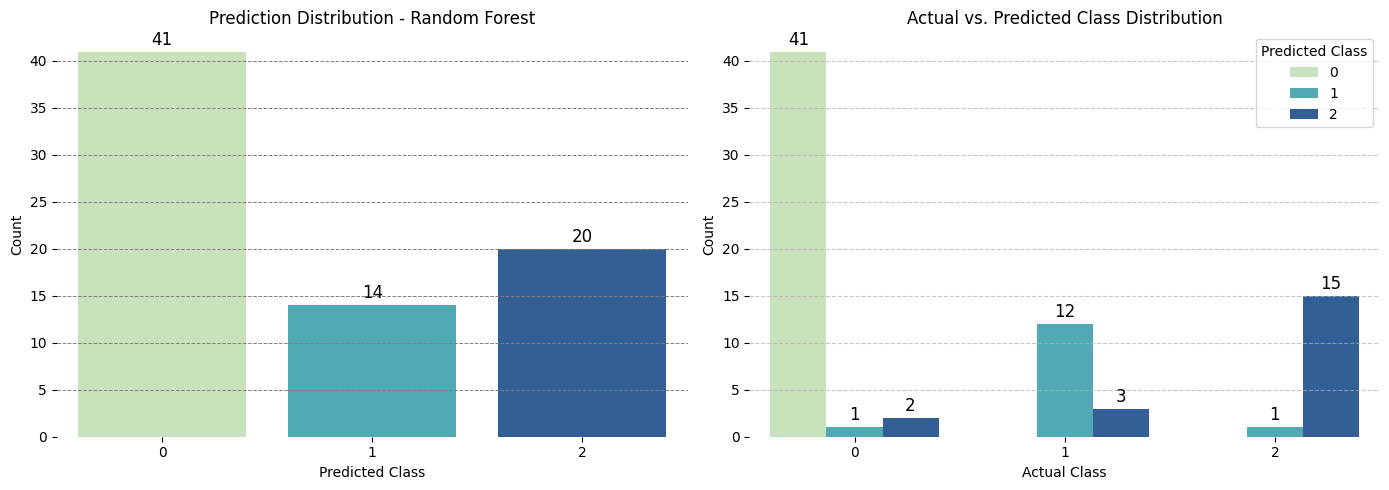

In [84]:
# Generate predictions using the best model
y_pred = best_model.predict(X_test_scaled)
predictions_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ---- Plot 1: Prediction Distribution ----
sns.countplot(x=y_pred, palette="YlGnBu", ax=axes[0])
for p in axes[0].patches:
    axes[0].annotate(f'{int(p.get_height())}', 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha='center', va='baseline', 
                     color='black', fontsize=12, 
                     xytext=(0, 5), 
                     textcoords='offset points')

axes[0].set_xlabel("Predicted Class")
axes[0].set_ylabel("Count")
axes[0].set_title(f"Prediction Distribution - {best_model_name}")
axes[0].grid(axis='y', color='gray', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True, ax=axes[0])

# ---- Plot 2: Actual vs. Predicted ----
sns.countplot(x="Actual", hue="Predicted", data=predictions_df, palette="YlGnBu", ax=axes[1])
for p in axes[1].patches:
    height = p.get_height()
    if height > 0: 
        axes[1].annotate(f'{int(height)}', 
                         (p.get_x() + p.get_width() / 2., height), 
                         ha='center', va='baseline', 
                         color='black', fontsize=12, 
                         xytext=(0, 5), 
                         textcoords='offset points')

axes[1].set_xlabel("Actual Class")
axes[1].set_ylabel("Count")
axes[1].set_title("Actual vs. Predicted Class Distribution")
axes[1].legend(title="Predicted Class")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
sns.despine(left=True, bottom=True, ax=axes[1])

plt.tight_layout()
plt.show()


## SHAP Summary Plot (Overall Feature Importance)

Generating SHAP Summary Plot...


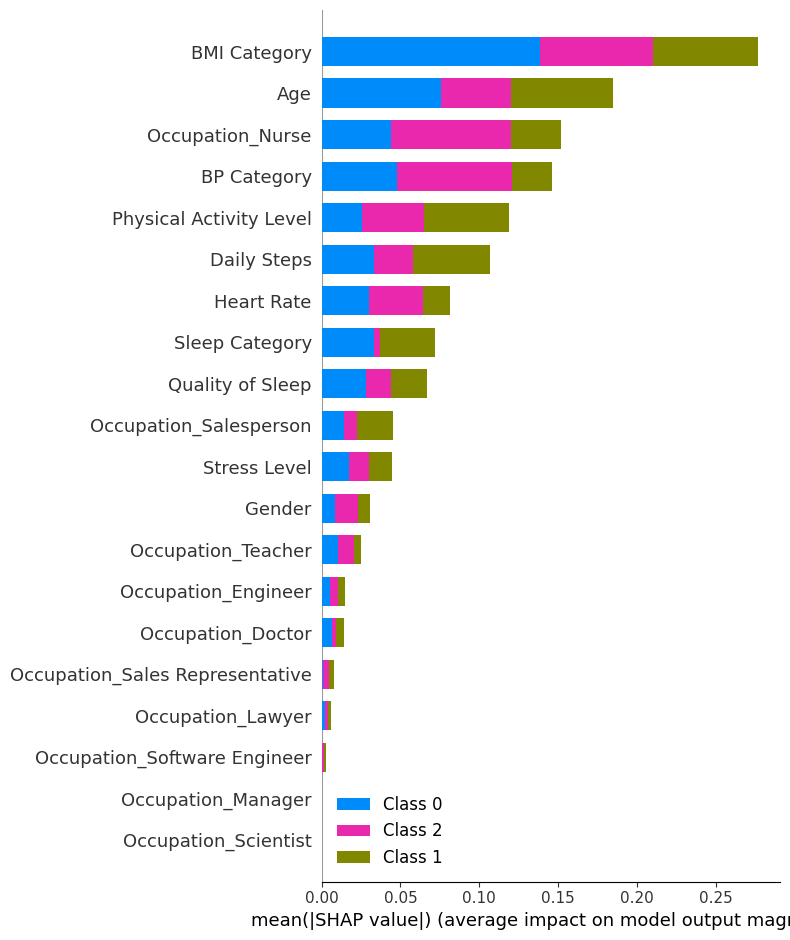

In [85]:
if hasattr(best_model, "feature_importances_"):
    explainer = shap.TreeExplainer(best_model)
    shap_values = explainer.shap_values(X_test_scaled)

    print("Generating SHAP Summary Plot...")
    shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns)
else:
    print(f"SHAP not supported for {best_model_name}.")


### **SHAP Analysis Insights for Sleep Disorder Prediction Model**
This SHAP summary plot represents the overall feature importance in predicting sleep disorders: **None (0), Insomnia (1), and Sleep Apnea (2)**.

#### **Key Observations:**
1. **BMI Category is the most influential feature**  
   - It has the highest SHAP value across all classes, meaning BMI plays a crucial role in predicting whether a person has **Insomnia or Sleep Apnea**.
   - Higher BMI is often associated with **Sleep Apnea (Class 2)**, which aligns with known medical research.

2. **Age is the second most important factor**  
   - Older individuals tend to have a higher risk of **both Sleep Apnea and Insomnia**.
   - This feature strongly influences Class 1 (Insomnia) and Class 2 (Sleep Apnea).

3. **Occupation plays a role in sleep disorder prediction**  
   - Specific occupations like **Nurses, Salespersons, and Teachers** have a significant impact.
   - **Nurses**, in particular, show a strong association, possibly due to irregular work shifts affecting sleep patterns.
   - Occupations like **Doctors, Engineers, and Scientists** have minimal impact on sleep disorders.

4. **Blood Pressure (BP) and Physical Activity Levels are crucial**  
   - High BP (Hypertension) is a well-known risk factor for **Sleep Apnea (Class 2)**.
   - Lower Physical Activity levels correlate with **higher sleep disorder risk**.

5. **Daily Steps and Heart Rate influence predictions**  
   - Higher daily steps may be associated with better sleep quality, reducing the likelihood of **Insomnia or Sleep Apnea**.
   - Increased heart rate variability could indicate **poor sleep health**.

6. **Sleep Quality and Sleep Category are significant but not dominant**  
   - As expected, **self-reported sleep quality** affects the model’s decision.
   - However, **objective factors like BMI, Age, and Occupation** appear more influential.

7. **Stress Level and Gender have minor contributions**  
   - Higher stress levels may be linked to **Insomnia (Class 1)** but are not as strong as other predictors.
   - Gender has a small impact, meaning sleep disorders affect both men and women similarly in this dataset.

#### **Actionable Insights:**
- **Healthcare interventions** can focus on individuals with high **BMI, BP issues, and sedentary lifestyles**.
- **Workplace policies** should address sleep health, especially for professions with **irregular work schedules** (e.g., nurses).
- **Encouraging physical activity** could be an effective preventive measure against sleep disorders.


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="border-radius: 15px; border: 2px solid #238443; padding: 20px;
           background: linear-gradient(135deg, #f0fff0, #e0ffe0, #d0ffd0, #c0ffc0);
           text-align: left; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3);">
    <h2 style="color: #238443; text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.3);
               font-weight: bold; margin-bottom: 10px; font-size: 18px;
               font-family: 'Roboto', sans-serif; line-height: 1.2;">
        Further Considerations:
    </h2>
    <p style="color: #555555; font-size: 16px; line-height: 1.4;">
        <b>Class Imbalance:</b> The class imbalance may still be impacting the model's performance, especially for the minority classes. Techniques like oversampling, undersampling, or using weighted loss functions could be explored to address this issue.<br><br>
        <b>Hyperparameter Tuning:</b> Fine-tuning the hyperparameters of the Random Forest model could further enhance its performance.
    </p>
</div>


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="border-radius: 15px; border: 2px solid #3778bf; padding: 20px;
           background: linear-gradient(135deg, #ffffcc, #c2e699, #78c679, #238443);
           text-align: center; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);">
    <h1 style="color: #ffffff; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);
               font-weight: bold; margin-bottom: 10px; font-size: 28px;
               font-family: 'Roboto', sans-serif; line-height: 1.2;">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 22px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
